In [217]:
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as md
import warnings
from scipy.interpolate import interp2d
warnings.filterwarnings('ignore')
import scipy.ndimage as ndimage
from matplotlib import cm

In [218]:
def simple_read(path):
    with open(path) as f:
        first_line = f.readline()
        header_line = int(first_line[0:-2].split(",")[0])-1
        #all_lines = f.readlines()
    data = pd.read_csv(path, sep=',', skiprows=header_line)
    #date = all_lines[5][0:10].split(',')
    #dt = datetime(int(date[0]), int(date[1]), int(date[2]))

    acc = 0
    boo = False
    for letter in path:
        if letter == '2':
            boo = True
        elif boo and letter == '0':
            acc -= 1
            break
        acc += 1
    #print(path[:acc+4], path[acc+4:acc+6], path[acc+6:acc+8])
    dt = datetime(int(path[acc:acc+4]), int(path[acc+4:acc+6]), int(path[acc+6:acc+8]))
    
    for column in data.keys():
        if 'Time' in column:
            data[column] = dt + pd.to_timedelta(data[column], unit='seconds')
    return data.replace(-999999, np.NaN)

In [219]:
LAS22 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220602_RA_L1_20230131T122324.ict')
start_index = np.where(LAS22["Time_Start"] == pd.to_datetime("2022-06-02 12:58:55"))
stop_index = np.where(LAS22["Time_Start"] == pd.to_datetime("2022-06-02 13:10:00"))


LAS22_subset = LAS22[start_index[0][0]:stop_index[0][0]]
LAS22_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
5981 2022-06-02 12:58:55 2022-06-02 12:58:56                  115.705  \
5982 2022-06-02 12:58:56 2022-06-02 12:58:57                  115.605   
5983 2022-06-02 12:58:57 2022-06-02 12:58:58                  114.775   
5984 2022-06-02 12:58:58 2022-06-02 12:58:59                  113.025   
5985 2022-06-02 12:58:59 2022-06-02 12:59:00                  110.485   
...                  ...                 ...                      ...   
6641 2022-06-02 13:09:55 2022-06-02 13:09:56                 3810.860   
6642 2022-06-02 13:09:56 2022-06-02 13:09:57                 3811.410   
6643 2022-06-02 13:09:57 2022-06-02 13:09:58                 3812.340   
6644 2022-06-02 13:09:58 2022-06-02 13:09:59                 3813.680   
6645 2022-06-02 13:09:59 2022-06-02 13:10:00                 3815.470   

       nLAS_AmmSO4_ZIEMBA   sLAS_AmmSO4_ZIEMBA   vLAS_AmmSO4_ZIEMBA   
5981               293.02                55.75                 6.81  \
5982               298.92                81.83                21.50   
5983               281.59                78.28                14.64   
5984               236.74                53.54                10.40   
5985               232.14                30.10                 1.36   
...                   ...                  ...                  ...   
6641               213.92                14.12                 0.42   
6642               163.86                10.53                 0.32   
6643               206.88                13.70                 0.42   
6644               183.10                12.73                 0.43   
6645               180.50                10.99                 0.33   

       LAS_Bin01_ZIEMBA   LAS_Bin02_ZIEMBA   LAS_Bin03_ZIEMBA   
5981             240.32             331.92             375.49  \
5982             288.96             399.60             522.31   
5983             239.79             430.79             312.07   
5984             431.36             298.06             332.64   
5985             262.30             164.74             434.09   
...                 ...                ...                ...   
6641             986.18            1129.56             626.76   
6642             792.83             730.67             625.60   
6643            1273.67             963.25             479.53   
6644            1130.71             698.68             543.42   
6645            1224.82             897.26             542.25   

       LAS_Bin04_ZIEMBA  ...   LAS_Bin18_ZIEMBA   LAS_Bin19_ZIEMBA   
5981             508.39  ...               0.00              17.30  \
5982             448.96  ...               0.00               0.00   
5983             536.89  ...              25.87               0.00   
5984             387.90  ...               0.00              34.51   
5985             267.06  ...               0.00               0.00   
...                 ...  ...                ...                ...   
6641             538.28  ...               0.00               0.00   
6642             447.97  ...               0.00               0.00   
6643             507.70  ...               0.00               0.00   
6644             209.43  ...               0.00               0.00   
6645             268.85  ...               0.00               0.00   

       LAS_Bin20_ZIEMBA   LAS_Bin21_ZIEMBA   LAS_Bin22_ZIEMBA   
5981              17.32              25.96                0.0  \
5982              17.35              13.00                0.0   
5983              17.27               0.00                0.0   
5984               0.00              12.94                0.0   
5985              17.19               0.00                0.0   
...                 ...                ...                ...   
6641               0.00               0.00                0.0   
6642               0.00               0.00                0.0   
6643               0.00               0.00                0.0   
6644        

In [220]:
LAS22_subset
Altitude22a = np.array(LAS22_subset[' GPS_Altitude_THORNHILL'])
    
value22a = []
for key in LAS22_subset.keys():
    if 'Bin' in key:
        value22a.append(LAS22_subset[key].T)
value22a = np.array(value22a)
value22a[value22a==0] = 1
    
mid22 = [100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3]

In [221]:
LAS = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220602_RA_L1_20230131T122324.ict')
start_index = np.where(LAS["Time_Start"]==pd.to_datetime("2022-06-02 13:48:00"))
stop_index = np.where(LAS["Time_Start"]==pd.to_datetime("2022-06-02 14:10:00"))
    
LAS_subset = LAS[start_index[0][0]:stop_index[0][0]]
LAS_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
8926  2022-06-02 13:48:00 2022-06-02 13:48:01                  1896.68  \
8927  2022-06-02 13:48:01 2022-06-02 13:48:02                  1897.28   
8928  2022-06-02 13:48:02 2022-06-02 13:48:03                  1898.01   
8929  2022-06-02 13:48:03 2022-06-02 13:48:04                  1898.83   
8930  2022-06-02 13:48:04 2022-06-02 13:48:05                  1899.75   
...                   ...                 ...                      ...   
10241 2022-06-02 14:09:55 2022-06-02 14:09:56                  2855.32   
10242 2022-06-02 14:09:56 2022-06-02 14:09:57                  2861.28   
10243 2022-06-02 14:09:57 2022-06-02 14:09:58                  2867.15   
10244 2022-06-02 14:09:58 2022-06-02 14:09:59                  2872.99   
10245 2022-06-02 14:09:59 2022-06-02 14:10:00                  2878.90   

        nLAS_AmmSO4_ZIEMBA   sLAS_AmmSO4_ZIEMBA   vLAS_AmmSO4_ZIEMBA   
8926                125.18                16.58                 1.07  \
8927                105.98                13.16                 0.63   
8928                108.47                11.92                 0.69   
8929                127.25                14.64                 0.71   
8930                133.17                12.27                 0.41   
...                    ...                  ...                  ...   
10241               152.94                14.05                 0.52   
10242               150.62                11.90                 0.41   
10243               164.86                15.26                 0.60   
10244               194.08                15.05                 0.50   
10245               162.40                13.95                 0.50   

        LAS_Bin01_ZIEMBA   LAS_Bin02_ZIEMBA   LAS_Bin03_ZIEMBA   
8926              360.53             232.87             208.88  \
8927              144.19             332.14             208.62   
8928              408.32             232.86             229.87   
8929              504.51             232.03             208.89   
8930              384.68             332.31             292.10   
...                  ...                ...                ...   
10241             696.81             398.76             292.34   
10242             865.52             431.41             396.28   
10243             697.16             531.94             520.54   
10244             818.04             731.78             585.09   
10245             600.82             465.23             437.58   

        LAS_Bin04_ZIEMBA  ...   LAS_Bin18_ZIEMBA   LAS_Bin19_ZIEMBA   
8926              299.46  ...               0.00               0.00  \
8927               89.50  ...              25.94               0.00   
8928              149.47  ...               0.00               0.00   
8929              239.23  ...               0.00              17.29   
8930              268.94  ...               0.00               0.00   
...                  ...  ...                ...                ...   
10241             448.58  ...               0.00               0.00   
10242             328.90  ...               0.00               0.00   
10243             299.09  ...               0.00               0.00   
10244             328.91  ...               0.00               0.00   
10245             298.65  ...               0.00               0.00   

        LAS_Bin20_ZIEMBA   LAS_Bin21_ZIEMBA   LAS_Bin22_ZIEMBA   
8926               34.65               0.00                0.0  \
8927                0.00               0.00                0.0   
8928                0.00              12.97                0.0   
8929                0.00               0.00                0.0   
8930                0.00               0.00                0.0   
...                  ...                ...                ...   
10241               0.00               0.00                0.0   
10242               0.00               0.00                0.0   
10243               0

In [222]:
LAS_subset
Altitude = np.array(LAS_subset[' GPS_Altitude_THORNHILL'])
    
value = []
for key in LAS_subset.keys():
    if 'Bin' in key:
        value.append(LAS_subset[key].T)
value = np.array(value)
value[value==0] = 1
    
mid = [100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3]

In [223]:
SMPS22 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220602_RA_L1_20230131T122818.ict')
start_index = np.where(SMPS22["Time_Start"]==pd.to_datetime("2022-06-02 13:48:00"))
stop_index = np.where(SMPS22["Time_Start"]==pd.to_datetime("2022-06-02 14:10:00"))
    
SMPS22_subset = SMPS22[start_index[0][0]:stop_index[0][0]]
SMPS22_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
8926  2022-06-02 13:48:00 2022-06-02 13:48:01                  1896.68  \
8927  2022-06-02 13:48:01 2022-06-02 13:48:02                  1897.28   
8928  2022-06-02 13:48:02 2022-06-02 13:48:03                  1898.01   
8929  2022-06-02 13:48:03 2022-06-02 13:48:04                  1898.83   
8930  2022-06-02 13:48:04 2022-06-02 13:48:05                  1899.75   
...                   ...                 ...                      ...   
10241 2022-06-02 14:09:55 2022-06-02 14:09:56                  2855.32   
10242 2022-06-02 14:09:56 2022-06-02 14:09:57                  2861.28   
10243 2022-06-02 14:09:57 2022-06-02 14:09:58                  2867.15   
10244 2022-06-02 14:09:58 2022-06-02 14:09:59                  2872.99   
10245 2022-06-02 14:09:59 2022-06-02 14:10:00                  2878.90   

        nSMPS_ZIEMBA   sSMPS_ZIEMBA   vSMPS_ZIEMBA   SMPS_Bin01_ZIEMBA   
8926             NaN            NaN            NaN                 NaN  \
8927             NaN            NaN            NaN                 NaN   
8928             NaN            NaN            NaN                 NaN   
8929             NaN            NaN            NaN                 NaN   
8930             NaN            NaN            NaN                 NaN   
...              ...            ...            ...                 ...   
10241         260.88           2.47           0.03                 NaN   
10242         260.88           2.47           0.03                 NaN   
10243            NaN            NaN            NaN                 NaN   
10244            NaN            NaN            NaN                 NaN   
10245            NaN            NaN            NaN                 NaN   

        SMPS_Bin02_ZIEMBA   SMPS_Bin03_ZIEMBA   SMPS_Bin04_ZIEMBA  ...   
8926                  NaN                 NaN                 NaN  ...  \
8927                  NaN                 NaN                 NaN  ...   
8928                  NaN                 NaN                 NaN  ...   
8929                  NaN                 NaN                 NaN  ...   
8930                  NaN                 NaN                 NaN  ...   
...                   ...                 ...                 ...  ...   
10241                 NaN                 0.0                 0.0  ...   
10242                 NaN                 0.0                 0.0  ...   
10243                 NaN                 NaN                 NaN  ...   
10244                 NaN                 NaN                 NaN  ...   
10245                 NaN                 NaN                 NaN  ...   

        SMPS_Bin22_ZIEMBA   SMPS_Bin23_ZIEMBA   SMPS_Bin24_ZIEMBA   
8926                  NaN                 NaN                 NaN  \
8927                  NaN                 NaN                 NaN   
8928                  NaN                 NaN                 NaN   
8929                  NaN                 NaN                 NaN   
8930                  NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
10241              492.73              104.88              724.82   
10242              492.73              104.88              724.82   
10243                 NaN                 NaN                 NaN   
10244                 NaN                 NaN                 NaN   
10245                 NaN                 NaN                 NaN   

        SMPS_Bin25_ZIEMBA   SMPS_Bin26_ZIEMBA   SMPS_Bin27_ZIEMBA   
8926                  NaN                 NaN                 NaN  \
8927                  NaN                 NaN                 NaN   
8928                  NaN                 NaN                 NaN   
8929                  NaN                 NaN                 NaN   
8930                  NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
10241              578.55           

In [224]:
SMPS22_subset
Altitude22 = np.array(SMPS22_subset[' GPS_Altitude_THORNHILL'])
    
value22 = []
for key in SMPS22_subset.keys():
    if 'Bin' in key:
        value22.append(SMPS22_subset[key].T)
value22 = np.array(value22)
value22[value22==0] = 1
    
mid22 = [3.16, 3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1]

In [225]:
SMPS = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220602_RA_L1_20230131T122818.ict')
start_index = np.where(SMPS["Time_Start"]==pd.to_datetime("2022-06-02 13:48:00"))
stop_index = np.where(SMPS["Time_Start"]==pd.to_datetime("2022-06-02 14:10:00"))
    
SMPS_subset = SMPS[start_index[0][0]:stop_index[0][0]]
SMPS_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
8926  2022-06-02 13:48:00 2022-06-02 13:48:01                  1896.68  \
8927  2022-06-02 13:48:01 2022-06-02 13:48:02                  1897.28   
8928  2022-06-02 13:48:02 2022-06-02 13:48:03                  1898.01   
8929  2022-06-02 13:48:03 2022-06-02 13:48:04                  1898.83   
8930  2022-06-02 13:48:04 2022-06-02 13:48:05                  1899.75   
...                   ...                 ...                      ...   
10241 2022-06-02 14:09:55 2022-06-02 14:09:56                  2855.32   
10242 2022-06-02 14:09:56 2022-06-02 14:09:57                  2861.28   
10243 2022-06-02 14:09:57 2022-06-02 14:09:58                  2867.15   
10244 2022-06-02 14:09:58 2022-06-02 14:09:59                  2872.99   
10245 2022-06-02 14:09:59 2022-06-02 14:10:00                  2878.90   

        nSMPS_ZIEMBA   sSMPS_ZIEMBA   vSMPS_ZIEMBA   SMPS_Bin01_ZIEMBA   
8926             NaN            NaN            NaN                 NaN  \
8927             NaN            NaN            NaN                 NaN   
8928             NaN            NaN            NaN                 NaN   
8929             NaN            NaN            NaN                 NaN   
8930             NaN            NaN            NaN                 NaN   
...              ...            ...            ...                 ...   
10241         260.88           2.47           0.03                 NaN   
10242         260.88           2.47           0.03                 NaN   
10243            NaN            NaN            NaN                 NaN   
10244            NaN            NaN            NaN                 NaN   
10245            NaN            NaN            NaN                 NaN   

        SMPS_Bin02_ZIEMBA   SMPS_Bin03_ZIEMBA   SMPS_Bin04_ZIEMBA  ...   
8926                  NaN                 NaN                 NaN  ...  \
8927                  NaN                 NaN                 NaN  ...   
8928                  NaN                 NaN                 NaN  ...   
8929                  NaN                 NaN                 NaN  ...   
8930                  NaN                 NaN                 NaN  ...   
...                   ...                 ...                 ...  ...   
10241                 NaN                 0.0                 0.0  ...   
10242                 NaN                 0.0                 0.0  ...   
10243                 NaN                 NaN                 NaN  ...   
10244                 NaN                 NaN                 NaN  ...   
10245                 NaN                 NaN                 NaN  ...   

        SMPS_Bin22_ZIEMBA   SMPS_Bin23_ZIEMBA   SMPS_Bin24_ZIEMBA   
8926                  NaN                 NaN                 NaN  \
8927                  NaN                 NaN                 NaN   
8928                  NaN                 NaN                 NaN   
8929                  NaN                 NaN                 NaN   
8930                  NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
10241              492.73              104.88              724.82   
10242              492.73              104.88              724.82   
10243                 NaN                 NaN                 NaN   
10244                 NaN                 NaN                 NaN   
10245                 NaN                 NaN                 NaN   

        SMPS_Bin25_ZIEMBA   SMPS_Bin26_ZIEMBA   SMPS_Bin27_ZIEMBA   
8926                  NaN                 NaN                 NaN  \
8927                  NaN                 NaN                 NaN   
8928                  NaN                 NaN                 NaN   
8929                  NaN                 NaN                 NaN   
8930                  NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
10241              578.55           

In [226]:
SMPS_subset
Altitude1 = np.array(SMPS_subset[' GPS_Altitude_THORNHILL'])
    
value2 = []
for key in SMPS_subset.keys():
    if 'Bin' in key:
        value2.append(SMPS_subset[key].T)
value2 = np.array(value2)
value2[value2==0] = 1
    
mid1 = [3.16, 3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1]

In [227]:
Micro = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/activate-mrg1_hu25_20220602_RA_L1_20230128T161740.ict')
start_index = np.where(Micro["Time_Start"]==pd.to_datetime("2022-06-02 13:48:00"))
stop_index = np.where(Micro["Time_Start"]==pd.to_datetime("2022-06-02 14:10:00"))
Micro_subset = Micro[start_index[0][0]:stop_index[0][0]]
Micro_subset
#Merge_paths = glob.glob('/Users/USER1/Downloads/Aeronet'+'/*mrg1*20220602*')
#Merge_paths

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
8926  2022-06-02 13:48:00 2022-06-02 13:48:01                  1896.68  \
8927  2022-06-02 13:48:01 2022-06-02 13:48:02                  1897.28   
8928  2022-06-02 13:48:02 2022-06-02 13:48:03                  1898.01   
8929  2022-06-02 13:48:03 2022-06-02 13:48:04                  1898.83   
8930  2022-06-02 13:48:04 2022-06-02 13:48:05                  1899.75   
...                   ...                 ...                      ...   
10241 2022-06-02 14:09:55 2022-06-02 14:09:56                  2855.32   
10242 2022-06-02 14:09:56 2022-06-02 14:09:57                  2861.28   
10243 2022-06-02 14:09:57 2022-06-02 14:09:58                  2867.15   
10244 2022-06-02 14:09:58 2022-06-02 14:09:59                  2872.99   
10245 2022-06-02 14:09:59 2022-06-02 14:10:00                  2878.90   

        Static_Air_Temp_THORNHILL   IR_Surf_Temp_THORNHILL   
8926                       12.265                   22.880  \
8927                       12.245                   22.530   
8928                       12.225                   21.145   
8929                       12.215                   22.480   
8930                       12.200                   23.810   
...                           ...                      ...   
10241                       9.315                   23.305   
10242                       9.295                   22.065   
10243                       9.260                   21.570   
10244                       9.225                   22.130   
10245                       9.205                   22.235   

        Static_Pressure_THORNHILL   IR_Surf_Temp_degC_THORNHILL   
8926                      806.650                       23.3433  \
8927                      806.615                       21.9950   
8928                      806.525                       20.5388   
8929                      806.410                       23.0500   
8930                      806.305                       24.0215   
...                           ...                           ...   
10241                     719.965                       24.0115   
10242                     719.475                       21.5757   
10243                     718.840                       21.2548   
10244                     718.225                       22.2770   
10245                     717.670                       22.5865   

        H2O_DLH_DISKIN   RHi_DLH_DISKIN   RHw_DLH_DISKIN  ...   
8926          10577.00              NaN             59.7  ...  \
8927          10629.20              NaN             60.1  ...   
8928          10689.70              NaN             60.5  ...   
8929          10748.20              NaN             60.9  ...   
8930          10752.00              NaN             60.9  ...   
...                ...              ...              ...  ...   
10241          2491.56              NaN             15.3  ...   
10242          2397.14              NaN             14.7  ...   
10243          2331.74              NaN             14.3  ...   
10244          2289.79              NaN             14.1  ...   
10245          2259.66              NaN             13.9  ...   

        Abs532_total_ZIEMBA   Abs660_total_ZIEMBA   Ext532_submicron_ZIEMBA   
8926                 -0.915                -0.360                     7.500  \
8927                 -0.490                -0.495                     7.860   
8928                 -0.070                -0.180                     6.445   
8929                 -0.080                 0.560                     4.240   
8930                 -0.305                -0.445                     3.630   
...                     ...                   ...                       ...   
10241                 3.080                 2.440                     6.495   
10242                 2.740                 0.455                     3.370   
10243                -2.675                -1.345                    -1.400   
10244

In [228]:
LAS13 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220613_RA_L2_20230131T122330.ict')
start_index = np.where(LAS13["Time_Start"]==pd.to_datetime("2022-06-13 19:46:00"))
stop_index = np.where(LAS13["Time_Start"]==pd.to_datetime("2022-06-13 20:09:00"))
    
LAS13_subset = LAS13[start_index[0][0]:stop_index[0][0]]
LAS13_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10610 2022-06-13 19:46:00 2022-06-13 19:46:01                   106.13  \
10611 2022-06-13 19:46:01 2022-06-13 19:46:02                   105.59   
10612 2022-06-13 19:46:02 2022-06-13 19:46:03                   106.45   
10613 2022-06-13 19:46:03 2022-06-13 19:46:04                   108.91   
10614 2022-06-13 19:46:04 2022-06-13 19:46:05                   112.60   
...                   ...                 ...                      ...   
11985 2022-06-13 20:08:55 2022-06-13 20:08:56                  4558.09   
11986 2022-06-13 20:08:56 2022-06-13 20:08:57                  4565.53   
11987 2022-06-13 20:08:57 2022-06-13 20:08:58                  4572.98   
11988 2022-06-13 20:08:58 2022-06-13 20:08:59                  4580.36   
11989 2022-06-13 20:08:59 2022-06-13 20:09:00                  4587.50   

        nLAS_AmmSO4_ZIEMBA   sLAS_AmmSO4_ZIEMBA   vLAS_AmmSO4_ZIEMBA   
10610                99.79                21.60                 2.66  \
10611                84.42                12.34                 0.71   
10612                86.78                19.58                 2.60   
10613               108.14                16.95                 1.02   
10614               101.35                16.84                 1.10   
...                    ...                  ...                  ...   
11985               524.73                28.24                 0.75   
11986               467.00                28.23                 0.90   
11987               463.28                23.34                 0.57   
11988               498.80                28.78                 0.91   
11989               515.78                26.53                 0.67   

        LAS_Bin01_ZIEMBA   LAS_Bin02_ZIEMBA   LAS_Bin03_ZIEMBA   
10610              72.01             132.38             104.11  \
10611               0.00              66.42             187.50   
10612              48.15             166.06              83.70   
10613              72.01             132.84             124.65   
10614              96.13              66.65             104.08   
...                  ...                ...                ...   
11985            3695.96            2522.39            1792.71   
11986            3051.23            2422.96            1480.79   
11987            3120.60            2854.48            1313.34   
11988            3290.11            2323.48            1648.07   
11989            3726.15            2524.53            1774.94   

        LAS_Bin04_ZIEMBA  ...   LAS_Bin18_ZIEMBA   LAS_Bin19_ZIEMBA   
10610              59.86  ...                0.0               0.00  \
10611              89.59  ...                0.0               0.00   
10612             119.88  ...                0.0               0.00   
10613             208.86  ...                0.0              17.28   
10614             179.32  ...                0.0               0.00   
...                  ...  ...                ...                ...   
11985             895.65  ...                0.0               0.00   
11986             836.63  ...                0.0               0.00   
11987             955.37  ...                0.0               0.00   
11988            1284.22  ...                0.0               0.00   
11989             836.50  ...                0.0               0.00   

        LAS_Bin20_ZIEMBA   LAS_Bin21_ZIEMBA   LAS_Bin22_ZIEMBA   
10610               0.00               0.00                0.0  \
10611               0.00              12.97                0.0   
10612               0.00               0.00                0.0   
10613              17.29               0.00                0.0   
10614              34.66               0.00                0.0   
...                  ...                ...                ...   
11985               0.00               0.00                0.0   
11986               0.00               0.00                0.0   
11987               0

In [318]:
LAS13b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220613_RA_L1_20230131T122330.ict')
start_index = np.where(LAS13b["Time_Start"]==pd.to_datetime("2022-06-13 14:30:00"))
stop_index = np.where(LAS13b["Time_Start"]==pd.to_datetime("2022-06-13 14:46:00"))
    
LAS13b_subset = LAS13b[start_index[0][0]:stop_index[0][0]]
LAS13b_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10015 2022-06-13 14:30:00 2022-06-13 14:30:01                  141.795  \
10016 2022-06-13 14:30:01 2022-06-13 14:30:02                  141.725   
10017 2022-06-13 14:30:02 2022-06-13 14:30:03                  141.615   
10018 2022-06-13 14:30:03 2022-06-13 14:30:04                  141.460   
10019 2022-06-13 14:30:04 2022-06-13 14:30:05                  141.275   
...                   ...                 ...                      ...   
10970 2022-06-13 14:45:55 2022-06-13 14:45:56                 4504.770   
10971 2022-06-13 14:45:56 2022-06-13 14:45:57                 4514.670   
10972 2022-06-13 14:45:57 2022-06-13 14:45:58                 4523.980   
10973 2022-06-13 14:45:58 2022-06-13 14:45:59                 4532.940   
10974 2022-06-13 14:45:59 2022-06-13 14:46:00                 4541.660   

        nLAS_AmmSO4_ZIEMBA   sLAS_AmmSO4_ZIEMBA   vLAS_AmmSO4_ZIEMBA   
10015               131.71                27.62                 3.41  \
10016               102.29                17.02                 1.30   
10017               105.52                15.81                 0.81   
10018               112.04                12.16                 0.43   
10019                86.97                10.01                 0.36   
...                    ...                  ...                  ...   
10970               430.34                21.28                 0.51   
10971               462.29                21.98                 0.48   
10972               442.97                20.38                 0.45   
10973               398.49                20.82                 0.75   
10974               443.81                21.83                 0.56   

        LAS_Bin01_ZIEMBA   LAS_Bin02_ZIEMBA   LAS_Bin03_ZIEMBA   
10015             192.21             166.12             313.01  \
10016             167.96             165.89             166.53   
10017             216.74              66.40             104.18   
10018              72.10             299.21             292.38   
10019             120.48             166.52              84.06   
...                  ...                ...                ...   
10970            3362.18            1957.49            1355.04   
10971            3271.92            2428.19            1483.80   
10972            3437.66            2492.47            1379.01   
10973            3126.47            2159.63            1254.09   
10974            3629.31            2092.61            1295.08   

        LAS_Bin04_ZIEMBA  ...   LAS_Bin18_ZIEMBA   LAS_Bin19_ZIEMBA   
10015             209.39  ...               0.00                0.0  \
10016             178.91  ...              25.88                0.0   
10017              89.66  ...              25.98                0.0   
10018             209.03  ...               0.00                0.0   
10019              89.89  ...               0.00                0.0   
...                  ...  ...                ...                ...   
10970             776.95  ...               0.00                0.0   
10971             927.00  ...               0.00                0.0   
10972             717.22  ...               0.00                0.0   
10973             598.78  ...               0.00                0.0   
10974             986.44  ...               0.00                0.0   

        LAS_Bin20_ZIEMBA   LAS_Bin21_ZIEMBA   LAS_Bin22_ZIEMBA   
10015              17.30              12.97                0.0  \
10016              17.27              12.96                0.0   
10017               0.00               0.00                0.0   
10018               0.00               0.00                0.0   
10019               0.00               0.00                0.0   
...                  ...                ...                ...   
10970               0.00               0.00                0.0   
10971               0.00               0.00                0.0   
10972               0

In [321]:
SMPS13b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220613_RA_L1_20230131T122823.ict')
start_index = np.where(SMPS13b["Time_Start"]==pd.to_datetime("2022-06-13 14:30:00"))
stop_index = np.where(SMPS13b["Time_Start"]==pd.to_datetime("2022-06-13 14:46:00"))
    
SMPS13b_subset = SMPS13b[start_index[0][0]:stop_index[0][0]]
SMPS13b_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10015 2022-06-13 14:30:00 2022-06-13 14:30:01                  141.795  \
10016 2022-06-13 14:30:01 2022-06-13 14:30:02                  141.725   
10017 2022-06-13 14:30:02 2022-06-13 14:30:03                  141.615   
10018 2022-06-13 14:30:03 2022-06-13 14:30:04                  141.460   
10019 2022-06-13 14:30:04 2022-06-13 14:30:05                  141.275   
...                   ...                 ...                      ...   
10970 2022-06-13 14:45:55 2022-06-13 14:45:56                 4504.770   
10971 2022-06-13 14:45:56 2022-06-13 14:45:57                 4514.670   
10972 2022-06-13 14:45:57 2022-06-13 14:45:58                 4523.980   
10973 2022-06-13 14:45:58 2022-06-13 14:45:59                 4532.940   
10974 2022-06-13 14:45:59 2022-06-13 14:46:00                 4541.660   

        nSMPS_ZIEMBA   sSMPS_ZIEMBA   vSMPS_ZIEMBA   SMPS_Bin01_ZIEMBA   
10015          147.5           1.37           0.01                 0.0  \
10016          147.5           1.37           0.01                 0.0   
10017          147.5           1.37           0.01                 0.0   
10018          147.5           1.37           0.01                 0.0   
10019          147.5           1.37           0.01                 0.0   
...              ...            ...            ...                 ...   
10970            NaN            NaN            NaN                 NaN   
10971            NaN            NaN            NaN                 NaN   
10972            NaN            NaN            NaN                 NaN   
10973            NaN            NaN            NaN                 NaN   
10974            NaN            NaN            NaN                 NaN   

        SMPS_Bin02_ZIEMBA   SMPS_Bin03_ZIEMBA   SMPS_Bin04_ZIEMBA  ...   
10015                 0.0                 0.0                 0.0  ...  \
10016                 0.0                 0.0                 0.0  ...   
10017                 0.0                 0.0                 0.0  ...   
10018                 0.0                 0.0                 0.0  ...   
10019                 0.0                 0.0                 0.0  ...   
...                   ...                 ...                 ...  ...   
10970                 NaN                 NaN                 NaN  ...   
10971                 NaN                 NaN                 NaN  ...   
10972                 NaN                 NaN                 NaN  ...   
10973                 NaN                 NaN                 NaN  ...   
10974                 NaN                 NaN                 NaN  ...   

        SMPS_Bin22_ZIEMBA   SMPS_Bin23_ZIEMBA   SMPS_Bin24_ZIEMBA   
10015              163.18              417.79              233.83  \
10016              163.18              417.79              233.83   
10017              163.18              417.79              233.83   
10018              163.18              417.79              233.83   
10019              163.18              417.79              233.83   
...                   ...                 ...                 ...   
10970                 NaN                 NaN                 NaN   
10971                 NaN                 NaN                 NaN   
10972                 NaN                 NaN                 NaN   
10973                 NaN                 NaN                 NaN   
10974                 NaN                 NaN                 NaN   

        SMPS_Bin25_ZIEMBA   SMPS_Bin26_ZIEMBA   SMPS_Bin27_ZIEMBA   
10015              314.72              423.38              216.21  \
10016              314.72              423.38              216.21   
10017              314.72              423.38              216.21   
10018              314.72              423.38              216.21   
10019              314.72              423.38              216.21   
...                   ...                 ...                 ...   
10970                 NaN           

In [319]:
LAS13b_subset
Altitude13b = np.array(LAS13b_subset[' GPS_Altitude_THORNHILL'])
    
value13b = []
for key in LAS13b_subset.keys():
    if 'Bin' in key:
        value13b.append(LAS13b_subset[key].T)
value13b = np.array(value13b)
value13b[value13b==0] = 1
    
mid = [100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3]

In [229]:
LAS13_subset
Altitude13 = np.array(LAS13_subset[' GPS_Altitude_THORNHILL'])
    
value13 = []
for key in LAS13_subset.keys():
    if 'Bin' in key:
        value13.append(LAS13_subset[key].T)
value13 = np.array(value13)
value13[value13==0] = 1
    
mid = [100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3]

In [327]:
SMPS13b_subset
Altitude130b = np.array(SMPS13b_subset[' GPS_Altitude_THORNHILL'])
    
value130b = []
for key in SMPS13b_subset.keys():
    if 'Bin' in key:
        value130b.append(SMPS13b_subset[key].T)
value130b = np.array(value130b)
value130b[value130b==0] = 1
    
mid1 = [3.16, 3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1]

In [230]:
SMPS13 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220613_RA_L2_20230131T122823.ict')
start_index = np.where(SMPS13["Time_Start"]==pd.to_datetime("2022-06-13 19:46:00"))
stop_index = np.where(SMPS13["Time_Start"]==pd.to_datetime("2022-06-13 20:09:00"))
    
SMPS13_subset = SMPS13[start_index[0][0]:stop_index[0][0]]
SMPS13_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10610 2022-06-13 19:46:00 2022-06-13 19:46:01                   106.13  \
10611 2022-06-13 19:46:01 2022-06-13 19:46:02                   105.59   
10612 2022-06-13 19:46:02 2022-06-13 19:46:03                   106.45   
10613 2022-06-13 19:46:03 2022-06-13 19:46:04                   108.91   
10614 2022-06-13 19:46:04 2022-06-13 19:46:05                   112.60   
...                   ...                 ...                      ...   
11985 2022-06-13 20:08:55 2022-06-13 20:08:56                  4558.09   
11986 2022-06-13 20:08:56 2022-06-13 20:08:57                  4565.53   
11987 2022-06-13 20:08:57 2022-06-13 20:08:58                  4572.98   
11988 2022-06-13 20:08:58 2022-06-13 20:08:59                  4580.36   
11989 2022-06-13 20:08:59 2022-06-13 20:09:00                  4587.50   

        nSMPS_ZIEMBA   sSMPS_ZIEMBA   vSMPS_ZIEMBA   SMPS_Bin01_ZIEMBA   
10610            NaN            NaN            NaN                 NaN  \
10611            NaN            NaN            NaN                 NaN   
10612            NaN            NaN            NaN                 NaN   
10613            NaN            NaN            NaN                 NaN   
10614            NaN            NaN            NaN                 NaN   
...              ...            ...            ...                 ...   
11985            NaN            NaN            NaN                 NaN   
11986            NaN            NaN            NaN                 NaN   
11987            NaN            NaN            NaN                 NaN   
11988            NaN            NaN            NaN                 NaN   
11989            NaN            NaN            NaN                 NaN   

        SMPS_Bin02_ZIEMBA   SMPS_Bin03_ZIEMBA   SMPS_Bin04_ZIEMBA  ...   
10610                 NaN                 NaN                 NaN  ...  \
10611                 NaN                 NaN                 NaN  ...   
10612                 NaN                 NaN                 NaN  ...   
10613                 NaN                 NaN                 NaN  ...   
10614                 NaN                 NaN                 NaN  ...   
...                   ...                 ...                 ...  ...   
11985                 NaN                 NaN                 NaN  ...   
11986                 NaN                 NaN                 NaN  ...   
11987                 NaN                 NaN                 NaN  ...   
11988                 NaN                 NaN                 NaN  ...   
11989                 NaN                 NaN                 NaN  ...   

        SMPS_Bin22_ZIEMBA   SMPS_Bin23_ZIEMBA   SMPS_Bin24_ZIEMBA   
10610                 NaN                 NaN                 NaN  \
10611                 NaN                 NaN                 NaN   
10612                 NaN                 NaN                 NaN   
10613                 NaN                 NaN                 NaN   
10614                 NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
11985                 NaN                 NaN                 NaN   
11986                 NaN                 NaN                 NaN   
11987                 NaN                 NaN                 NaN   
11988                 NaN                 NaN                 NaN   
11989                 NaN                 NaN                 NaN   

        SMPS_Bin25_ZIEMBA   SMPS_Bin26_ZIEMBA   SMPS_Bin27_ZIEMBA   
10610                 NaN                 NaN                 NaN  \
10611                 NaN                 NaN                 NaN   
10612                 NaN                 NaN                 NaN   
10613                 NaN                 NaN                 NaN   
10614                 NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
11985                 NaN           

In [231]:
SMPS13_subset
Altitude13 = np.array(SMPS13_subset[' GPS_Altitude_THORNHILL'])
    
value130 = []
for key in SMPS13_subset.keys():
    if 'Bin' in key:
        value130.append(SMPS13_subset[key].T)
value130 = np.array(value130)
value130[value130==0] = 1
    
mid1 = [3.16, 3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1]

In [232]:
Micro13 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/activate-mrg1_hu25_20220613_RA_L2_20230128T161801.ict')
start_index = np.where(Micro13["Time_Start"]==pd.to_datetime("2022-06-13 19:46:00"))
stop_index = np.where(Micro13["Time_Start"]==pd.to_datetime("2022-06-13 20:09:00"))
Micro13_subset = Micro13[start_index[0][0]:stop_index[0][0]]
Micro13_subset
#Merge_paths = glob.glob('/Users/USER1/Downloads/Aeronet'+'/*mrg1*20220613*')
#Merge_paths

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10610 2022-06-13 19:46:00 2022-06-13 19:46:01                   106.13  \
10611 2022-06-13 19:46:01 2022-06-13 19:46:02                   105.59   
10612 2022-06-13 19:46:02 2022-06-13 19:46:03                   106.45   
10613 2022-06-13 19:46:03 2022-06-13 19:46:04                   108.91   
10614 2022-06-13 19:46:04 2022-06-13 19:46:05                   112.60   
...                   ...                 ...                      ...   
11985 2022-06-13 20:08:55 2022-06-13 20:08:56                  4558.09   
11986 2022-06-13 20:08:56 2022-06-13 20:08:57                  4565.53   
11987 2022-06-13 20:08:57 2022-06-13 20:08:58                  4572.98   
11988 2022-06-13 20:08:58 2022-06-13 20:08:59                  4580.36   
11989 2022-06-13 20:08:59 2022-06-13 20:09:00                  4587.50   

        Static_Air_Temp_THORNHILL   IR_Surf_Temp_THORNHILL   
10610                      24.700                   23.100  \
10611                      24.680                   24.330   
10612                      24.620                   24.750   
10613                      24.565                   24.825   
10614                      24.550                   24.565   
...                           ...                      ...   
11985                       0.615                   20.390   
11986                       0.565                   20.385   
11987                       0.505                   21.280   
11988                       0.450                   21.170   
11989                       0.420                   20.785   

        Static_Pressure_THORNHILL   IR_Surf_Temp_degC_THORNHILL   
10610                    1005.880                       22.8470  \
10611                    1005.410                       24.6743   
10612                    1004.580                       24.3312   
10613                    1003.920                       25.2215   
10614                    1003.770                       24.6087   
...                           ...                           ...   
11985                     589.975                       20.2460   
11986                     589.425                       19.8285   
11987                     588.785                       21.9178   
11988                     588.260                       21.1863   
11989                     587.890                       19.9730   

        H2O_DLH_DISKIN   RHi_DLH_DISKIN   RHw_DLH_DISKIN  ...   
10610         26066.70              NaN             84.5  ...  \
10611         25646.30              NaN             82.9  ...   
10612         25639.60              NaN             82.8  ...   
10613         25552.00              NaN             82.7  ...   
10614         25819.50              NaN             83.8  ...   
...                ...              ...              ...  ...   
11985          2366.71              NaN             21.7  ...   
11986          2557.26              NaN             23.6  ...   
11987          2592.85              NaN             24.0  ...   
11988          2517.42              NaN             23.3  ...   
11989          2509.13              NaN             23.4  ...   

        Abs532_total_ZIEMBA   Abs660_total_ZIEMBA   Ext532_submicron_ZIEMBA   
10610                -0.370                -0.475                     9.355  \
10611                -0.235                 0.655                     9.425   
10612                 0.420                 0.485                     7.740   
10613                 0.520                -0.300                     7.125   
10614                 0.090                 0.240                     7.570   
...                     ...                   ...                       ...   
11985                 5.555                 2.060                       NaN   
11986                 6.895                 3.120                       NaN   
11987                 6.095                 4.525                       NaN   
11988

In [233]:
LAS14 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220614_RA_20230131T122331.ict')
start_index = np.where(LAS14["Time_Start"]==pd.to_datetime("2022-06-14 16:05:00"))
stop_index = np.where(LAS14["Time_Start"]==pd.to_datetime("2022-06-14 16:25:00"))
    
LAS14_subset = LAS14[start_index[0][0]:stop_index[0][0]]
LAS14_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
9363  2022-06-14 16:05:00 2022-06-14 16:05:01                  117.000  \
9364  2022-06-14 16:05:01 2022-06-14 16:05:02                  117.085   
9365  2022-06-14 16:05:02 2022-06-14 16:05:03                  117.190   
9366  2022-06-14 16:05:03 2022-06-14 16:05:04                  117.295   
9367  2022-06-14 16:05:04 2022-06-14 16:05:05                  117.380   
...                   ...                 ...                      ...   
10558 2022-06-14 16:24:55 2022-06-14 16:24:56                 8454.590   
10559 2022-06-14 16:24:56 2022-06-14 16:24:57                 8461.000   
10560 2022-06-14 16:24:57 2022-06-14 16:24:58                 8467.420   
10561 2022-06-14 16:24:58 2022-06-14 16:24:59                 8473.860   
10562 2022-06-14 16:24:59 2022-06-14 16:25:00                 8480.330   

        nLAS_AmmSO4_ZIEMBA   sLAS_AmmSO4_ZIEMBA   vLAS_AmmSO4_ZIEMBA   
9363                139.02                14.28                 0.48  \
9364                153.80                36.35                 7.02   
9365                124.98                25.56                 4.87   
9366                126.94                14.25                 0.66   
9367                160.88                28.24                 3.59   
...                    ...                  ...                  ...   
10558               274.18                25.81                 2.05   
10559               264.91                30.69                 4.85   
10560               262.50                20.60                 1.03   
10561               280.41                17.94                 0.77   
10562               225.43                19.19                 0.91   

        LAS_Bin01_ZIEMBA   LAS_Bin02_ZIEMBA   LAS_Bin03_ZIEMBA   
9363              216.02             199.07             207.97  \
9364              312.69             465.90             187.64   
9365              358.84             132.10             270.30   
9366              217.18             233.56             377.06   
9367              383.66             364.28             270.76   
...                  ...                ...                ...   
10558            1875.01            1130.21             647.61   
10559            1418.22            1029.51             982.24   
10560            1730.17             897.41             730.81   
10561            1970.11            1395.86             771.27   
10562            1128.91            1062.44             751.30   

        LAS_Bin04_ZIEMBA  ...   LAS_Bin18_ZIEMBA   LAS_Bin19_ZIEMBA   
9363              298.58  ...               0.00               0.00  \
9364              179.41  ...               0.00               0.00   
9365              356.98  ...               0.00              17.23   
9366              269.92  ...              26.07               0.00   
9367              566.15  ...               0.00               0.00   
...                  ...  ...                ...                ...   
10558             567.56  ...               0.00              34.62   
10559             567.82  ...               0.00               0.00   
10560             568.24  ...               0.00              17.30   
10561             448.27  ...               0.00               0.00   
10562             358.46  ...               0.00               0.00   

        LAS_Bin20_ZIEMBA   LAS_Bin21_ZIEMBA   LAS_Bin22_ZIEMBA   
9363                0.00               0.00               0.00  \
9364                0.00               0.00               0.00   
9365                0.00               0.00               0.00   
9366                0.00               0.00               0.00   
9367               17.26              25.90               0.00   
...                  ...                ...                ...   
10558               0.00               0.00              10.38   
10559               0.00               0.00               0.00   
10560              17

In [234]:
LAS14_subset
Altitude14 = np.array(LAS14_subset[' GPS_Altitude_THORNHILL'])
    
value14 = []
for key in LAS14_subset.keys():
    if 'Bin' in key:
        value14.append(LAS14_subset[key].T)
value14 = np.array(value14)
value14[value14==0] = 1
    
mid = [100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3]

In [235]:
SMPS14 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220614_RA_20230131T122824.ict')
start_index = np.where(SMPS14["Time_Start"]==pd.to_datetime("2022-06-14 16:05:00"))
stop_index = np.where(SMPS14["Time_Start"]==pd.to_datetime("2022-06-14 16:25:00"))
    
SMPS14_subset = SMPS14[start_index[0][0]:stop_index[0][0]]
SMPS14_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
9363  2022-06-14 16:05:00 2022-06-14 16:05:01                  117.000  \
9364  2022-06-14 16:05:01 2022-06-14 16:05:02                  117.085   
9365  2022-06-14 16:05:02 2022-06-14 16:05:03                  117.190   
9366  2022-06-14 16:05:03 2022-06-14 16:05:04                  117.295   
9367  2022-06-14 16:05:04 2022-06-14 16:05:05                  117.380   
...                   ...                 ...                      ...   
10558 2022-06-14 16:24:55 2022-06-14 16:24:56                 8454.590   
10559 2022-06-14 16:24:56 2022-06-14 16:24:57                 8461.000   
10560 2022-06-14 16:24:57 2022-06-14 16:24:58                 8467.420   
10561 2022-06-14 16:24:58 2022-06-14 16:24:59                 8473.860   
10562 2022-06-14 16:24:59 2022-06-14 16:25:00                 8480.330   

        nSMPS_ZIEMBA   sSMPS_ZIEMBA   vSMPS_ZIEMBA   SMPS_Bin01_ZIEMBA   
9363             NaN            NaN            NaN                 NaN  \
9364             NaN            NaN            NaN                 NaN   
9365             NaN            NaN            NaN                 NaN   
9366             NaN            NaN            NaN                 NaN   
9367             NaN            NaN            NaN                 NaN   
...              ...            ...            ...                 ...   
10558            NaN            NaN            NaN                 NaN   
10559            NaN            NaN            NaN                 NaN   
10560            NaN            NaN            NaN                 NaN   
10561            NaN            NaN            NaN                 NaN   
10562            NaN            NaN            NaN                 NaN   

        SMPS_Bin02_ZIEMBA   SMPS_Bin03_ZIEMBA   SMPS_Bin04_ZIEMBA  ...   
9363                  NaN                 NaN                 NaN  ...  \
9364                  NaN                 NaN                 NaN  ...   
9365                  NaN                 NaN                 NaN  ...   
9366                  NaN                 NaN                 NaN  ...   
9367                  NaN                 NaN                 NaN  ...   
...                   ...                 ...                 ...  ...   
10558                 NaN                 NaN                 NaN  ...   
10559                 NaN                 NaN                 NaN  ...   
10560                 NaN                 NaN                 NaN  ...   
10561                 NaN                 NaN                 NaN  ...   
10562                 NaN                 NaN                 NaN  ...   

        SMPS_Bin22_ZIEMBA   SMPS_Bin23_ZIEMBA   SMPS_Bin24_ZIEMBA   
9363                  NaN                 NaN                 NaN  \
9364                  NaN                 NaN                 NaN   
9365                  NaN                 NaN                 NaN   
9366                  NaN                 NaN                 NaN   
9367                  NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
10558                 NaN                 NaN                 NaN   
10559                 NaN                 NaN                 NaN   
10560                 NaN                 NaN                 NaN   
10561                 NaN                 NaN                 NaN   
10562                 NaN                 NaN                 NaN   

        SMPS_Bin25_ZIEMBA   SMPS_Bin26_ZIEMBA   SMPS_Bin27_ZIEMBA   
9363                  NaN                 NaN                 NaN  \
9364                  NaN                 NaN                 NaN   
9365                  NaN                 NaN                 NaN   
9366                  NaN                 NaN                 NaN   
9367                  NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
10558                 NaN           

In [236]:
SMPS14_subset
Altitude140 = np.array(SMPS14_subset[' GPS_Altitude_THORNHILL'])
    
value140 = []
for key in SMPS14_subset.keys():
    if 'Bin' in key:
        value140.append(SMPS14_subset[key].T)
value140 = np.array(value140)
value140[value140==0] = 1
    
mid1 = [3.16, 3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1]

In [237]:
Micro14 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/activate-mrg1_hu25_20220614_RA_20230128T161803.ict')
start_index = np.where(Micro14["Time_Start"]==pd.to_datetime("2022-06-14 16:05:00"))
stop_index = np.where(Micro14["Time_Start"]==pd.to_datetime("2022-06-14 16:25:00"))
Micro14_subset = Micro14[start_index[0][0]:stop_index[0][0]]
Micro14_subset
#Merge_paths = glob.glob('/Users/USER1/Downloads/Aeronet'+'/*mrg1*20220614*')
#Merge_paths

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
9363  2022-06-14 16:05:00 2022-06-14 16:05:01                  117.000  \
9364  2022-06-14 16:05:01 2022-06-14 16:05:02                  117.085   
9365  2022-06-14 16:05:02 2022-06-14 16:05:03                  117.190   
9366  2022-06-14 16:05:03 2022-06-14 16:05:04                  117.295   
9367  2022-06-14 16:05:04 2022-06-14 16:05:05                  117.380   
...                   ...                 ...                      ...   
10558 2022-06-14 16:24:55 2022-06-14 16:24:56                 8454.590   
10559 2022-06-14 16:24:56 2022-06-14 16:24:57                 8461.000   
10560 2022-06-14 16:24:57 2022-06-14 16:24:58                 8467.420   
10561 2022-06-14 16:24:58 2022-06-14 16:24:59                 8473.860   
10562 2022-06-14 16:24:59 2022-06-14 16:25:00                 8480.330   

        Static_Air_Temp_THORNHILL   IR_Surf_Temp_THORNHILL   
9363                       25.355                   26.940  \
9364                       25.370                   27.415   
9365                       25.370                   27.710   
9366                       25.345                   27.795   
9367                       25.375                   26.650   
...                           ...                      ...   
10558                     -26.050                   12.405   
10559                     -26.100                   11.875   
10560                     -26.180                   11.015   
10561                     -26.260                   11.365   
10562                     -26.330                   12.235   

        Static_Pressure_THORNHILL   IR_Surf_Temp_degC_THORNHILL   
9363                     1002.560                       27.6130  \
9364                     1002.640                       27.1017   
9365                     1002.640                       27.9658   
9366                     1002.400                       27.4848   
9367                     1002.530                       26.8900   
...                           ...                           ...   
10558                     353.175                       12.1165   
10559                     352.890                       12.1640   
10560                     352.460                       10.5457   
10561                     351.990                       11.4037   
10562                     351.605                       12.5907   

        H2O_DLH_DISKIN   RHi_DLH_DISKIN   RHw_DLH_DISKIN  ...   
9363          25354.80              NaN             78.5  ...  \
9364          25260.60              NaN             78.1  ...   
9365          25567.60              NaN             79.1  ...   
9366          25147.60              NaN             78.0  ...   
9367          25094.50              NaN             77.5  ...   
...                ...              ...              ...  ...   
10558          1025.90             63.6             49.3  ...   
10559          1030.86             64.3             49.8  ...   
10560          1026.98             64.4             49.9  ...   
10561          1033.11             65.3             50.5  ...   
10562          1038.98             66.0             51.1  ...   

        Abs532_total_ZIEMBA   Abs660_total_ZIEMBA   Ext532_submicron_ZIEMBA   
9363                  2.070                 0.830                    13.975  \
9364                  0.810                -0.505                    14.335   
9365                 -0.575                -1.075                    12.810   
9366                  0.155                -0.085                    13.675   
9367                  0.590                 0.980                    14.290   
...                     ...                   ...                       ...   
10558                 7.615                 0.430                    17.745   
10559                 8.150                 3.005                    18.820   
10560                 7.900                 7.630                    18.660   
10561

In [238]:
LAS18 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220618_RA_20230131T122332.ict')
start_index = np.where(LAS18["Time_Start"]==pd.to_datetime("2022-06-18 14:09:00"))
stop_index = np.where(LAS18["Time_Start"]==pd.to_datetime("2022-06-18 14:33:00"))
    
LAS18_subset = LAS18[start_index[0][0]:stop_index[0][0]]
LAS18_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
7425 2022-06-18 14:09:00 2022-06-18 14:09:01                  110.135  \
7426 2022-06-18 14:09:01 2022-06-18 14:09:02                  110.155   
7427 2022-06-18 14:09:02 2022-06-18 14:09:03                  109.965   
7428 2022-06-18 14:09:03 2022-06-18 14:09:04                  109.535   
7429 2022-06-18 14:09:04 2022-06-18 14:09:05                  109.055   
...                  ...                 ...                      ...   
8860 2022-06-18 14:32:55 2022-06-18 14:32:56                 7949.270   
8861 2022-06-18 14:32:56 2022-06-18 14:32:57                 7954.260   
8862 2022-06-18 14:32:57 2022-06-18 14:32:58                 7959.290   
8863 2022-06-18 14:32:58 2022-06-18 14:32:59                 7964.380   
8864 2022-06-18 14:32:59 2022-06-18 14:33:00                 7969.500   

       nLAS_AmmSO4_ZIEMBA   sLAS_AmmSO4_ZIEMBA   vLAS_AmmSO4_ZIEMBA   
7425              1281.67                96.67                 3.41  \
7426              1257.19                95.34                 3.15   
7427              1219.34                90.79                 3.15   
7428              1267.25                91.32                 2.91   
7429              1228.78                88.60                 2.83   
...                   ...                  ...                  ...   
8860               140.69                 7.64                 0.22   
8861               170.49                 9.73                 0.28   
8862               167.48                10.95                 0.40   
8863               144.88                 9.35                 0.36   
8864               183.62                10.62                 0.29   

       LAS_Bin01_ZIEMBA   LAS_Bin02_ZIEMBA   LAS_Bin03_ZIEMBA   
7425            4673.99            4395.97            3578.16  \
7426            4771.18            4110.57            4143.39   
7427            4711.42            4884.31            3798.93   
7428            5012.79            4609.46            3897.25   
7429            4818.63            4043.59            4518.07   
...                 ...                ...                ...   
8860             986.04             764.59             375.82   
8861            1249.46             864.38             521.78   
8862            1273.54             696.74             438.59   
8863             865.02             829.68             417.32   
8864            1249.68             664.31             564.39   

       LAS_Bin04_ZIEMBA  ...   LAS_Bin18_ZIEMBA   LAS_Bin19_ZIEMBA   
7425            3866.61  ...               0.00                0.0  \
7426            2981.43  ...              25.87                0.0   
7427            3138.83  ...              25.97               17.3   
7428            3190.26  ...              25.92                0.0   
7429            3011.19  ...              25.87                0.0   
...                 ...  ...                ...                ...   
8860             269.20  ...               0.00                0.0   
8861             298.65  ...               0.00                0.0   
8862             358.36  ...               0.00                0.0   
8863             418.79  ...               0.00                0.0   
8864             538.04  ...               0.00                0.0   

       LAS_Bin20_ZIEMBA   LAS_Bin21_ZIEMBA   LAS_Bin22_ZIEMBA   
7425              17.36              13.01                0.0  \
7426               0.00               0.00                0.0   
7427               0.00               0.00                0.0   
7428               0.00               0.00                0.0   
7429               0.00               0.00                0.0   
...                 ...                ...                ...   
8860               0.00               0.00                0.0   
8861               0.00               0.00                0.0   
8862               0.00               0.00                0.0   
8863        

In [239]:
LAS18_subset
Altitude18 = np.array(LAS18_subset[' GPS_Altitude_THORNHILL'])
    
value18 = []
for key in LAS18_subset.keys():
    if 'Bin' in key:
        value18.append(LAS18_subset[key].T)
value18 = np.array(value18)
value18[value18==0] = 1
    
mid = [100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3]

In [240]:
SMPS18 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220618_RA_20230131T122825.ict')
start_index = np.where(SMPS18["Time_Start"]==pd.to_datetime("2022-06-18 14:09:00"))
stop_index = np.where(SMPS18["Time_Start"]==pd.to_datetime("2022-06-18 14:33:00"))
    
SMPS18_subset = SMPS18[start_index[0][0]:stop_index[0][0]]
SMPS18_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
7425 2022-06-18 14:09:00 2022-06-18 14:09:01                  110.135  \
7426 2022-06-18 14:09:01 2022-06-18 14:09:02                  110.155   
7427 2022-06-18 14:09:02 2022-06-18 14:09:03                  109.965   
7428 2022-06-18 14:09:03 2022-06-18 14:09:04                  109.535   
7429 2022-06-18 14:09:04 2022-06-18 14:09:05                  109.055   
...                  ...                 ...                      ...   
8860 2022-06-18 14:32:55 2022-06-18 14:32:56                 7949.270   
8861 2022-06-18 14:32:56 2022-06-18 14:32:57                 7954.260   
8862 2022-06-18 14:32:57 2022-06-18 14:32:58                 7959.290   
8863 2022-06-18 14:32:58 2022-06-18 14:32:59                 7964.380   
8864 2022-06-18 14:32:59 2022-06-18 14:33:00                 7969.500   

       nSMPS_ZIEMBA   sSMPS_ZIEMBA   vSMPS_ZIEMBA   SMPS_Bin01_ZIEMBA   
7425        2084.46          15.46           0.14                 0.0  \
7426        2084.46          15.46           0.14                 0.0   
7427        2084.46          15.46           0.14                 0.0   
7428        2084.46          15.46           0.14                 0.0   
7429        2084.46          15.46           0.14                 0.0   
...             ...            ...            ...                 ...   
8860            NaN            NaN            NaN                 NaN   
8861            NaN            NaN            NaN                 NaN   
8862            NaN            NaN            NaN                 NaN   
8863        2334.47          10.81           0.11                 NaN   
8864        2334.47          10.81           0.11                 NaN   

       SMPS_Bin02_ZIEMBA   SMPS_Bin03_ZIEMBA   SMPS_Bin04_ZIEMBA  ...   
7425                 0.0                 0.0                 0.0  ...  \
7426                 0.0                 0.0                 0.0  ...   
7427                 0.0                 0.0                 0.0  ...   
7428                 0.0                 0.0                 0.0  ...   
7429                 0.0                 0.0                 0.0  ...   
...                  ...                 ...                 ...  ...   
8860                 NaN                 NaN                 NaN  ...   
8861                 NaN                 NaN                 NaN  ...   
8862                 NaN                 NaN                 NaN  ...   
8863                 NaN                 NaN                 NaN  ...   
8864                 NaN                 NaN                 NaN  ...   

       SMPS_Bin22_ZIEMBA   SMPS_Bin23_ZIEMBA   SMPS_Bin24_ZIEMBA   
7425             2519.41             4600.53             4344.27  \
7426             2519.41             4600.53             4344.27   
7427             2519.41             4600.53             4344.27   
7428             2519.41             4600.53             4344.27   
7429             2519.41             4600.53             4344.27   
...                  ...                 ...                 ...   
8860                 NaN                 NaN                 NaN   
8861                 NaN                 NaN                 NaN   
8862                 NaN                 NaN                 NaN   
8863             2215.28             1935.53             2180.17   
8864             2215.28             1935.53             2180.17   

       SMPS_Bin25_ZIEMBA   SMPS_Bin26_ZIEMBA   SMPS_Bin27_ZIEMBA   
7425             6611.69             6503.46             5825.79  \
7426             6611.69             6503.46             5825.79   
7427             6611.69             6503.46             5825.79   
7428             6611.69             6503.46             5825.79   
7429             6611.69             6503.46             5825.79   
...                  ...                 ...                 ...   
8860                 NaN                 NaN                 NaN   
8861                 N

In [241]:
SMPS18_subset
Altitude180 = np.array(SMPS18_subset[' GPS_Altitude_THORNHILL'])
    
value180 = []
for key in SMPS18_subset.keys():
    if 'Bin' in key:
        value180.append(SMPS18_subset[key].T)
value180 = np.array(value180)
value180[value180==0] = 1
    
mid1 = [3.16, 3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1]

In [242]:
Micro18 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/activate-mrg1_hu25_20220618_RA_20230128T161807.ict')
start_index = np.where(Micro18["Time_Start"]==pd.to_datetime("2022-06-18 14:09:00"))
stop_index = np.where(Micro18["Time_Start"]==pd.to_datetime("2022-06-18 14:33:00"))
Micro18_subset = Micro18[start_index[0][0]:stop_index[0][0]]
Micro18_subset
#Merge_paths = glob.glob('/Users/USER1/Downloads/Aeronet'+'/*mrg1*20220618*')
#Merge_paths

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
7425 2022-06-18 14:09:00 2022-06-18 14:09:01                  110.135  \
7426 2022-06-18 14:09:01 2022-06-18 14:09:02                  110.155   
7427 2022-06-18 14:09:02 2022-06-18 14:09:03                  109.965   
7428 2022-06-18 14:09:03 2022-06-18 14:09:04                  109.535   
7429 2022-06-18 14:09:04 2022-06-18 14:09:05                  109.055   
...                  ...                 ...                      ...   
8860 2022-06-18 14:32:55 2022-06-18 14:32:56                 7949.270   
8861 2022-06-18 14:32:56 2022-06-18 14:32:57                 7954.260   
8862 2022-06-18 14:32:57 2022-06-18 14:32:58                 7959.290   
8863 2022-06-18 14:32:58 2022-06-18 14:32:59                 7964.380   
8864 2022-06-18 14:32:59 2022-06-18 14:33:00                 7969.500   

       Static_Air_Temp_THORNHILL   IR_Surf_Temp_THORNHILL   
7425                      25.275                   25.570  \
7426                      25.270                   25.640   
7427                      25.290                   26.285   
7428                      25.335                   26.090   
7429                      25.360                   25.950   
...                          ...                      ...   
8860                     -24.560                   12.980   
8861                     -24.595                   13.125   
8862                     -24.645                   13.955   
8863                     -24.695                   14.770   
8864                     -24.740                   14.420   

       Static_Pressure_THORNHILL   IR_Surf_Temp_degC_THORNHILL   
7425                     987.185                       25.5415  \
7426                     987.250                       24.9640   
7427                     987.330                       26.6758   
7428                     987.780                       26.5405   
7429                     988.055                       25.3483   
...                          ...                           ...   
8860                     370.935                       12.8398   
8861                     370.705                       12.8873   
8862                     370.415                       14.0228   
8863                     370.160                       15.0653   
8864                     369.835                       14.4920   

       H2O_DLH_DISKIN   RHi_DLH_DISKIN   RHw_DLH_DISKIN  ...   
7425         17357.10              NaN             53.2  ...  \
7426         17205.80              NaN             52.7  ...   
7427         16312.10              NaN             50.0  ...   
7428         16298.80              NaN             49.8  ...   
7429         17040.50              NaN             52.0  ...   
...               ...              ...              ...  ...   
8860           191.59             10.7              8.4  ...   
8861           190.70             10.7              8.4  ...   
8862           189.01             10.6              8.4  ...   
8863           187.85             10.6              8.4  ...   
8864           188.86             10.7              8.4  ...   

       Abs532_total_ZIEMBA   Abs660_total_ZIEMBA   Ext532_submicron_ZIEMBA   
7425                 4.625                 6.330                    23.830  \
7426                 6.325                 6.010                    25.405   
7427                 3.920                 1.555                    21.790   
7428                 1.255                 0.465                    20.710   
7429                -0.065                 0.865                    20.320   
...                    ...                   ...                       ...   
8860                 5.780                 8.105                     6.225   
8861                 4.390                 4.950                     3.960   
8862                 1.125                 2.665                     0.715   
8863                 3.500                 1.735              

In [243]:
LAS17 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220617_RA_20230131T122332.ict')
start_index = np.where(LAS17["Time_Start"]==pd.to_datetime("2022-06-17 16:20:00"))
stop_index = np.where(LAS17["Time_Start"]==pd.to_datetime("2022-06-17 16:47:00"))
    
LAS17_subset = LAS17[start_index[0][0]:stop_index[0][0]]
LAS17_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10469 2022-06-17 16:20:00 2022-06-17 16:20:01                  134.100  \
10470 2022-06-17 16:20:01 2022-06-17 16:20:02                  133.795   
10471 2022-06-17 16:20:02 2022-06-17 16:20:03                  133.485   
10472 2022-06-17 16:20:03 2022-06-17 16:20:04                  133.170   
10473 2022-06-17 16:20:04 2022-06-17 16:20:05                  132.825   
...                   ...                 ...                      ...   
12084 2022-06-17 16:46:55 2022-06-17 16:46:56                 7639.050   
12085 2022-06-17 16:46:56 2022-06-17 16:46:57                 7645.810   
12086 2022-06-17 16:46:57 2022-06-17 16:46:58                 7652.610   
12087 2022-06-17 16:46:58 2022-06-17 16:46:59                 7659.440   
12088 2022-06-17 16:46:59 2022-06-17 16:47:00                 7666.280   

        nLAS_AmmSO4_ZIEMBA   sLAS_AmmSO4_ZIEMBA   vLAS_AmmSO4_ZIEMBA   
10469               127.99                27.63                 3.99  \
10470               132.55                29.79                 3.97   
10471               129.04                65.39                20.29   
10472               147.64                35.04                 5.60   
10473               126.64                25.41                 3.40   
...                    ...                  ...                  ...   
12084               408.60                19.68                 0.48   
12085               379.91                17.68                 0.43   
12086               362.35                17.50                 0.43   
12087               360.80                18.31                 0.45   
12088               349.68                16.97                 0.39   

        LAS_Bin01_ZIEMBA   LAS_Bin02_ZIEMBA   LAS_Bin03_ZIEMBA   
10469             144.30             165.82             313.31  \
10470             120.10             365.65             271.18   
10471             143.70             231.46             250.07   
10472             288.83             199.61             542.90   
10473             144.00             298.69             229.52   
...                  ...                ...                ...   
12084            3360.07            2287.82            1249.91   
12085            3266.14            2091.24            1022.21   
12086            3294.11            1629.35            1273.34   
12087            2692.58            1627.39            1419.96   
12088            2739.71            1694.23            1189.82   

        LAS_Bin04_ZIEMBA  ...   LAS_Bin18_ZIEMBA   LAS_Bin19_ZIEMBA   
10469             568.60  ...               0.00               0.00  \
10470             389.37  ...               0.00              34.60   
10471             446.92  ...              25.84               0.00   
10472             299.24  ...               0.00              34.66   
10473             447.51  ...               0.00              34.56   
...                  ...  ...                ...                ...   
12084             507.51  ...               0.00               0.00   
12085             567.43  ...               0.00               0.00   
12086             358.67  ...               0.00               0.00   
12087             568.20  ...               0.00               0.00   
12088             478.44  ...               0.00               0.00   

        LAS_Bin20_ZIEMBA   LAS_Bin21_ZIEMBA   LAS_Bin22_ZIEMBA   
10469              17.32               0.00              10.39  \
10470              51.91               0.00               0.00   
10471              17.24               0.00               0.00   
10472               0.00              13.00               0.00   
10473               0.00              12.96               0.00   
...                  ...                ...                ...   
12084               0.00               0.00               0.00   
12085               0.00               0.00               0.00   
12086               0

In [244]:
LAS17_subset
Altitude17 = np.array(LAS17_subset[' GPS_Altitude_THORNHILL'])
    
value17 = []
for key in LAS17_subset.keys():
    if 'Bin' in key:
        value17.append(LAS17_subset[key].T)
value17 = np.array(value17)
value17[value17==0] = 1
    
mid = [100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3]

In [245]:
SMPS17 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220617_RA_20230131T122824.ict')
start_index = np.where(SMPS17["Time_Start"]==pd.to_datetime("2022-06-17 16:20:00"))
stop_index = np.where(SMPS17["Time_Start"]==pd.to_datetime("2022-06-17 16:47:00"))
    
SMPS17_subset = SMPS17[start_index[0][0]:stop_index[0][0]]
SMPS17_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10469 2022-06-17 16:20:00 2022-06-17 16:20:01                  134.100  \
10470 2022-06-17 16:20:01 2022-06-17 16:20:02                  133.795   
10471 2022-06-17 16:20:02 2022-06-17 16:20:03                  133.485   
10472 2022-06-17 16:20:03 2022-06-17 16:20:04                  133.170   
10473 2022-06-17 16:20:04 2022-06-17 16:20:05                  132.825   
...                   ...                 ...                      ...   
12084 2022-06-17 16:46:55 2022-06-17 16:46:56                 7639.050   
12085 2022-06-17 16:46:56 2022-06-17 16:46:57                 7645.810   
12086 2022-06-17 16:46:57 2022-06-17 16:46:58                 7652.610   
12087 2022-06-17 16:46:58 2022-06-17 16:46:59                 7659.440   
12088 2022-06-17 16:46:59 2022-06-17 16:47:00                 7666.280   

        nSMPS_ZIEMBA   sSMPS_ZIEMBA   vSMPS_ZIEMBA   SMPS_Bin01_ZIEMBA   
10469         365.51           1.52           0.01                 0.0  \
10470         365.51           1.52           0.01                 0.0   
10471         365.51           1.52           0.01                 0.0   
10472         365.51           1.52           0.01                 0.0   
10473         365.51           1.52           0.01                 0.0   
...              ...            ...            ...                 ...   
12084            NaN            NaN            NaN                 NaN   
12085            NaN            NaN            NaN                 NaN   
12086            NaN            NaN            NaN                 NaN   
12087            NaN            NaN            NaN                 NaN   
12088        8449.42          39.08           0.37                 NaN   

        SMPS_Bin02_ZIEMBA   SMPS_Bin03_ZIEMBA   SMPS_Bin04_ZIEMBA  ...   
10469                 0.0                 0.0                 0.0  ...  \
10470                 0.0                 0.0                 0.0  ...   
10471                 0.0                 0.0                 0.0  ...   
10472                 0.0                 0.0                 0.0  ...   
10473                 0.0                 0.0                 0.0  ...   
...                   ...                 ...                 ...  ...   
12084                 NaN                 NaN                 NaN  ...   
12085                 NaN                 NaN                 NaN  ...   
12086                 NaN                 NaN                 NaN  ...   
12087                 NaN                 NaN                 NaN  ...   
12088                 NaN                 NaN                 NaN  ...   

        SMPS_Bin22_ZIEMBA   SMPS_Bin23_ZIEMBA   SMPS_Bin24_ZIEMBA   
10469              722.21               702.7              953.61  \
10470              722.21               702.7              953.61   
10471              722.21               702.7              953.61   
10472              722.21               702.7              953.61   
10473              722.21               702.7              953.61   
...                   ...                 ...                 ...   
12084                 NaN                 NaN                 NaN   
12085                 NaN                 NaN                 NaN   
12086                 NaN                 NaN                 NaN   
12087                 NaN                 NaN                 NaN   
12088             9323.79             10618.5             9435.86   

        SMPS_Bin25_ZIEMBA   SMPS_Bin26_ZIEMBA   SMPS_Bin27_ZIEMBA   
10469              398.07              157.16              348.58  \
10470              398.07              157.16              348.58   
10471              398.07              157.16              348.58   
10472              398.07              157.16              348.58   
10473              398.07              157.16              348.58   
...                   ...                 ...                 ...   
12084                 NaN           

In [246]:
SMPS17_subset
Altitude170 = np.array(SMPS17_subset[' GPS_Altitude_THORNHILL'])
    
value170 = []
for key in SMPS17_subset.keys():
    if 'Bin' in key:
        value170.append(SMPS17_subset[key].T)
value170 = np.array(value170)
value170[value170==0] = 1
    
mid1 = [3.16, 3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1]

In [247]:
Micro17 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/activate-mrg1_hu25_20220617_RA_20230128T161805.ict')
start_index = np.where(Micro17["Time_Start"]==pd.to_datetime("2022-06-17 16:20:00"))
stop_index = np.where(Micro17["Time_Start"]==pd.to_datetime("2022-06-17 16:47:00"))
Micro17_subset = Micro17[start_index[0][0]:stop_index[0][0]]
Micro17_subset
#Merge_paths = glob.glob('/Users/USER1/Downloads/Aeronet'+'/*mrg1*20220617*')
#Merge_paths

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10469 2022-06-17 16:20:00 2022-06-17 16:20:01                  134.100  \
10470 2022-06-17 16:20:01 2022-06-17 16:20:02                  133.795   
10471 2022-06-17 16:20:02 2022-06-17 16:20:03                  133.485   
10472 2022-06-17 16:20:03 2022-06-17 16:20:04                  133.170   
10473 2022-06-17 16:20:04 2022-06-17 16:20:05                  132.825   
...                   ...                 ...                      ...   
12084 2022-06-17 16:46:55 2022-06-17 16:46:56                 7639.050   
12085 2022-06-17 16:46:56 2022-06-17 16:46:57                 7645.810   
12086 2022-06-17 16:46:57 2022-06-17 16:46:58                 7652.610   
12087 2022-06-17 16:46:58 2022-06-17 16:46:59                 7659.440   
12088 2022-06-17 16:46:59 2022-06-17 16:47:00                 7666.280   

        Static_Air_Temp_THORNHILL   IR_Surf_Temp_THORNHILL   
10469                      21.905                   24.820  \
10470                      21.935                   24.625   
10471                      21.940                   23.680   
10472                      21.930                   23.155   
10473                      21.950                   22.535   
...                           ...                      ...   
12084                     -17.335                   17.625   
12085                     -17.400                   17.690   
12086                     -17.450                   17.490   
12087                     -17.510                   16.705   
12088                     -17.555                   15.865   

        Static_Pressure_THORNHILL   IR_Surf_Temp_degC_THORNHILL   
10469                     995.935                       25.2545  \
10470                     996.415                       24.2985   
10471                     996.745                       23.8813   
10472                     996.505                       23.0580   
10473                     996.455                       22.2372   
...                           ...                           ...   
12084                     393.290                       17.9660   
12085                     392.950                       17.3785   
12086                     392.615                       17.4955   
12087                     392.220                       16.7100   
12088                     391.925                       15.8848   

        H2O_DLH_DISKIN   RHi_DLH_DISKIN   RHw_DLH_DISKIN  ...   
10469         17721.70              NaN             67.1  ...  \
10470         17905.10              NaN             67.6  ...   
10471         17281.40              NaN             65.4  ...   
10472         16873.40              NaN             63.8  ...   
10473         16853.00              NaN             63.6  ...   
...                ...              ...              ...  ...   
12084          1735.02             51.4             43.4  ...   
12085          1756.02             52.3             44.1  ...   
12086          1723.14             51.5             43.4  ...   
12087          1714.31             51.5             43.4  ...   
12088          1664.18             50.1             42.2  ...   

        Abs532_total_ZIEMBA   Abs660_total_ZIEMBA   Ext532_submicron_ZIEMBA   
10469                 0.700                 0.750                    14.135  \
10470                 0.850                 0.630                    13.505   
10471                 0.650                -0.610                    12.855   
10472                 0.035                -1.840                    12.565   
10473                 0.055                -0.995                    13.000   
...                     ...                   ...                       ...   
12084                11.325                11.265                       NaN   
12085                13.710                14.600                       NaN   
12086                17.840                13.100                       NaN   
12087

In [248]:
LAS17b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220517_RA_20230131T122323.ict')
start_index = np.where(LAS17b["Time_Start"]==pd.to_datetime("2022-05-17 15:25:25"))
stop_index = np.where(LAS17b["Time_Start"]==pd.to_datetime("2022-05-17 15:50:00"))
    
LAS17b_subset = LAS17b[start_index[0][0]:stop_index[0][0]]
LAS17b_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
5688 2022-05-17 15:25:25 2022-05-17 15:25:26                  121.965  \
5689 2022-05-17 15:25:26 2022-05-17 15:25:27                  123.175   
5690 2022-05-17 15:25:27 2022-05-17 15:25:28                  125.280   
5691 2022-05-17 15:25:28 2022-05-17 15:25:29                  128.060   
5692 2022-05-17 15:25:29 2022-05-17 15:25:30                  131.565   
...                  ...                 ...                      ...   
7158 2022-05-17 15:49:55 2022-05-17 15:49:56                 1494.650   
7159 2022-05-17 15:49:56 2022-05-17 15:49:57                 1486.590   
7160 2022-05-17 15:49:57 2022-05-17 15:49:58                 1478.490   
7161 2022-05-17 15:49:58 2022-05-17 15:49:59                 1470.370   
7162 2022-05-17 15:49:59 2022-05-17 15:50:00                 1462.180   

       nLAS_AmmSO4_ZIEMBA   sLAS_AmmSO4_ZIEMBA   vLAS_AmmSO4_ZIEMBA   
5688               578.80                51.94                 2.61  \
5689               643.75                55.31                 2.16   
5690               566.86                49.99                 1.86   
5691               589.15                46.65                 1.48   
5692               546.87                46.68                 1.51   
...                   ...                  ...                  ...   
7158              1175.37                96.51                 3.27   
7159              1117.82               100.66                 7.33   
7160              1189.95               106.38                 7.31   
7161              1094.69                86.34                 2.74   
7162              1073.89                82.18                 2.54   

       LAS_Bin01_ZIEMBA   LAS_Bin02_ZIEMBA   LAS_Bin03_ZIEMBA   
5688            2049.38            1866.53            1570.17  \
5689            2157.95            1789.45            2102.59   
5690            1896.71            1625.27            1499.78   
5691            2086.55            2056.51            1456.91   
5692            1442.02            1661.06            1315.64   
...                 ...                ...                ...   
7158            3532.97            3720.91            3275.10   
7159            3521.20            3577.46            3452.42   
7160            4042.80            3491.67            3760.60   
7161            3358.08            3117.21            3520.49   
7162            3381.78            3447.36            3581.84   

       LAS_Bin04_ZIEMBA  ...   LAS_Bin18_ZIEMBA   LAS_Bin19_ZIEMBA   
5688            1408.70  ...               0.00               0.00  \
5689            1610.66  ...              25.87               0.00   
5690            1552.78  ...               0.00              17.28   
5691            1432.32  ...               0.00               0.00   
5692            1523.65  ...               0.00               0.00   
...                 ...  ...                ...                ...   
7158            3407.18  ...              25.93               0.00   
7159            3218.02  ...              25.84              17.26   
7160            3023.70  ...               0.00               0.00   
7161            2685.84  ...               0.00               0.00   
7162            2953.56  ...               0.00               0.00   

       LAS_Bin20_ZIEMBA   LAS_Bin21_ZIEMBA   LAS_Bin22_ZIEMBA   
5688               0.00                0.0              10.42  \
5689              17.26                0.0               0.00   
5690               0.00                0.0               0.00   
5691               0.00                0.0               0.00   
5692               0.00                0.0               0.00   
...                 ...                ...                ...   
7158               0.00                0.0               0.00   
7159               0.00                0.0               0.00   
7160               0.00                0.0               0.00   
7161        

In [249]:
LAS17b_subset
Altitude17b = np.array(LAS17b_subset[' GPS_Altitude_THORNHILL'])
    
value17b = []
for key in LAS17b_subset.keys():
    if 'Bin' in key:
        value17b.append(LAS17b_subset[key].T)
value17b = np.array(value17b)
value17b[value17b==0] = 1
    
mid = [100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3]

In [250]:
SMPS17b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220517_RA_20230131T122817.ict')
start_index = np.where(SMPS17b["Time_Start"]==pd.to_datetime("2022-05-17 15:25:25"))
stop_index = np.where(SMPS17b["Time_Start"]==pd.to_datetime("2022-05-17 15:50:00"))
    
SMPS17b_subset = SMPS17b[start_index[0][0]:stop_index[0][0]]
SMPS17b_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
5688 2022-05-17 15:25:25 2022-05-17 15:25:26                  121.965  \
5689 2022-05-17 15:25:26 2022-05-17 15:25:27                  123.175   
5690 2022-05-17 15:25:27 2022-05-17 15:25:28                  125.280   
5691 2022-05-17 15:25:28 2022-05-17 15:25:29                  128.060   
5692 2022-05-17 15:25:29 2022-05-17 15:25:30                  131.565   
...                  ...                 ...                      ...   
7158 2022-05-17 15:49:55 2022-05-17 15:49:56                 1494.650   
7159 2022-05-17 15:49:56 2022-05-17 15:49:57                 1486.590   
7160 2022-05-17 15:49:57 2022-05-17 15:49:58                 1478.490   
7161 2022-05-17 15:49:58 2022-05-17 15:49:59                 1470.370   
7162 2022-05-17 15:49:59 2022-05-17 15:50:00                 1462.180   

       nSMPS_ZIEMBA   sSMPS_ZIEMBA   vSMPS_ZIEMBA   SMPS_Bin01_ZIEMBA   
5688        1816.80          12.16           0.13                 0.0  \
5689        1816.80          12.16           0.13                 0.0   
5690        1816.80          12.16           0.13                 0.0   
5691        1816.80          12.16           0.13                 0.0   
5692        1816.80          12.16           0.13                 0.0   
...             ...            ...            ...                 ...   
7158        1899.43          18.09           0.21                 NaN   
7159        1899.43          18.09           0.21                 NaN   
7160        1899.43          18.09           0.21                 NaN   
7161        1899.43          18.09           0.21                 NaN   
7162        1899.43          18.09           0.21                 NaN   

       SMPS_Bin02_ZIEMBA   SMPS_Bin03_ZIEMBA   SMPS_Bin04_ZIEMBA  ...   
5688                 0.0                 0.0             2401.12  ...  \
5689                 0.0                 0.0             2401.12  ...   
5690                 0.0                 0.0             2401.12  ...   
5691                 0.0                 0.0             2401.12  ...   
5692                 0.0                 0.0             2401.12  ...   
...                  ...                 ...                 ...  ...   
7158                 0.0                 0.0                0.00  ...   
7159                 0.0                 0.0                0.00  ...   
7160                 0.0                 0.0                0.00  ...   
7161                 0.0                 0.0                0.00  ...   
7162                 0.0                 0.0                0.00  ...   

       SMPS_Bin22_ZIEMBA   SMPS_Bin23_ZIEMBA   SMPS_Bin24_ZIEMBA   
5688             1688.33             1954.55             2516.34  \
5689             1688.33             1954.55             2516.34   
5690             1688.33             1954.55             2516.34   
5691             1688.33             1954.55             2516.34   
5692             1688.33             1954.55             2516.34   
...                  ...                 ...                 ...   
7158             1960.23             1963.33             2347.40   
7159             1960.23             1963.33             2347.40   
7160             1960.23             1963.33             2347.40   
7161             1960.23             1963.33             2347.40   
7162             1960.23             1963.33             2347.40   

       SMPS_Bin25_ZIEMBA   SMPS_Bin26_ZIEMBA   SMPS_Bin27_ZIEMBA   
5688             2046.77             1985.04             2452.83  \
5689             2046.77             1985.04             2452.83   
5690             2046.77             1985.04             2452.83   
5691             2046.77             1985.04             2452.83   
5692             2046.77             1985.04             2452.83   
...                  ...                 ...                 ...   
7158             2532.66             2385.42             2662.11   
7159             2532.

In [251]:
SMPS17b_subset
Altitude170b = np.array(SMPS17b_subset[' GPS_Altitude_THORNHILL'])
    
value170b = []
for key in SMPS17b_subset.keys():
    if 'Bin' in key:
        value170b.append(SMPS17b_subset[key].T)
value170b = np.array(value170b)
value170b[value170b==0] = 1
    
mid1 = [3.16, 3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1]

In [252]:
Micro17b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/activate-mrg1_hu25_20220517_RA_20230128T161736.ict')
start_index = np.where(Micro17b["Time_Start"]==pd.to_datetime("2022-05-17 15:25:25"))
stop_index = np.where(Micro17b["Time_Start"]==pd.to_datetime("2022-05-17 15:50:00"))
Micro17b_subset = Micro17b[start_index[0][0]:stop_index[0][0]]
Micro17b_subset
#Merge_paths = glob.glob('/Users/USER1/Downloads/Aeronet'+'/*mrg1*20220517*')
#Merge_paths

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
5688 2022-05-17 15:25:25 2022-05-17 15:25:26                  121.965  \
5689 2022-05-17 15:25:26 2022-05-17 15:25:27                  123.175   
5690 2022-05-17 15:25:27 2022-05-17 15:25:28                  125.280   
5691 2022-05-17 15:25:28 2022-05-17 15:25:29                  128.060   
5692 2022-05-17 15:25:29 2022-05-17 15:25:30                  131.565   
...                  ...                 ...                      ...   
7158 2022-05-17 15:49:55 2022-05-17 15:49:56                 1494.650   
7159 2022-05-17 15:49:56 2022-05-17 15:49:57                 1486.590   
7160 2022-05-17 15:49:57 2022-05-17 15:49:58                 1478.490   
7161 2022-05-17 15:49:58 2022-05-17 15:49:59                 1470.370   
7162 2022-05-17 15:49:59 2022-05-17 15:50:00                 1462.180   

       Static_Air_Temp_THORNHILL   IR_Surf_Temp_THORNHILL   
5688                      16.985                   17.750  \
5689                      16.945                   17.385   
5690                      16.945                   17.775   
5691                      16.950                   17.740   
5692                      16.895                   18.820   
...                          ...                      ...   
7158                      10.215                   17.745   
7159                      10.265                   18.250   
7160                      10.365                   18.420   
7161                      10.455                   18.905   
7162                      10.485                   18.205   

       Static_Pressure_THORNHILL   IR_Surf_Temp_degC_THORNHILL   
5688                     991.065                       17.3807  \
5689                     990.805                       17.7795   
5690                     990.550                       17.8163   
5691                     990.445                       17.5207   
5692                     989.635                       18.3765   
...                          ...                           ...   
7158                     842.330                       17.2267   
7159                     843.015                       18.2488   
7160                     844.325                       18.3855   
7161                     845.615                       19.2645   
7162                     846.290                       18.1185   

       H2O_DLH_DISKIN   RHi_DLH_DISKIN   RHw_DLH_DISKIN  ...   
5688         11700.80              NaN             59.9  ...  \
5689         12125.60              NaN             62.2  ...   
5690         11693.00              NaN             60.0  ...   
5691         11996.40              NaN             61.5  ...   
5692         12375.40              NaN             63.5  ...   
...               ...              ...              ...  ...   
7158          5879.55              NaN             39.8  ...   
7159          5830.90              NaN             39.4  ...   
7160          5811.42              NaN             39.0  ...   
7161          5895.88              NaN             39.3  ...   
7162          6081.95              NaN             40.6  ...   

       Abs532_total_ZIEMBA   Abs660_total_ZIEMBA   Ext532_submicron_ZIEMBA   
5688                 1.565                 2.295                    11.265  \
5689                -0.220                 0.245                     9.525   
5690                -0.900                -1.300                     9.360   
5691                -3.750                -8.295                     7.730   
5692                -4.140                -7.985                     8.610   
...                    ...                   ...                       ...   
7158                 0.160                 1.275                    13.090   
7159                 0.645                 0.925                    12.635   
7160                 2.120                 0.890                    12.365   
7161                 2.045                 0.860              

In [253]:
LAS11 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220611_RA_L1_20230131T122329.ict')
start_index = np.where(LAS11["Time_Start"]==pd.to_datetime("2022-06-11 15:24:00"))
stop_index = np.where(LAS11["Time_Start"]==pd.to_datetime("2022-06-11 15:42:00"))
    
LAS11_subset = LAS11[start_index[0][0]:stop_index[0][0]]
LAS11_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10800 2022-06-11 15:24:00 2022-06-11 15:24:01                  137.985  \
10801 2022-06-11 15:24:01 2022-06-11 15:24:02                  138.245   
10802 2022-06-11 15:24:02 2022-06-11 15:24:03                  138.485   
10803 2022-06-11 15:24:03 2022-06-11 15:24:04                  138.740   
10804 2022-06-11 15:24:04 2022-06-11 15:24:05                  139.035   
...                   ...                 ...                      ...   
11875 2022-06-11 15:41:55 2022-06-11 15:41:56                 4701.700   
11876 2022-06-11 15:41:56 2022-06-11 15:41:57                 4708.440   
11877 2022-06-11 15:41:57 2022-06-11 15:41:58                 4714.800   
11878 2022-06-11 15:41:58 2022-06-11 15:41:59                 4720.960   
11879 2022-06-11 15:41:59 2022-06-11 15:42:00                 4726.910   

        nLAS_AmmSO4_ZIEMBA   sLAS_AmmSO4_ZIEMBA   vLAS_AmmSO4_ZIEMBA   
10800               225.29                52.01                 8.09  \
10801               224.89                76.39                18.50   
10802               214.03                51.15                 7.38   
10803               243.36                39.81                 2.96   
10804               227.53                81.97                16.91   
...                    ...                  ...                  ...   
11875               581.87                27.91                 0.63   
11876               537.41                26.19                 0.61   
11877               471.79                22.76                 0.52   
11878               476.99                24.40                 0.63   
11879               484.45                26.96                 0.95   

        LAS_Bin01_ZIEMBA   LAS_Bin02_ZIEMBA   LAS_Bin03_ZIEMBA   
10800             263.53             364.63             457.23  \
10801             433.61             565.98             230.39   
10802             432.22             233.00             312.79   
10803             289.57             400.39             251.21   
10804             457.11             366.09             251.02   
...                  ...                ...                ...   
11875            4307.12            2960.38            1715.58   
11876            3841.25            2920.30            1585.42   
11877            3606.58            2426.28            1419.26   
11878            3389.10            2392.27            1607.41   
11879            3794.93            2157.99            1501.56   

        LAS_Bin04_ZIEMBA  ...   LAS_Bin18_ZIEMBA   LAS_Bin19_ZIEMBA   
10800             447.21  ...               0.00              17.26  \
10801             329.55  ...               0.00               0.00   
10802             239.00  ...               0.00              17.30   
10803             480.35  ...               0.00              34.74   
10804             239.43  ...              25.99              17.33   
...                  ...  ...                ...                ...   
11875            1017.20  ...               0.00               0.00   
11876            1164.83  ...               0.00               0.00   
11877             807.82  ...               0.00               0.00   
11878             956.75  ...               0.00               0.00   
11879             806.57  ...               0.00               0.00   

        LAS_Bin20_ZIEMBA   LAS_Bin21_ZIEMBA   LAS_Bin22_ZIEMBA   
10800              17.26               0.00               0.00  \
10801              17.34               0.00               0.00   
10802              17.31              12.97              10.37   
10803              17.37               0.00              10.42   
10804              51.97              12.99              10.39   
...                  ...                ...                ...   
11875               0.00               0.00               0.00   
11876               0.00               0.00               0.00   
11877               0

In [254]:
LAS11_subset
Altitude11 = np.array(LAS11_subset[' GPS_Altitude_THORNHILL'])
    
value11 = []
for key in LAS11_subset.keys():
    if 'Bin' in key:
        value11.append(LAS11_subset[key].T)
value11 = np.array(value11)
value11[value11==0] = 1
    
mid = [100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3]

In [255]:
SMPS11 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220611_RA_L1_20230131T122822.ict')
start_index = np.where(SMPS11["Time_Start"]==pd.to_datetime("2022-06-11 15:24:00"))
stop_index = np.where(SMPS11["Time_Start"]==pd.to_datetime("2022-06-11 15:42:00"))
    
SMPS11_subset = SMPS11[start_index[0][0]:stop_index[0][0]]
SMPS11_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10800 2022-06-11 15:24:00 2022-06-11 15:24:01                  137.985  \
10801 2022-06-11 15:24:01 2022-06-11 15:24:02                  138.245   
10802 2022-06-11 15:24:02 2022-06-11 15:24:03                  138.485   
10803 2022-06-11 15:24:03 2022-06-11 15:24:04                  138.740   
10804 2022-06-11 15:24:04 2022-06-11 15:24:05                  139.035   
...                   ...                 ...                      ...   
11875 2022-06-11 15:41:55 2022-06-11 15:41:56                 4701.700   
11876 2022-06-11 15:41:56 2022-06-11 15:41:57                 4708.440   
11877 2022-06-11 15:41:57 2022-06-11 15:41:58                 4714.800   
11878 2022-06-11 15:41:58 2022-06-11 15:41:59                 4720.960   
11879 2022-06-11 15:41:59 2022-06-11 15:42:00                 4726.910   

        nSMPS_ZIEMBA   sSMPS_ZIEMBA   vSMPS_ZIEMBA   SMPS_Bin01_ZIEMBA   
10800         384.27           3.83           0.04                 0.0  \
10801         384.27           3.83           0.04                 0.0   
10802         384.27           3.83           0.04                 0.0   
10803         384.27           3.83           0.04                 0.0   
10804         384.27           3.83           0.04                 0.0   
...              ...            ...            ...                 ...   
11875        4492.17          20.59           0.20                 NaN   
11876        4492.17          20.59           0.20                 NaN   
11877        4492.17          20.59           0.20                 NaN   
11878        4492.17          20.59           0.20                 NaN   
11879        4492.17          20.59           0.20                 NaN   

        SMPS_Bin02_ZIEMBA   SMPS_Bin03_ZIEMBA   SMPS_Bin04_ZIEMBA  ...   
10800                 0.0                 0.0                 0.0  ...  \
10801                 0.0                 0.0                 0.0  ...   
10802                 0.0                 0.0                 0.0  ...   
10803                 0.0                 0.0                 0.0  ...   
10804                 0.0                 0.0                 0.0  ...   
...                   ...                 ...                 ...  ...   
11875                 NaN                 NaN                 0.0  ...   
11876                 NaN                 NaN                 0.0  ...   
11877                 NaN                 NaN                 0.0  ...   
11878                 NaN                 NaN                 0.0  ...   
11879                 NaN                 NaN                 0.0  ...   

        SMPS_Bin22_ZIEMBA   SMPS_Bin23_ZIEMBA   SMPS_Bin24_ZIEMBA   
10800              199.91              762.62              857.45  \
10801              199.91              762.62              857.45   
10802              199.91              762.62              857.45   
10803              199.91              762.62              857.45   
10804              199.91              762.62              857.45   
...                   ...                 ...                 ...   
11875             5886.08             6154.82             4304.46   
11876             5886.08             6154.82             4304.46   
11877             5886.08             6154.82             4304.46   
11878             5886.08             6154.82             4304.46   
11879             5886.08             6154.82             4304.46   

        SMPS_Bin25_ZIEMBA   SMPS_Bin26_ZIEMBA   SMPS_Bin27_ZIEMBA   
10800             1055.11             1483.20              880.79  \
10801             1055.11             1483.20              880.79   
10802             1055.11             1483.20              880.79   
10803             1055.11             1483.20              880.79   
10804             1055.11             1483.20              880.79   
...                   ...                 ...                 ...   
11875             5146.92           

In [256]:
SMPS11_subset
Altitude110 = np.array(SMPS11_subset[' GPS_Altitude_THORNHILL'])
    
value110 = []
for key in SMPS11_subset.keys():
    if 'Bin' in key:
        value110.append(SMPS11_subset[key].T)
value110 = np.array(value110)
value110[value110==0] = 1
    
mid1 = [3.16, 3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1]

In [257]:
Micro11 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/activate-mrg1_hu25_20220611_RA_L1_20230128T161757.ict')
start_index = np.where(Micro11["Time_Start"]==pd.to_datetime("2022-06-11 15:24:00"))
stop_index = np.where(Micro11["Time_Start"]==pd.to_datetime("2022-06-11 15:42:00"))
Micro11_subset = Micro11[start_index[0][0]:stop_index[0][0]]
Micro11_subset
#Merge_paths = glob.glob('/Users/USER1/Downloads/Aeronet'+'/*mrg1*20220611*')
#Merge_paths

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10800 2022-06-11 15:24:00 2022-06-11 15:24:01                  137.985  \
10801 2022-06-11 15:24:01 2022-06-11 15:24:02                  138.245   
10802 2022-06-11 15:24:02 2022-06-11 15:24:03                  138.485   
10803 2022-06-11 15:24:03 2022-06-11 15:24:04                  138.740   
10804 2022-06-11 15:24:04 2022-06-11 15:24:05                  139.035   
...                   ...                 ...                      ...   
11875 2022-06-11 15:41:55 2022-06-11 15:41:56                 4701.700   
11876 2022-06-11 15:41:56 2022-06-11 15:41:57                 4708.440   
11877 2022-06-11 15:41:57 2022-06-11 15:41:58                 4714.800   
11878 2022-06-11 15:41:58 2022-06-11 15:41:59                 4720.960   
11879 2022-06-11 15:41:59 2022-06-11 15:42:00                 4726.910   

        Static_Air_Temp_THORNHILL   IR_Surf_Temp_THORNHILL   
10800                      23.790                   23.255  \
10801                      23.800                   23.205   
10802                      23.770                   22.440   
10803                      23.725                   23.365   
10804                      23.715                   23.910   
...                           ...                      ...   
11875                      -0.945                   19.485   
11876                      -0.995                   18.435   
11877                      -1.050                   17.980   
11878                      -1.060                   18.320   
11879                      -1.050                   18.900   

        Static_Pressure_THORNHILL   IR_Surf_Temp_degC_THORNHILL   
10800                     999.890                       24.2775  \
10801                     999.925                       22.6972   
10802                     999.845                       22.2710   
10803                     999.830                       23.5205   
10804                     999.790                       24.1308   
...                           ...                           ...   
11875                     579.020                       19.6865   
11876                     578.440                       18.2255   
11877                     577.855                       18.2303   
11878                     577.585                       18.0480   
11879                     577.420                       19.1973   

        H2O_DLH_DISKIN   RHi_DLH_DISKIN   RHw_DLH_DISKIN  ...   
10800         25501.70              NaN             86.5  ...  \
10801         25359.00              NaN             85.9  ...   
10802         25607.50              NaN             86.9  ...   
10803         25821.30              NaN             88.0  ...   
10804         25578.10              NaN             87.1  ...   
...                ...              ...              ...  ...   
11875          5560.38             57.0             56.5  ...   
11876          5677.99             58.3             57.8  ...   
11877          5518.96             57.0             56.4  ...   
11878          5392.89             55.7             55.1  ...   
11879          5221.07             53.8             53.2  ...   

        Abs532_total_ZIEMBA   Abs660_total_ZIEMBA   Ext532_submicron_ZIEMBA   
10800                 0.600                 0.245                    33.590  \
10801                 0.870                -0.760                    34.610   
10802                 0.735                 0.355                    37.075   
10803                 0.670                -0.325                    38.925   
10804                 0.690                -1.315                    38.600   
...                     ...                   ...                       ...   
11875                 9.145                 8.910                       NaN   
11876                 7.595                 4.100                       NaN   
11877                 6.710                 0.460                       NaN   
11878

In [258]:
LAS11b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220611_RA_L2_20230131T122329.ict')
start_index = np.where(LAS11b["Time_Start"]==pd.to_datetime("2022-06-11 20:08:00"))
stop_index = np.where(LAS11b["Time_Start"]==pd.to_datetime("2022-06-11 20:15:39"))
    
LAS11b_subset = LAS11b[start_index[0][0]:stop_index[0][0]]
LAS11b_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
9830  2022-06-11 20:08:00 2022-06-11 20:08:01                  127.335  \
9831  2022-06-11 20:08:01 2022-06-11 20:08:02                  125.935   
9832  2022-06-11 20:08:02 2022-06-11 20:08:03                  124.040   
9833  2022-06-11 20:08:03 2022-06-11 20:08:04                  121.770   
9834  2022-06-11 20:08:04 2022-06-11 20:08:05                  119.225   
...                   ...                 ...                      ...   
10284 2022-06-11 20:15:34 2022-06-11 20:15:35                 2831.710   
10285 2022-06-11 20:15:35 2022-06-11 20:15:36                 2823.550   
10286 2022-06-11 20:15:36 2022-06-11 20:15:37                 2815.510   
10287 2022-06-11 20:15:37 2022-06-11 20:15:38                 2808.060   
10288 2022-06-11 20:15:38 2022-06-11 20:15:39                 2801.570   

        nLAS_AmmSO4_ZIEMBA   sLAS_AmmSO4_ZIEMBA   vLAS_AmmSO4_ZIEMBA   
9830                221.80                76.42                21.57  \
9831                235.86                40.84                 4.33   
9832                204.25                44.60                 5.03   
9833                196.66                41.31                 5.07   
9834                216.98                65.36                19.35   
...                    ...                  ...                  ...   
10284                90.34                 6.70                 0.25   
10285                84.79                 6.30                 0.20   
10286                86.65                 7.64                 0.48   
10287                87.04                 6.79                 0.23   
10288                85.85                 6.90                 0.25   

        LAS_Bin01_ZIEMBA   LAS_Bin02_ZIEMBA   LAS_Bin03_ZIEMBA   
9830              360.67             299.46             229.29  \
9831              529.11             299.29             563.29   
9832              288.74             398.56             229.24   
9833              409.53             366.03             229.81   
9834              457.56             532.68             292.73   
...                  ...                ...                ...   
10284             551.81             431.03             229.07   
10285             408.76             398.68             250.70   
10286             551.85             331.36             292.15   
10287             264.77             498.54             251.58   
10288             431.94             364.62             208.69   

        LAS_Bin04_ZIEMBA  ...   LAS_Bin18_ZIEMBA   LAS_Bin19_ZIEMBA   
9830              508.51  ...              25.95               0.00  \
9831              448.70  ...               0.00              17.33   
9832              568.43  ...              25.96              34.65   
9833              389.64  ...              25.99              17.34   
9834              269.57  ...              25.98               0.00   
...                  ...  ...                ...                ...   
10284             149.15  ...               0.00               0.00   
10285              89.80  ...               0.00               0.00   
10286             149.18  ...               0.00               0.00   
10287             149.66  ...               0.00               0.00   
10288              89.34  ...               0.00               0.00   

        LAS_Bin20_ZIEMBA   LAS_Bin21_ZIEMBA   LAS_Bin22_ZIEMBA   
9830               34.65               0.00               0.00  \
9831               17.33              25.98               0.00   
9832               34.66              25.99               0.00   
9833               34.69               0.00              10.41   
9834               52.07               0.00               0.00   
...                  ...                ...                ...   
10284               0.00               0.00               0.00   
10285               0.00               0.00               0.00   
10286              17

In [259]:
LAS11b_subset
Altitude11b = np.array(LAS11b_subset[' GPS_Altitude_THORNHILL'])
    
value11b = []
for key in LAS11b_subset.keys():
    if 'Bin' in key:
        value11b.append(LAS11b_subset[key].T)
value11b = np.array(value11b)
value11b[value11b==0] = 1
    
mid = [100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3]

In [260]:
SMPS11b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220611_RA_L2_20230131T122822.ict')
start_index = np.where(SMPS11b["Time_Start"]==pd.to_datetime("2022-06-11 20:08:00"))
stop_index = np.where(SMPS11b["Time_Start"]==pd.to_datetime("2022-06-11 20:15:39"))
    
SMPS11b_subset = SMPS11b[start_index[0][0]:stop_index[0][0]]
SMPS11b_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
9830  2022-06-11 20:08:00 2022-06-11 20:08:01                  127.335  \
9831  2022-06-11 20:08:01 2022-06-11 20:08:02                  125.935   
9832  2022-06-11 20:08:02 2022-06-11 20:08:03                  124.040   
9833  2022-06-11 20:08:03 2022-06-11 20:08:04                  121.770   
9834  2022-06-11 20:08:04 2022-06-11 20:08:05                  119.225   
...                   ...                 ...                      ...   
10284 2022-06-11 20:15:34 2022-06-11 20:15:35                 2831.710   
10285 2022-06-11 20:15:35 2022-06-11 20:15:36                 2823.550   
10286 2022-06-11 20:15:36 2022-06-11 20:15:37                 2815.510   
10287 2022-06-11 20:15:37 2022-06-11 20:15:38                 2808.060   
10288 2022-06-11 20:15:38 2022-06-11 20:15:39                 2801.570   

        nSMPS_ZIEMBA   sSMPS_ZIEMBA   vSMPS_ZIEMBA   SMPS_Bin01_ZIEMBA   
9830          168.50           1.73           0.02                 0.0  \
9831          168.50           1.73           0.02                 0.0   
9832          168.50           1.73           0.02                 0.0   
9833          168.50           1.73           0.02                 0.0   
9834          168.50           1.73           0.02                 0.0   
...              ...            ...            ...                 ...   
10284         630.45           2.29           0.02                 NaN   
10285         630.45           2.29           0.02                 NaN   
10286         630.45           2.29           0.02                 NaN   
10287         630.45           2.29           0.02                 NaN   
10288         630.45           2.29           0.02                 NaN   

        SMPS_Bin02_ZIEMBA   SMPS_Bin03_ZIEMBA   SMPS_Bin04_ZIEMBA  ...   
9830                  0.0                 0.0                0.00  ...  \
9831                  0.0                 0.0                0.00  ...   
9832                  0.0                 0.0                0.00  ...   
9833                  0.0                 0.0                0.00  ...   
9834                  0.0                 0.0                0.00  ...   
...                   ...                 ...                 ...  ...   
10284                 NaN                 0.0             3212.89  ...   
10285                 NaN                 0.0             3212.89  ...   
10286                 NaN                 0.0             3212.89  ...   
10287                 NaN                 0.0             3212.89  ...   
10288                 NaN                 0.0             3212.89  ...   

        SMPS_Bin22_ZIEMBA   SMPS_Bin23_ZIEMBA   SMPS_Bin24_ZIEMBA   
9830                82.86              476.70              253.02  \
9831                82.86              476.70              253.02   
9832                82.86              476.70              253.02   
9833                82.86              476.70              253.02   
9834                82.86              476.70              253.02   
...                   ...                 ...                 ...   
10284              482.55              564.96              476.38   
10285              482.55              564.96              476.38   
10286              482.55              564.96              476.38   
10287              482.55              564.96              476.38   
10288              482.55              564.96              476.38   

        SMPS_Bin25_ZIEMBA   SMPS_Bin26_ZIEMBA   SMPS_Bin27_ZIEMBA   
9830               368.03              686.03              429.41  \
9831               368.03              686.03              429.41   
9832               368.03              686.03              429.41   
9833               368.03              686.03              429.41   
9834               368.03              686.03              429.41   
...                   ...                 ...                 ...   
10284              488.14           

In [261]:
SMPS11b_subset
Altitude110b = np.array(SMPS11b_subset[' GPS_Altitude_THORNHILL'])
    
value110b = []
for key in SMPS11b_subset.keys():
    if 'Bin' in key:
        value110b.append(SMPS11b_subset[key].T)
value110b = np.array(value110b)
value110b[value110b==0] = 1
    
mid1 = [3.16, 3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1]

In [262]:
Micro11b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/activate-mrg1_hu25_20220611_RA_L2_20230128T161757.ict')
start_index = np.where(Micro11b["Time_Start"]==pd.to_datetime("2022-06-11 20:00:00"))
stop_index = np.where(Micro11b["Time_Start"]==pd.to_datetime("2022-06-11 20:30:00"))
Micro11b_subset = Micro11b[start_index[0][0]:stop_index[0][0]]
Micro11b_subset
#Merge_paths = glob.glob('/Users/USER1/Downloads/Aeronet'+'/*mrg1*20220611*')
#Merge_paths

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
9350  2022-06-11 20:00:00 2022-06-11 20:00:01                  132.360  \
9351  2022-06-11 20:00:01 2022-06-11 20:00:02                  132.715   
9352  2022-06-11 20:00:02 2022-06-11 20:00:03                  133.040   
9353  2022-06-11 20:00:03 2022-06-11 20:00:04                  133.300   
9354  2022-06-11 20:00:04 2022-06-11 20:00:05                  133.540   
...                   ...                 ...                      ...   
11145 2022-06-11 20:29:55 2022-06-11 20:29:56                 3323.730   
11146 2022-06-11 20:29:56 2022-06-11 20:29:57                 3325.020   
11147 2022-06-11 20:29:57 2022-06-11 20:29:58                 3326.270   
11148 2022-06-11 20:29:58 2022-06-11 20:29:59                 3327.430   
11149 2022-06-11 20:29:59 2022-06-11 20:30:00                 3328.440   

        Static_Air_Temp_THORNHILL   IR_Surf_Temp_THORNHILL   
9350                       24.230                   24.540  \
9351                       24.200                   24.865   
9352                       24.200                   25.725   
9353                       24.200                   26.445   
9354                       24.230                   26.480   
...                           ...                      ...   
11145                       6.810                   20.925   
11146                       6.805                   21.055   
11147                       6.820                   21.690   
11148                       6.795                   21.720   
11149                       6.755                   21.285   

        Static_Pressure_THORNHILL   IR_Surf_Temp_degC_THORNHILL   
9350                      998.770                       24.3775  \
9351                      998.555                       24.7830   
9352                      998.675                       25.7107   
9353                      998.645                       27.0523   
9354                      998.610                       26.0243   
...                           ...                           ...   
11145                     685.120                       20.8008   
11146                     685.035                       21.2183   
11147                     685.175                       21.9698   
11148                     684.950                       21.4173   
11149                     684.625                       20.9780   

        H2O_DLH_DISKIN   RHi_DLH_DISKIN   RHw_DLH_DISKIN  ...   
9350           26406.7              NaN             87.3  ...  \
9351           26605.1              NaN             87.9  ...   
9352           26238.9              NaN             86.8  ...   
9353           26196.5              NaN             86.2  ...   
9354           26700.0              NaN             88.3  ...   
...                ...              ...              ...  ...   
11145          10322.8              NaN             71.5  ...   
11146          10338.5              NaN             71.5  ...   
11147          10312.2              NaN             71.6  ...   
11148          10325.2              NaN             71.8  ...   
11149          10349.0              NaN             72.0  ...   

        Abs532_total_ZIEMBA   Abs660_total_ZIEMBA   Ext532_submicron_ZIEMBA   
9350                  0.585                 1.655                    13.705  \
9351                  0.390                 1.240                    15.240   
9352                 -0.315                 0.385                    16.480   
9353                 -0.775                -0.420                    14.740   
9354                  0.090                -0.330                    12.520   
...                     ...                   ...                       ...   
11145                -0.010                 3.715                     1.705   
11146                -0.075                 5.210                     3.055   
11147                 1.140                 1.425                     4.320   
11148

In [263]:
LAS10 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220610_RA_L1_20230131T122328.ict')
start_index = np.where(LAS10["Time_Start"]==pd.to_datetime("2022-06-10 15:17:00"))
stop_index = np.where(LAS10["Time_Start"]==pd.to_datetime("2022-06-10 15:25:00"))
    
LAS10_subset = LAS10[start_index[0][0]:stop_index[0][0]]
LAS10_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10616 2022-06-10 15:17:00 2022-06-10 15:17:01                  122.040  \
10617 2022-06-10 15:17:01 2022-06-10 15:17:02                  122.105   
10618 2022-06-10 15:17:02 2022-06-10 15:17:03                  122.170   
10619 2022-06-10 15:17:03 2022-06-10 15:17:04                  122.240   
10620 2022-06-10 15:17:04 2022-06-10 15:17:05                  122.315   
...                   ...                 ...                      ...   
11091 2022-06-10 15:24:55 2022-06-10 15:24:56                 3540.260   
11092 2022-06-10 15:24:56 2022-06-10 15:24:57                 3546.970   
11093 2022-06-10 15:24:57 2022-06-10 15:24:58                 3553.620   
11094 2022-06-10 15:24:58 2022-06-10 15:24:59                 3560.200   
11095 2022-06-10 15:24:59 2022-06-10 15:25:00                 3566.730   

        nLAS_AmmSO4_ZIEMBA   sLAS_AmmSO4_ZIEMBA   vLAS_AmmSO4_ZIEMBA   
10616               188.02                25.75                 1.32  \
10617               152.75                24.45                 1.74   
10618               123.10                38.54                 6.92   
10619               157.26                31.50                 2.87   
10620               182.92                71.07                20.52   
...                    ...                  ...                  ...   
11091               196.78                12.13                 0.40   
11092               204.61                10.58                 0.26   
11093               236.45                12.84                 0.35   
11094               189.53                11.63                 0.48   
11095               238.24                13.33                 0.42   

        LAS_Bin01_ZIEMBA   LAS_Bin02_ZIEMBA   LAS_Bin03_ZIEMBA   
10616              95.98             132.51             229.16  \
10617             216.28             166.18             208.19   
10618             144.34             132.63             187.32   
10619             216.67              66.75             271.75   
10620             241.08             266.84             293.02   
...                  ...                ...                ...   
11091            1417.75             863.18             542.18   
11092            1274.86             963.97             792.94   
11093            1853.48            1163.62             669.05   
11094            1417.25             763.43             688.77   
11095            1685.43            1298.40             857.79   

        LAS_Bin04_ZIEMBA  ...   LAS_Bin18_ZIEMBA   LAS_Bin19_ZIEMBA   
10616             656.42  ...               0.00               0.00  \
10617             358.72  ...               0.00              34.62   
10618             179.37  ...               0.00               0.00   
10619             449.25  ...              51.96              17.33   
10620             300.11  ...               0.00              52.10   
...                  ...  ...                ...                ...   
11091             298.95  ...               0.00               0.00   
11092             538.26  ...               0.00               0.00   
11093             419.49  ...               0.00               0.00   
11094             328.62  ...               0.00              17.30   
11095             269.34  ...               0.00               0.00   

        LAS_Bin20_ZIEMBA   LAS_Bin21_ZIEMBA   LAS_Bin22_ZIEMBA   
10616                0.0              12.96               0.00  \
10617                0.0              25.96               0.00   
10618               52.0               0.00              10.39   
10619                0.0              13.01              10.41   
10620               69.5              13.02               0.00   
...                  ...                ...                ...   
11091                0.0               0.00               0.00   
11092                0.0               0.00               0.00   
11093                

In [264]:
LAS10_subset
Altitude10 = np.array(LAS10_subset[' GPS_Altitude_THORNHILL'])
    
value10 = []
for key in LAS10_subset.keys():
    if 'Bin' in key:
        value10.append(LAS10_subset[key].T)
value10 = np.array(value10)
value10[value10==0] = 1
    
mid = [100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3]

In [265]:
SMPS10 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220610_RA_L1_20230131T122821.ict')
start_index = np.where(SMPS10["Time_Start"]==pd.to_datetime("2022-06-10 15:17:00"))
stop_index = np.where(SMPS10["Time_Start"]==pd.to_datetime("2022-06-10 15:25:00"))
    
SMPS10_subset = SMPS10[start_index[0][0]:stop_index[0][0]]
SMPS10_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10616 2022-06-10 15:17:00 2022-06-10 15:17:01                  122.040  \
10617 2022-06-10 15:17:01 2022-06-10 15:17:02                  122.105   
10618 2022-06-10 15:17:02 2022-06-10 15:17:03                  122.170   
10619 2022-06-10 15:17:03 2022-06-10 15:17:04                  122.240   
10620 2022-06-10 15:17:04 2022-06-10 15:17:05                  122.315   
...                   ...                 ...                      ...   
11091 2022-06-10 15:24:55 2022-06-10 15:24:56                 3540.260   
11092 2022-06-10 15:24:56 2022-06-10 15:24:57                 3546.970   
11093 2022-06-10 15:24:57 2022-06-10 15:24:58                 3553.620   
11094 2022-06-10 15:24:58 2022-06-10 15:24:59                 3560.200   
11095 2022-06-10 15:24:59 2022-06-10 15:25:00                 3566.730   

        nSMPS_ZIEMBA   sSMPS_ZIEMBA   vSMPS_ZIEMBA   SMPS_Bin01_ZIEMBA   
10616         266.94            1.9           0.02                 0.0  \
10617         266.94            1.9           0.02                 0.0   
10618         266.94            1.9           0.02                 0.0   
10619         266.94            1.9           0.02                 0.0   
10620         266.94            1.9           0.02                 0.0   
...              ...            ...            ...                 ...   
11091            NaN            NaN            NaN                 NaN   
11092            NaN            NaN            NaN                 NaN   
11093            NaN            NaN            NaN                 NaN   
11094            NaN            NaN            NaN                 NaN   
11095            NaN            NaN            NaN                 NaN   

        SMPS_Bin02_ZIEMBA   SMPS_Bin03_ZIEMBA   SMPS_Bin04_ZIEMBA  ...   
10616                 0.0                 0.0                 0.0  ...  \
10617                 0.0                 0.0                 0.0  ...   
10618                 0.0                 0.0                 0.0  ...   
10619                 0.0                 0.0                 0.0  ...   
10620                 0.0                 0.0                 0.0  ...   
...                   ...                 ...                 ...  ...   
11091                 NaN                 NaN                 NaN  ...   
11092                 NaN                 NaN                 NaN  ...   
11093                 NaN                 NaN                 NaN  ...   
11094                 NaN                 NaN                 NaN  ...   
11095                 NaN                 NaN                 NaN  ...   

        SMPS_Bin22_ZIEMBA   SMPS_Bin23_ZIEMBA   SMPS_Bin24_ZIEMBA   
10616              306.29              440.89              322.11  \
10617              306.29              440.89              322.11   
10618              306.29              440.89              322.11   
10619              306.29              440.89              322.11   
10620              306.29              440.89              322.11   
...                   ...                 ...                 ...   
11091                 NaN                 NaN                 NaN   
11092                 NaN                 NaN                 NaN   
11093                 NaN                 NaN                 NaN   
11094                 NaN                 NaN                 NaN   
11095                 NaN                 NaN                 NaN   

        SMPS_Bin25_ZIEMBA   SMPS_Bin26_ZIEMBA   SMPS_Bin27_ZIEMBA   
10616              614.07              812.49              519.63  \
10617              614.07              812.49              519.63   
10618              614.07              812.49              519.63   
10619              614.07              812.49              519.63   
10620              614.07              812.49              519.63   
...                   ...                 ...                 ...   
11091                 NaN           

In [266]:
SMPS10_subset
Altitude100 = np.array(SMPS10_subset[' GPS_Altitude_THORNHILL'])
    
value100 = []
for key in SMPS10_subset.keys():
    if 'Bin' in key:
        value100.append(SMPS10_subset[key].T)
value100 = np.array(value100)
value100[value100==0] = 1
    
mid1 = [3.16, 3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1]

In [267]:
Micro10 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/activate-mrg1_hu25_20220610_RA_L1_20230128T161753.ict')
start_index = np.where(Micro10["Time_Start"]==pd.to_datetime("2022-06-10 15:17:00"))
stop_index = np.where(Micro10["Time_Start"]==pd.to_datetime("2022-06-10 15:25:00"))
Micro10_subset = Micro10[start_index[0][0]:stop_index[0][0]]
Micro10_subset
#Merge_paths = glob.glob('/Users/USER1/Downloads/Aeronet'+'/*mrg1*20220610*')
#Merge_paths

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10616 2022-06-10 15:17:00 2022-06-10 15:17:01                  122.040  \
10617 2022-06-10 15:17:01 2022-06-10 15:17:02                  122.105   
10618 2022-06-10 15:17:02 2022-06-10 15:17:03                  122.170   
10619 2022-06-10 15:17:03 2022-06-10 15:17:04                  122.240   
10620 2022-06-10 15:17:04 2022-06-10 15:17:05                  122.315   
...                   ...                 ...                      ...   
11091 2022-06-10 15:24:55 2022-06-10 15:24:56                 3540.260   
11092 2022-06-10 15:24:56 2022-06-10 15:24:57                 3546.970   
11093 2022-06-10 15:24:57 2022-06-10 15:24:58                 3553.620   
11094 2022-06-10 15:24:58 2022-06-10 15:24:59                 3560.200   
11095 2022-06-10 15:24:59 2022-06-10 15:25:00                 3566.730   

        Static_Air_Temp_THORNHILL   IR_Surf_Temp_THORNHILL   
10616                      23.330                   23.305  \
10617                      23.320                   23.445   
10618                      23.280                   23.885   
10619                      23.315                   23.840   
10620                      23.370                   24.465   
...                           ...                      ...   
11091                       7.225                   19.115   
11092                       7.175                   19.305   
11093                       7.145                   19.265   
11094                       7.115                   19.035   
11095                       7.055                   19.930   

        Static_Pressure_THORNHILL   IR_Surf_Temp_degC_THORNHILL   
10616                     999.380                       23.4203  \
10617                     999.460                       23.5990   
10618                     999.100                       23.9525   
10619                     998.935                       23.5232   
10620                     999.405                       24.9655   
...                           ...                           ...   
11091                     666.390                       18.2025   
11092                     665.850                       19.3970   
11093                     665.320                       19.9423   
11094                     664.770                       18.9198   
11095                     664.190                       19.8048   

        H2O_DLH_DISKIN   RHi_DLH_DISKIN   RHw_DLH_DISKIN  ...   
10616         25488.50              NaN             88.8  ...  \
10617         25497.90              NaN             89.1  ...   
10618         25324.60              NaN             88.5  ...   
10619         25191.40              NaN             87.5  ...   
10620         25468.50              NaN             88.6  ...   
...                ...              ...              ...  ...   
11091          6057.59              NaN             39.7  ...   
11092          6032.39              NaN             39.7  ...   
11093          6169.95              NaN             40.6  ...   
11094          6278.46              NaN             41.4  ...   
11095          6217.19              NaN             41.2  ...   

        Abs532_total_ZIEMBA   Abs660_total_ZIEMBA   Ext532_submicron_ZIEMBA   
10616                   NaN                   NaN                       NaN  \
10617                   NaN                   NaN                       NaN   
10618                   NaN                   NaN                       NaN   
10619                   NaN                   NaN                       NaN   
10620                   NaN                   NaN                       NaN   
...                     ...                   ...                       ...   
11091                   NaN                   NaN                       NaN   
11092                   NaN                   NaN                       NaN   
11093                   NaN                   NaN                       NaN   
11094

In [268]:
LAS1110b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220610_RA_L2_20230131T122328.ict')
start_index = np.where(LAS1110b["Time_Start"]==pd.to_datetime("2022-06-10 19:30:00"))
stop_index = np.where(LAS1110b["Time_Start"]==pd.to_datetime("2022-06-10 19:51:00"))
    
LAS1110b_subset = LAS1110b[start_index[0][0]:stop_index[0][0]]
LAS1110b_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
7182 2022-06-10 19:30:00 2022-06-10 19:30:01                  113.375  \
7183 2022-06-10 19:30:01 2022-06-10 19:30:02                  113.225   
7184 2022-06-10 19:30:02 2022-06-10 19:30:03                  113.065   
7185 2022-06-10 19:30:03 2022-06-10 19:30:04                  112.970   
7186 2022-06-10 19:30:04 2022-06-10 19:30:05                  112.985   
...                  ...                 ...                      ...   
8437 2022-06-10 19:50:55 2022-06-10 19:50:56                 4967.450   
8438 2022-06-10 19:50:56 2022-06-10 19:50:57                 4964.110   
8439 2022-06-10 19:50:57 2022-06-10 19:50:58                 4960.810   
8440 2022-06-10 19:50:58 2022-06-10 19:50:59                 4957.520   
8441 2022-06-10 19:50:59 2022-06-10 19:51:00                 4954.340   

       nLAS_AmmSO4_ZIEMBA   sLAS_AmmSO4_ZIEMBA   vLAS_AmmSO4_ZIEMBA   
7182               272.40                40.20                 2.55  \
7183               260.92                71.27                15.85   
7184               250.78                43.88                 3.34   
7185               236.54                78.48                20.03   
7186               245.75                77.74                23.07   
...                   ...                  ...                  ...   
8437               421.25                19.48                 0.42   
8438               436.60                23.63                 0.84   
8439               428.02                22.54                 0.66   
8440               391.70                20.16                 0.56   
8441               357.65                17.42                 0.40   

       LAS_Bin01_ZIEMBA   LAS_Bin02_ZIEMBA   LAS_Bin03_ZIEMBA   
7182             431.93             365.07             686.90  \
7183             649.50             465.40             459.70   
7184             577.10             398.73             438.04   
7185             335.39             463.74             520.76   
7186             359.93             397.88             583.10   
...                 ...                ...                ...   
8437            3335.21            2022.65            1313.25   
8438            3195.42            2292.37            1463.05   
8439            3454.18            2121.47            1333.82   
8440            2883.56            2058.74            1085.05   
8441            2639.20            1691.58            1313.85   

       LAS_Bin04_ZIEMBA  ...   LAS_Bin18_ZIEMBA   LAS_Bin19_ZIEMBA   
7182             626.82  ...               0.00              17.28  \
7183             538.54  ...               0.00               0.00   
7184             448.66  ...              25.98              17.32   
7185             416.89  ...               0.00              17.26   
7186             328.57  ...               0.00              34.56   
...                 ...  ...                ...                ...   
8437             865.19  ...               0.00               0.00   
8438             747.03  ...               0.00               0.00   
8439             626.48  ...               0.00               0.00   
8440            1105.33  ...               0.00               0.00   
8441             626.50  ...               0.00               0.00   

       LAS_Bin20_ZIEMBA   LAS_Bin21_ZIEMBA   LAS_Bin22_ZIEMBA   
7182              17.28              25.92               0.00  \
7183              17.34              12.99              10.39   
7184              51.99              25.98               0.00   
7185              17.26               0.00              10.35   
7186               0.00               0.00               0.00   
...                 ...                ...                ...   
8437               0.00               0.00               0.00   
8438              17.30               0.00               0.00   
8439               0.00               0.00               0.00   
8440        

In [269]:
LAS1110b_subset
Altitude1110b = np.array(LAS1110b_subset[' GPS_Altitude_THORNHILL'])
    
value1110b = []
for key in LAS1110b_subset.keys():
    if 'Bin' in key:
        value1110b.append(LAS1110b_subset[key].T)
value1110b = np.array(value1110b)
value1110b[value1110b==0] = 1
    
mid = [100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3]

In [270]:
LAS10b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220610_RA_L2_20230131T122328.ict')
start_index = np.where(LAS10b["Time_Start"]==pd.to_datetime("2022-06-10 20:25:00"))
stop_index = np.where(LAS10b["Time_Start"]==pd.to_datetime("2022-06-10 20:35:00"))
    
LAS10b_subset = LAS10b[start_index[0][0]:stop_index[0][0]]
LAS10b_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10482 2022-06-10 20:25:00 2022-06-10 20:25:01                  133.810  \
10483 2022-06-10 20:25:01 2022-06-10 20:25:02                  133.615   
10484 2022-06-10 20:25:02 2022-06-10 20:25:03                  133.015   
10485 2022-06-10 20:25:03 2022-06-10 20:25:04                  131.855   
10486 2022-06-10 20:25:04 2022-06-10 20:25:05                  130.265   
...                   ...                 ...                      ...   
11077 2022-06-10 20:34:55 2022-06-10 20:34:56                 4924.170   
11078 2022-06-10 20:34:56 2022-06-10 20:34:57                 4924.550   
11079 2022-06-10 20:34:57 2022-06-10 20:34:58                 4924.900   
11080 2022-06-10 20:34:58 2022-06-10 20:34:59                 4925.210   
11081 2022-06-10 20:34:59 2022-06-10 20:35:00                 4925.490   

        nLAS_AmmSO4_ZIEMBA   sLAS_AmmSO4_ZIEMBA   vLAS_AmmSO4_ZIEMBA   
10482               339.63                64.61                10.52  \
10483               316.72               111.30                32.99   
10484               307.95                51.92                 5.05   
10485               286.66                51.99                 5.28   
10486               288.17                45.96                 4.44   
...                    ...                  ...                  ...   
11077               211.89                12.55                 0.50   
11078               219.32                11.50                 0.27   
11079               201.46                11.80                 0.32   
11080               185.23                10.01                 0.25   
11081               187.85                10.27                 0.28   

        LAS_Bin01_ZIEMBA   LAS_Bin02_ZIEMBA   LAS_Bin03_ZIEMBA   
10482             940.18             932.88             544.25  \
10483             933.59             661.85             540.78   
10484             675.45             700.52             565.51   
10485             552.71             564.50             563.92   
10486             528.23             431.42             666.10   
...                  ...                ...                ...   
11077            1683.35             997.27             543.25   
11078            1465.80             930.29             793.92   
11079            1153.81            1196.85             417.75   
11080            1297.66             730.52             542.55   
11081            1392.62             762.76             689.10   

        LAS_Bin04_ZIEMBA  ...   LAS_Bin18_ZIEMBA   LAS_Bin19_ZIEMBA   
10482             899.96  ...               0.00              17.37  \
10483             476.34  ...              51.65              51.68   
10484             809.58  ...              52.09              34.74   
10485             627.47  ...               0.00              17.31   
10486             747.26  ...              25.91               0.00   
...                  ...  ...                ...                ...   
11077             478.22  ...              25.94               0.00   
11078             388.41  ...               0.00               0.00   
11079             448.51  ...               0.00               0.00   
11080             537.85  ...               0.00               0.00   
11081             328.90  ...               0.00               0.00   

        LAS_Bin20_ZIEMBA   LAS_Bin21_ZIEMBA   LAS_Bin22_ZIEMBA   
10482              17.36               0.00                0.0  \
10483              34.49               0.00                0.0   
10484              17.38              13.03                0.0   
10485              51.91              25.96                0.0   
10486              34.58              12.97                0.0   
...                  ...                ...                ...   
11077               0.00               0.00                0.0   
11078               0.00               0.00                0.0   
11079               0

In [271]:
LAS10b_subset
Altitude10b = np.array(LAS10b_subset[' GPS_Altitude_THORNHILL'])
    
value10b = []
for key in LAS10b_subset.keys():
    if 'Bin' in key:
        value10b.append(LAS10b_subset[key].T)
value10b = np.array(value10b)
value10b[value10b==0] = 1
    
mid = [100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3]

In [272]:
SMPS1110b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220610_RA_L2_20230131T122821.ict')
start_index = np.where(SMPS1110b["Time_Start"]==pd.to_datetime("2022-06-10 19:30:00"))
stop_index = np.where(SMPS1110b["Time_Start"]==pd.to_datetime("2022-06-10 19:51:00"))
    
SMPS1110b_subset = SMPS1110b[start_index[0][0]:stop_index[0][0]]
SMPS1110b_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
7182 2022-06-10 19:30:00 2022-06-10 19:30:01                  113.375  \
7183 2022-06-10 19:30:01 2022-06-10 19:30:02                  113.225   
7184 2022-06-10 19:30:02 2022-06-10 19:30:03                  113.065   
7185 2022-06-10 19:30:03 2022-06-10 19:30:04                  112.970   
7186 2022-06-10 19:30:04 2022-06-10 19:30:05                  112.985   
...                  ...                 ...                      ...   
8437 2022-06-10 19:50:55 2022-06-10 19:50:56                 4967.450   
8438 2022-06-10 19:50:56 2022-06-10 19:50:57                 4964.110   
8439 2022-06-10 19:50:57 2022-06-10 19:50:58                 4960.810   
8440 2022-06-10 19:50:58 2022-06-10 19:50:59                 4957.520   
8441 2022-06-10 19:50:59 2022-06-10 19:51:00                 4954.340   

       nSMPS_ZIEMBA   sSMPS_ZIEMBA   vSMPS_ZIEMBA   SMPS_Bin01_ZIEMBA   
7182         366.64           3.87           0.04                 0.0  \
7183         366.64           3.87           0.04                 0.0   
7184         366.64           3.87           0.04                 0.0   
7185         366.64           3.87           0.04                 0.0   
7186         366.64           3.87           0.04                 0.0   
...             ...            ...            ...                 ...   
8437        3678.74          16.84           0.16                 NaN   
8438        3678.74          16.84           0.16                 NaN   
8439        3678.74          16.84           0.16                 NaN   
8440        3678.74          16.84           0.16                 NaN   
8441        3678.74          16.84           0.16                 NaN   

       SMPS_Bin02_ZIEMBA   SMPS_Bin03_ZIEMBA   SMPS_Bin04_ZIEMBA  ...   
7182                 0.0                 0.0                0.00  ...  \
7183                 0.0                 0.0                0.00  ...   
7184                 0.0                 0.0                0.00  ...   
7185                 0.0                 0.0                0.00  ...   
7186                 0.0                 0.0                0.00  ...   
...                  ...                 ...                 ...  ...   
8437                 NaN                 NaN             4381.73  ...   
8438                 NaN                 NaN             4381.73  ...   
8439                 NaN                 NaN             4381.73  ...   
8440                 NaN                 NaN             4381.73  ...   
8441                 NaN                 NaN             4381.73  ...   

       SMPS_Bin22_ZIEMBA   SMPS_Bin23_ZIEMBA   SMPS_Bin24_ZIEMBA   
7182              217.59              974.25             1034.42  \
7183              217.59              974.25             1034.42   
7184              217.59              974.25             1034.42   
7185              217.59              974.25             1034.42   
7186              217.59              974.25             1034.42   
...                  ...                 ...                 ...   
8437             4966.54             4690.58             4207.90   
8438             4966.54             4690.58             4207.90   
8439             4966.54             4690.58             4207.90   
8440             4966.54             4690.58             4207.90   
8441             4966.54             4690.58             4207.90   

       SMPS_Bin25_ZIEMBA   SMPS_Bin26_ZIEMBA   SMPS_Bin27_ZIEMBA   
7182              838.48              836.94              726.33  \
7183              838.48              836.94              726.33   
7184              838.48              836.94              726.33   
7185              838.48              836.94              726.33   
7186              838.48              836.94              726.33   
...                  ...                 ...                 ...   
8437             3266.06             3234.08             2605.39   
8438             3266.

In [310]:
SMPS1110b_subset
Altitude1110bb = np.array(SMPS1110b_subset[' GPS_Altitude_THORNHILL'])
    
value1110bb = []
for key in SMPS1110b_subset.keys():
    if 'Bin' in key:
        value1110bb.append(SMPS1110b_subset[key].T)
value1110bb = np.array(value1110bb)
value1110bb[value1110bb==0] = 1
    
mid1 = [3.16, 3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1]

In [274]:
SMPS10b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220610_RA_L2_20230131T122821.ict')
start_index = np.where(SMPS10b["Time_Start"]==pd.to_datetime("2022-06-10 20:25:00"))
stop_index = np.where(SMPS10b["Time_Start"]==pd.to_datetime("2022-06-10 20:35:00"))
    
SMPS10b_subset = SMPS10b[start_index[0][0]:stop_index[0][0]]
SMPS10b_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10482 2022-06-10 20:25:00 2022-06-10 20:25:01                  133.810  \
10483 2022-06-10 20:25:01 2022-06-10 20:25:02                  133.615   
10484 2022-06-10 20:25:02 2022-06-10 20:25:03                  133.015   
10485 2022-06-10 20:25:03 2022-06-10 20:25:04                  131.855   
10486 2022-06-10 20:25:04 2022-06-10 20:25:05                  130.265   
...                   ...                 ...                      ...   
11077 2022-06-10 20:34:55 2022-06-10 20:34:56                 4924.170   
11078 2022-06-10 20:34:56 2022-06-10 20:34:57                 4924.550   
11079 2022-06-10 20:34:57 2022-06-10 20:34:58                 4924.900   
11080 2022-06-10 20:34:58 2022-06-10 20:34:59                 4925.210   
11081 2022-06-10 20:34:59 2022-06-10 20:35:00                 4925.490   

        nSMPS_ZIEMBA   sSMPS_ZIEMBA   vSMPS_ZIEMBA   SMPS_Bin01_ZIEMBA   
10482        3119.92           6.91           0.05                 0.0  \
10483        3119.92           6.91           0.05                 0.0   
10484        3119.92           6.91           0.05                 0.0   
10485        3119.92           6.91           0.05                 0.0   
10486        3119.92           6.91           0.05                 0.0   
...              ...            ...            ...                 ...   
11077        1862.02           8.53           0.08                 NaN   
11078        1862.02           8.53           0.08                 NaN   
11079        1862.02           8.53           0.08                 NaN   
11080        1862.02           8.53           0.08                 NaN   
11081        1862.02           8.53           0.08                 NaN   

        SMPS_Bin02_ZIEMBA   SMPS_Bin03_ZIEMBA   SMPS_Bin04_ZIEMBA  ...   
10482                 0.0                 0.0                 0.0  ...  \
10483                 0.0                 0.0                 0.0  ...   
10484                 0.0                 0.0                 0.0  ...   
10485                 0.0                 0.0                 0.0  ...   
10486                 0.0                 0.0                 0.0  ...   
...                   ...                 ...                 ...  ...   
11077                 NaN                 NaN                 0.0  ...   
11078                 NaN                 NaN                 0.0  ...   
11079                 NaN                 NaN                 0.0  ...   
11080                 NaN                 NaN                 0.0  ...   
11081                 NaN                 NaN                 0.0  ...   

        SMPS_Bin22_ZIEMBA   SMPS_Bin23_ZIEMBA   SMPS_Bin24_ZIEMBA   
10482             1684.36             1477.32             1509.54  \
10483             1684.36             1477.32             1509.54   
10484             1684.36             1477.32             1509.54   
10485             1684.36             1477.32             1509.54   
10486             1684.36             1477.32             1509.54   
...                   ...                 ...                 ...   
11077             3307.37             2501.36             3039.15   
11078             3307.37             2501.36             3039.15   
11079             3307.37             2501.36             3039.15   
11080             3307.37             2501.36             3039.15   
11081             3307.37             2501.36             3039.15   

        SMPS_Bin25_ZIEMBA   SMPS_Bin26_ZIEMBA   SMPS_Bin27_ZIEMBA   
10482             1323.70              896.21              883.71  \
10483             1323.70              896.21              883.71   
10484             1323.70              896.21              883.71   
10485             1323.70              896.21              883.71   
10486             1323.70              896.21              883.71   
...                   ...                 ...                 ...   
11077             1740.11           

In [275]:
SMPS10b_subset
Altitude100b = np.array(SMPS10b_subset[' GPS_Altitude_THORNHILL'])
    
value100b = []
for key in SMPS10b_subset.keys():
    if 'Bin' in key:
        value100b.append(SMPS10b_subset[key].T)
value100b = np.array(value100b)
value100b[value100b==0] = 1
    
mid1 = [3.16, 3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1]

In [276]:
Micro10b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/activate-mrg1_hu25_20220610_RA_L2_20230128T161753.ict')
start_index = np.where(Micro10b["Time_Start"]==pd.to_datetime("2022-06-10 19:30:00"))
stop_index = np.where(Micro10b["Time_Start"]==pd.to_datetime("2022-06-10 20:45:00"))
Micro10b_subset = Micro10b[start_index[0][0]:stop_index[0][0]]
Micro10b_subset
#Merge_paths = glob.glob('/Users/USER1/Downloads/Aeronet'+'/*mrg1*20220610*')
#Merge_paths

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
7182  2022-06-10 19:30:00 2022-06-10 19:30:01                  113.375  \
7183  2022-06-10 19:30:01 2022-06-10 19:30:02                  113.225   
7184  2022-06-10 19:30:02 2022-06-10 19:30:03                  113.065   
7185  2022-06-10 19:30:03 2022-06-10 19:30:04                  112.970   
7186  2022-06-10 19:30:04 2022-06-10 19:30:05                  112.985   
...                   ...                 ...                      ...   
11677 2022-06-10 20:44:55 2022-06-10 20:44:56                 1636.660   
11678 2022-06-10 20:44:56 2022-06-10 20:44:57                 1630.380   
11679 2022-06-10 20:44:57 2022-06-10 20:44:58                 1624.290   
11680 2022-06-10 20:44:58 2022-06-10 20:44:59                 1618.170   
11681 2022-06-10 20:44:59 2022-06-10 20:45:00                 1611.860   

        Static_Air_Temp_THORNHILL   IR_Surf_Temp_THORNHILL   
7182                       24.160                   24.355  \
7183                       24.150                   23.370   
7184                       24.135                   23.545   
7185                       24.125                   23.970   
7186                       24.120                   23.890   
...                           ...                      ...   
11677                      15.025                   21.325   
11678                      15.080                   22.020   
11679                      15.130                   22.545   
11680                      15.145                   22.750   
11681                      15.165                   22.725   

        Static_Pressure_THORNHILL   IR_Surf_Temp_degC_THORNHILL   
7182                      999.250                       24.1530  \
7183                      999.225                       23.5100   
7184                      999.200                       23.1165   
7185                      999.235                       24.2288   
7186                      999.250                       24.2560   
...                           ...                           ...   
11677                     837.185                       21.0740   
11678                     837.970                       22.3122   
11679                     838.580                       22.4383   
11680                     839.105                       22.8180   
11681                     839.730                       22.7402   

        H2O_DLH_DISKIN   RHi_DLH_DISKIN   RHw_DLH_DISKIN  ...   
7182           26111.6              NaN             86.6  ...  \
7183           26120.5              NaN             86.7  ...   
7184           26162.0              NaN             86.9  ...   
7185           26162.8              NaN             86.9  ...   
7186           26155.5              NaN             86.9  ...   
...                ...              ...              ...  ...   
11677          18063.7              NaN             88.4  ...   
11678          18251.3              NaN             89.1  ...   
11679          18173.8              NaN             88.5  ...   
11680          18277.0              NaN             89.1  ...   
11681          18249.7              NaN             88.8  ...   

        Abs532_total_ZIEMBA   Abs660_total_ZIEMBA   Ext532_submicron_ZIEMBA   
7182                  0.825                -0.975                    28.855  \
7183                  1.160                -1.520                    28.940   
7184                  0.855                 0.480                    30.580   
7185                  0.590                 2.170                    29.795   
7186                  0.415                 2.185                    31.475   
...                     ...                   ...                       ...   
11677                 2.975                 2.030                     9.675   
11678                 2.175                 0.045                     7.660   
11679                 1.090                 1.685                     6.675   
11680

In [277]:
LAS8 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220608_RA_L2_20230131T122327.ict')
start_index = np.where(LAS8["Time_Start"]==pd.to_datetime("2022-06-08 20:30:00"))
stop_index = np.where(LAS8["Time_Start"]==pd.to_datetime("2022-06-08 20:45:00"))
    
LAS8_subset = LAS8[start_index[0][0]:stop_index[0][0]]
LAS8_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10668 2022-06-08 20:30:00 2022-06-08 20:30:01                  152.725  \
10669 2022-06-08 20:30:01 2022-06-08 20:30:02                  153.350   
10670 2022-06-08 20:30:02 2022-06-08 20:30:03                  153.870   
10671 2022-06-08 20:30:03 2022-06-08 20:30:04                  154.255   
10672 2022-06-08 20:30:04 2022-06-08 20:30:05                  154.510   
...                   ...                 ...                      ...   
11563 2022-06-08 20:44:55 2022-06-08 20:44:56                 3838.620   
11564 2022-06-08 20:44:56 2022-06-08 20:44:57                 3847.170   
11565 2022-06-08 20:44:57 2022-06-08 20:44:58                 3855.660   
11566 2022-06-08 20:44:58 2022-06-08 20:44:59                 3864.100   
11567 2022-06-08 20:44:59 2022-06-08 20:45:00                 3872.460   

        nLAS_AmmSO4_ZIEMBA   sLAS_AmmSO4_ZIEMBA   vLAS_AmmSO4_ZIEMBA   
10668               296.23                76.67                22.79  \
10669               334.25                62.58                18.32   
10670               346.35                26.73                 0.75   
10671               344.48                37.84                 3.30   
10672               327.79                41.96                 5.56   
...                    ...                  ...                  ...   
11563               424.27                22.33                 0.69   
11564               402.98                20.35                 0.49   
11565               430.89                22.17                 0.55   
11566               451.64                20.76                 0.45   
11567               430.16                21.44                 0.53   

        LAS_Bin01_ZIEMBA   LAS_Bin02_ZIEMBA   LAS_Bin03_ZIEMBA   
10668             311.02             662.20             705.20  \
10669             409.05             532.74            1084.41   
10670             407.92             696.54             937.32   
10671             384.66             532.45             960.06   
10672             552.87             531.67             959.65   
...                  ...                ...                ...   
11563            3218.05            2025.71            1356.02   
11564            3029.46            1894.65            1357.58   
11565            3050.43            1925.83            1397.16   
11566            3175.28            2559.83            1589.13   
11567            3386.70            1792.93            1585.49   

        LAS_Bin04_ZIEMBA  ...   LAS_Bin18_ZIEMBA   LAS_Bin19_ZIEMBA   
10668            1279.39  ...               0.00               0.00  \
10669            1078.12  ...               0.00              17.33   
10670            1134.82  ...               0.00               0.00   
10671            1406.49  ...               0.00               0.00   
10672            1105.80  ...               0.00              34.62   
...                  ...  ...                ...                ...   
11563             836.31  ...              25.91               0.00   
11564             658.19  ...               0.00               0.00   
11565             985.28  ...               0.00               0.00   
11566             987.43  ...               0.00               0.00   
11567             957.08  ...               0.00               0.00   

        LAS_Bin20_ZIEMBA   LAS_Bin21_ZIEMBA   LAS_Bin22_ZIEMBA   
10668              17.23              12.92                0.0  \
10669               0.00               0.00                0.0   
10670               0.00               0.00                0.0   
10671              17.33               0.00                0.0   
10672               0.00               0.00                0.0   
...                  ...                ...                ...   
11563               0.00               0.00                0.0   
11564               0.00               0.00                0.0   
11565               0

In [278]:
LAS8_subset
Altitude8 = np.array(LAS8_subset[' GPS_Altitude_THORNHILL'])
    
value8 = []
for key in LAS8_subset.keys():
    if 'Bin' in key:
        value8.append(LAS8_subset[key].T)
value8 = np.array(value8)
value8[value8==0] = 1
    
mid = [100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3]

In [279]:
SMPS8 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220608_RA_L2_20230131T122820.ict')
start_index = np.where(SMPS8["Time_Start"]==pd.to_datetime("2022-06-08 20:30:00"))
stop_index = np.where(SMPS8["Time_Start"]==pd.to_datetime("2022-06-08 20:45:00"))
    
SMPS8_subset = SMPS8[start_index[0][0]:stop_index[0][0]]
SMPS8_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10668 2022-06-08 20:30:00 2022-06-08 20:30:01                  152.725  \
10669 2022-06-08 20:30:01 2022-06-08 20:30:02                  153.350   
10670 2022-06-08 20:30:02 2022-06-08 20:30:03                  153.870   
10671 2022-06-08 20:30:03 2022-06-08 20:30:04                  154.255   
10672 2022-06-08 20:30:04 2022-06-08 20:30:05                  154.510   
...                   ...                 ...                      ...   
11563 2022-06-08 20:44:55 2022-06-08 20:44:56                 3838.620   
11564 2022-06-08 20:44:56 2022-06-08 20:44:57                 3847.170   
11565 2022-06-08 20:44:57 2022-06-08 20:44:58                 3855.660   
11566 2022-06-08 20:44:58 2022-06-08 20:44:59                 3864.100   
11567 2022-06-08 20:44:59 2022-06-08 20:45:00                 3872.460   

        nSMPS_ZIEMBA   sSMPS_ZIEMBA   vSMPS_ZIEMBA   SMPS_Bin01_ZIEMBA   
10668         544.29           4.05           0.04                 0.0  \
10669         544.29           4.05           0.04                 0.0   
10670         544.29           4.05           0.04                 0.0   
10671         544.29           4.05           0.04                 0.0   
10672         544.29           4.05           0.04                 0.0   
...              ...            ...            ...                 ...   
11563            NaN            NaN            NaN                 NaN   
11564            NaN            NaN            NaN                 NaN   
11565            NaN            NaN            NaN                 NaN   
11566            NaN            NaN            NaN                 NaN   
11567            NaN            NaN            NaN                 NaN   

        SMPS_Bin02_ZIEMBA   SMPS_Bin03_ZIEMBA   SMPS_Bin04_ZIEMBA  ...   
10668                 0.0                 0.0                 0.0  ...  \
10669                 0.0                 0.0                 0.0  ...   
10670                 0.0                 0.0                 0.0  ...   
10671                 0.0                 0.0                 0.0  ...   
10672                 0.0                 0.0                 0.0  ...   
...                   ...                 ...                 ...  ...   
11563                 NaN                 NaN                 NaN  ...   
11564                 NaN                 NaN                 NaN  ...   
11565                 NaN                 NaN                 NaN  ...   
11566                 NaN                 NaN                 NaN  ...   
11567                 NaN                 NaN                 NaN  ...   

        SMPS_Bin22_ZIEMBA   SMPS_Bin23_ZIEMBA   SMPS_Bin24_ZIEMBA   
10668              1160.3             1555.18             1663.99  \
10669              1160.3             1555.18             1663.99   
10670              1160.3             1555.18             1663.99   
10671              1160.3             1555.18             1663.99   
10672              1160.3             1555.18             1663.99   
...                   ...                 ...                 ...   
11563                 NaN                 NaN                 NaN   
11564                 NaN                 NaN                 NaN   
11565                 NaN                 NaN                 NaN   
11566                 NaN                 NaN                 NaN   
11567                 NaN                 NaN                 NaN   

        SMPS_Bin25_ZIEMBA   SMPS_Bin26_ZIEMBA   SMPS_Bin27_ZIEMBA   
10668             1218.46              939.85              670.09  \
10669             1218.46              939.85              670.09   
10670             1218.46              939.85              670.09   
10671             1218.46              939.85              670.09   
10672             1218.46              939.85              670.09   
...                   ...                 ...                 ...   
11563                 NaN           

In [280]:
SMPS8_subset
Altitude80 = np.array(SMPS8_subset[' GPS_Altitude_THORNHILL'])
    
value80 = []
for key in SMPS8_subset.keys():
    if 'Bin' in key:
        value80.append(SMPS8_subset[key].T)
value80 = np.array(value80)
value80[value80==0] = 1
    
mid1 = [3.16, 3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1]

In [281]:
Micro8 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/activate-mrg1_hu25_20220608_RA_L2_20230128T161749.ict')
start_index = np.where(Micro8["Time_Start"]==pd.to_datetime("2022-06-08 20:30:00"))
stop_index = np.where(Micro8["Time_Start"]==pd.to_datetime("2022-06-08 20:45:00"))
Micro8_subset = Micro8[start_index[0][0]:stop_index[0][0]]
Micro8_subset


Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10668 2022-06-08 20:30:00 2022-06-08 20:30:01                  152.725  \
10669 2022-06-08 20:30:01 2022-06-08 20:30:02                  153.350   
10670 2022-06-08 20:30:02 2022-06-08 20:30:03                  153.870   
10671 2022-06-08 20:30:03 2022-06-08 20:30:04                  154.255   
10672 2022-06-08 20:30:04 2022-06-08 20:30:05                  154.510   
...                   ...                 ...                      ...   
11563 2022-06-08 20:44:55 2022-06-08 20:44:56                 3838.620   
11564 2022-06-08 20:44:56 2022-06-08 20:44:57                 3847.170   
11565 2022-06-08 20:44:57 2022-06-08 20:44:58                 3855.660   
11566 2022-06-08 20:44:58 2022-06-08 20:44:59                 3864.100   
11567 2022-06-08 20:44:59 2022-06-08 20:45:00                 3872.460   

        Static_Air_Temp_THORNHILL   IR_Surf_Temp_THORNHILL   
10668                      21.365                   23.280  \
10669                      21.390                   23.150   
10670                      21.405                   23.515   
10671                      21.375                   23.435   
10672                      21.390                   23.380   
...                           ...                      ...   
11563                       3.190                   19.385   
11564                       3.130                   20.305   
11565                       3.065                   20.950   
11566                       3.005                   20.875   
11567                       2.955                   20.785   

        Static_Pressure_THORNHILL   IR_Surf_Temp_degC_THORNHILL   
10668                     996.830                       23.3398  \
10669                     997.210                       22.7820   
10670                     997.280                       23.8740   
10671                     996.955                       23.2290   
10672                     997.080                       23.3977   
...                           ...                           ...   
11563                     642.185                       19.7300   
11564                     641.500                       20.0077   
11565                     640.845                       21.4895   
11566                     640.175                       20.5138   
11567                     639.520                       20.6605   

        H2O_DLH_DISKIN   RHi_DLH_DISKIN   RHw_DLH_DISKIN  ...   
10668         15886.50              NaN             62.2  ...  \
10669         15896.40              NaN             62.0  ...   
10670         15824.80              NaN             62.0  ...   
10671         15730.00              NaN             61.5  ...   
10672         15669.80              NaN             61.3  ...   
...                ...              ...              ...  ...   
11563          7232.41              NaN             60.6  ...   
11564          7435.93              NaN             62.5  ...   
11565          7422.39              NaN             62.6  ...   
11566          7427.72              NaN             62.8  ...   
11567          7535.57              NaN             63.9  ...   

        Abs532_total_ZIEMBA   Abs660_total_ZIEMBA   Ext532_submicron_ZIEMBA   
10668                -0.880                 0.620                    10.810  \
10669                -0.580                 0.105                    10.945   
10670                 0.220                -0.680                    11.415   
10671                 0.950                -0.455                    13.115   
10672                 1.210                 0.000                    13.730   
...                     ...                   ...                       ...   
11563                 3.785                -0.445                     3.455   
11564                 1.550                -2.115                     1.290   
11565                 0.305                 3.505                     0.510   
11566

In [282]:
LAS7 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220607_RA_L1_20230131T122325.ict')
start_index = np.where(LAS7["Time_Start"]==pd.to_datetime("2022-06-07 14:32:00"))
stop_index = np.where(LAS7["Time_Start"]==pd.to_datetime("2022-06-07 14:47:00"))
    
LAS7_subset = LAS7[start_index[0][0]:stop_index[0][0]]
LAS7_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10397 2022-06-07 14:32:00 2022-06-07 14:32:01                  127.595  \
10398 2022-06-07 14:32:01 2022-06-07 14:32:02                  126.585   
10399 2022-06-07 14:32:02 2022-06-07 14:32:03                  125.870   
10400 2022-06-07 14:32:03 2022-06-07 14:32:04                  125.955   
10401 2022-06-07 14:32:04 2022-06-07 14:32:05                  126.990   
...                   ...                 ...                      ...   
11292 2022-06-07 14:46:55 2022-06-07 14:46:56                 2800.660   
11293 2022-06-07 14:46:56 2022-06-07 14:46:57                 2805.770   
11294 2022-06-07 14:46:57 2022-06-07 14:46:58                 2810.920   
11295 2022-06-07 14:46:58 2022-06-07 14:46:59                 2816.140   
11296 2022-06-07 14:46:59 2022-06-07 14:47:00                 2821.430   

        nLAS_AmmSO4_ZIEMBA   sLAS_AmmSO4_ZIEMBA   vLAS_AmmSO4_ZIEMBA   
10397               665.22                51.40                 1.67  \
10398               705.23                58.10                 2.47   
10399               680.19                87.40                11.73   
10400               604.75                68.55                 8.24   
10401               602.24                64.47                 5.38   
...                    ...                  ...                  ...   
11292               198.96                10.79                 0.27   
11293               206.00                11.95                 0.31   
11294               239.42                13.36                 0.35   
11295               196.67                10.42                 0.26   
11296               260.84                23.78                 2.58   

        LAS_Bin01_ZIEMBA   LAS_Bin02_ZIEMBA   LAS_Bin03_ZIEMBA   
10397            2279.85            2224.35            2480.28  \
10398            2544.73            2488.52            2312.98   
10399            2046.82            2496.76            1902.85   
10400            2024.90            2132.99            1905.74   
10401            1725.31            2020.77            1746.92   
...                  ...                ...                ...   
11292            1248.75             962.58             626.07   
11293            1154.89             965.32             689.43   
11294            1923.92             764.03             670.17   
11295            1273.93             830.54             876.47   
11296            1635.75             897.98             897.97   

        LAS_Bin04_ZIEMBA  ...   LAS_Bin18_ZIEMBA   LAS_Bin19_ZIEMBA   
10397            1373.68  ...               0.00               0.00  \
10398            1941.12  ...               0.00               0.00   
10399            2126.88  ...              77.97              17.33   
10400            1768.90  ...               0.00               0.00   
10401            1610.05  ...              25.89              17.25   
...                  ...  ...                ...                ...   
11292             477.55  ...               0.00               0.00   
11293             538.90  ...               0.00               0.00   
11294             537.95  ...               0.00               0.00   
11295             418.17  ...               0.00               0.00   
11296             538.97  ...               0.00               0.00   

        LAS_Bin20_ZIEMBA   LAS_Bin21_ZIEMBA   LAS_Bin22_ZIEMBA   
10397               0.00               0.00               0.00  \
10398              34.57               0.00               0.00   
10399              17.34              13.01               0.00   
10400              17.37               0.00               0.00   
10401              17.26               0.00              10.35   
...                  ...                ...                ...   
11292               0.00               0.00               0.00   
11293               0.00               0.00               0.00   
11294               0

In [283]:
LAS7_subset
Altitude7 = np.array(LAS7_subset[' GPS_Altitude_THORNHILL'])
    
value7 = []
for key in LAS7_subset.keys():
    if 'Bin' in key:
        value7.append(LAS7_subset[key].T)
value7 = np.array(value7)
value7[value7==0] = 1
    
mid = [100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3]

In [284]:
SMPS7 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220607_RA_L1_20230131T122819.ict')
start_index = np.where(SMPS7["Time_Start"]==pd.to_datetime("2022-06-07 14:32:00"))
stop_index = np.where(SMPS7["Time_Start"]==pd.to_datetime("2022-06-07 14:47:00"))
    
SMPS7_subset = SMPS7[start_index[0][0]:stop_index[0][0]]
SMPS7_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10397 2022-06-07 14:32:00 2022-06-07 14:32:01                  127.595  \
10398 2022-06-07 14:32:01 2022-06-07 14:32:02                  126.585   
10399 2022-06-07 14:32:02 2022-06-07 14:32:03                  125.870   
10400 2022-06-07 14:32:03 2022-06-07 14:32:04                  125.955   
10401 2022-06-07 14:32:04 2022-06-07 14:32:05                  126.990   
...                   ...                 ...                      ...   
11292 2022-06-07 14:46:55 2022-06-07 14:46:56                 2800.660   
11293 2022-06-07 14:46:56 2022-06-07 14:46:57                 2805.770   
11294 2022-06-07 14:46:57 2022-06-07 14:46:58                 2810.920   
11295 2022-06-07 14:46:58 2022-06-07 14:46:59                 2816.140   
11296 2022-06-07 14:46:59 2022-06-07 14:47:00                 2821.430   

        nSMPS_ZIEMBA   sSMPS_ZIEMBA   vSMPS_ZIEMBA   SMPS_Bin01_ZIEMBA   
10397         835.74           9.46           0.11                 0.0  \
10398         835.74           9.46           0.11                 0.0   
10399         835.74           9.46           0.11                 0.0   
10400         835.74           9.46           0.11                 0.0   
10401            NaN            NaN            NaN                 NaN   
...              ...            ...            ...                 ...   
11292            NaN            NaN            NaN                 NaN   
11293            NaN            NaN            NaN                 NaN   
11294            NaN            NaN            NaN                 NaN   
11295            NaN            NaN            NaN                 NaN   
11296            NaN            NaN            NaN                 NaN   

        SMPS_Bin02_ZIEMBA   SMPS_Bin03_ZIEMBA   SMPS_Bin04_ZIEMBA  ...   
10397                 0.0                 0.0                 0.0  ...  \
10398                 0.0                 0.0                 0.0  ...   
10399                 0.0                 0.0                 0.0  ...   
10400                 0.0                 0.0                 0.0  ...   
10401                 NaN                 NaN                 NaN  ...   
...                   ...                 ...                 ...  ...   
11292                 NaN                 NaN                 NaN  ...   
11293                 NaN                 NaN                 NaN  ...   
11294                 NaN                 NaN                 NaN  ...   
11295                 NaN                 NaN                 NaN  ...   
11296                 NaN                 NaN                 NaN  ...   

        SMPS_Bin22_ZIEMBA   SMPS_Bin23_ZIEMBA   SMPS_Bin24_ZIEMBA   
10397             1054.51             1371.55             1616.39  \
10398             1054.51             1371.55             1616.39   
10399             1054.51             1371.55             1616.39   
10400             1054.51             1371.55             1616.39   
10401                 NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
11292                 NaN                 NaN                 NaN   
11293                 NaN                 NaN                 NaN   
11294                 NaN                 NaN                 NaN   
11295                 NaN                 NaN                 NaN   
11296                 NaN                 NaN                 NaN   

        SMPS_Bin25_ZIEMBA   SMPS_Bin26_ZIEMBA   SMPS_Bin27_ZIEMBA   
10397              1793.3             1074.02             1993.01  \
10398              1793.3             1074.02             1993.01   
10399              1793.3             1074.02             1993.01   
10400              1793.3             1074.02             1993.01   
10401                 NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
11292                 NaN           

In [285]:
SMPS7_subset
Altitude70 = np.array(SMPS7_subset[' GPS_Altitude_THORNHILL'])
    
value70 = []
for key in SMPS7_subset.keys():
    if 'Bin' in key:
        value70.append(SMPS7_subset[key].T)
value70 = np.array(value70)
value70[value70==0] = 1
    
mid1 = [3.16, 3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1]

In [286]:
Micro7 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/activate-mrg1_hu25_20220607_RA_L1_20230128T161745.ict')
start_index = np.where(Micro7["Time_Start"]==pd.to_datetime("2022-06-07 14:32:00"))
stop_index = np.where(Micro7["Time_Start"]==pd.to_datetime("2022-06-07 14:47:00"))
Micro7_subset = Micro7[start_index[0][0]:stop_index[0][0]]
Micro7_subset
#Merge_paths = glob.glob('/Users/USER1/Downloads/Aeronet'+'/*mrg1*20220607*')
#Merge_paths

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10397 2022-06-07 14:32:00 2022-06-07 14:32:01                  127.595  \
10398 2022-06-07 14:32:01 2022-06-07 14:32:02                  126.585   
10399 2022-06-07 14:32:02 2022-06-07 14:32:03                  125.870   
10400 2022-06-07 14:32:03 2022-06-07 14:32:04                  125.955   
10401 2022-06-07 14:32:04 2022-06-07 14:32:05                  126.990   
...                   ...                 ...                      ...   
11292 2022-06-07 14:46:55 2022-06-07 14:46:56                 2800.660   
11293 2022-06-07 14:46:56 2022-06-07 14:46:57                 2805.770   
11294 2022-06-07 14:46:57 2022-06-07 14:46:58                 2810.920   
11295 2022-06-07 14:46:58 2022-06-07 14:46:59                 2816.140   
11296 2022-06-07 14:46:59 2022-06-07 14:47:00                 2821.430   

        Static_Air_Temp_THORNHILL   IR_Surf_Temp_THORNHILL   
10397                      21.705                   22.545  \
10398                      21.705                   21.935   
10399                      21.700                   22.630   
10400                      21.735                   22.880   
10401                      21.755                   22.120   
...                           ...                      ...   
11292                       9.430                   19.765   
11293                       9.405                   20.085   
11294                       9.380                   18.760   
11295                       9.355                   16.365   
11296                       9.320                   14.795   

        Static_Pressure_THORNHILL   IR_Surf_Temp_degC_THORNHILL   
10397                    1000.690                       22.8972  \
10398                    1000.730                       21.3630   
10399                    1000.550                       23.0363   
10400                    1000.850                       23.1148   
10401                    1001.140                       21.5407   
...                           ...                           ...   
11292                     728.710                       19.9268   
11293                     728.240                       20.4168   
11294                     727.790                       18.5822   
11295                     727.350                       16.4180   
11296                     726.865                       14.1182   

        H2O_DLH_DISKIN   RHi_DLH_DISKIN   RHw_DLH_DISKIN  ...   
10397         16839.20              NaN             64.8  ...  \
10398         16797.70              NaN             64.7  ...   
10399         16749.30              NaN             64.5  ...   
10400         16872.70              NaN             65.0  ...   
10401         16893.50              NaN             64.9  ...   
...                ...              ...              ...  ...   
11292          4644.94              NaN             28.6  ...   
11293          4638.46              NaN             28.6  ...   
11294          4632.07              NaN             28.6  ...   
11295          4619.24              NaN             28.6  ...   
11296          4615.87              NaN             28.6  ...   

        Abs532_total_ZIEMBA   Abs660_total_ZIEMBA   Ext532_submicron_ZIEMBA   
10397                -0.470                -0.580                    21.970  \
10398                 0.440                 1.025                    23.210   
10399                 0.255                 1.195                    22.465   
10400                 0.025                 0.230                    22.830   
10401                 0.630                -0.535                    22.345   
...                     ...                   ...                       ...   
11292                -0.325                 0.730                       NaN   
11293                 0.175                 0.515                       NaN   
11294                 0.715                 0.445                       NaN   
11295

In [287]:
LAS7b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220607_RA_L2_20230131T122325.ict')
start_index = np.where(LAS7b["Time_Start"]==pd.to_datetime("2022-06-07 19:08:00"))
stop_index = np.where(LAS7b["Time_Start"]==pd.to_datetime("2022-06-07 19:23:00"))
    
LAS7b_subset = LAS7b[start_index[0][0]:stop_index[0][0]]
LAS7b_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10420 2022-06-07 19:08:00 2022-06-07 19:08:01                  133.320  \
10421 2022-06-07 19:08:01 2022-06-07 19:08:02                  133.120   
10422 2022-06-07 19:08:02 2022-06-07 19:08:03                  132.930   
10423 2022-06-07 19:08:03 2022-06-07 19:08:04                  132.720   
10424 2022-06-07 19:08:04 2022-06-07 19:08:05                  132.595   
...                   ...                 ...                      ...   
11315 2022-06-07 19:22:55 2022-06-07 19:22:56                 3518.030   
11316 2022-06-07 19:22:56 2022-06-07 19:22:57                 3524.890   
11317 2022-06-07 19:22:57 2022-06-07 19:22:58                 3531.840   
11318 2022-06-07 19:22:58 2022-06-07 19:22:59                 3538.850   
11319 2022-06-07 19:22:59 2022-06-07 19:23:00                 3545.900   

        nLAS_AmmSO4_ZIEMBA   sLAS_AmmSO4_ZIEMBA   vLAS_AmmSO4_ZIEMBA   
10420               328.68                64.26                14.72  \
10421               302.80                44.46                 7.49   
10422               312.22                49.98                 8.21   
10423               320.26                38.30                 5.31   
10424               265.97                31.34                 4.87   
...                    ...                  ...                  ...   
11315               366.87                20.48                 0.54   
11316               408.88                23.49                 0.63   
11317               376.98                20.60                 0.51   
11318               372.76                20.13                 0.51   
11319               395.44                23.48                 0.65   

        LAS_Bin01_ZIEMBA   LAS_Bin02_ZIEMBA   LAS_Bin03_ZIEMBA   
10420            1198.03            1259.03            1122.71  \
10421            1033.58            1163.43            1064.34   
10422             987.21            1298.72            1065.12   
10423            1005.87            1192.24             977.17   
10424             791.47            1192.98             915.60   
...                  ...                ...                ...   
11315            2164.07            1794.33            1358.18   
11316            2786.04            1791.97            1085.19   
11317            2717.05            1363.33            1169.40   
11318            2499.50            1828.34            1230.71   
11319            2088.99            1892.68            1606.43   

        LAS_Bin04_ZIEMBA  ...   LAS_Bin18_ZIEMBA   LAS_Bin19_ZIEMBA   
10420             954.00  ...                0.0              51.79  \
10421            1106.61  ...                0.0               0.00   
10422            1018.70  ...                0.0              34.68   
10423             923.42  ...                0.0              17.23   
10424             894.76  ...                0.0               0.00   
...                  ...  ...                ...                ...   
11315             897.29  ...                0.0               0.00   
11316             746.66  ...                0.0               0.00   
11317             957.54  ...                0.0               0.00   
11318             657.79  ...                0.0               0.00   
11319             955.11  ...                0.0               0.00   

        LAS_Bin20_ZIEMBA   LAS_Bin21_ZIEMBA   LAS_Bin22_ZIEMBA   
10420              17.27                0.0                0.0  \
10421              17.32                0.0                0.0   
10422              34.70                0.0                0.0   
10423               0.00                0.0                0.0   
10424               0.00                0.0                0.0   
...                  ...                ...                ...   
11315               0.00                0.0                0.0   
11316               0.00                0.0                0.0   
11317               0

In [288]:
LAS7b_subset
Altitude7b = np.array(LAS7b_subset[' GPS_Altitude_THORNHILL'])
    
value7b = []
for key in LAS7b_subset.keys():
    if 'Bin' in key:
        value7b.append(LAS7b_subset[key].T)
value7b = np.array(value7b)
value7b[value7b==0] = 1
    
mid = [100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3]

In [289]:
SMPS7b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220607_RA_L2_20230131T122819.ict')
start_index = np.where(SMPS7b["Time_Start"]==pd.to_datetime("2022-06-07 19:08:00"))
stop_index = np.where(SMPS7b["Time_Start"]==pd.to_datetime("2022-06-07 19:23:00"))
    
SMPS7b_subset = SMPS7b[start_index[0][0]:stop_index[0][0]]
SMPS7b_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10420 2022-06-07 19:08:00 2022-06-07 19:08:01                  133.320  \
10421 2022-06-07 19:08:01 2022-06-07 19:08:02                  133.120   
10422 2022-06-07 19:08:02 2022-06-07 19:08:03                  132.930   
10423 2022-06-07 19:08:03 2022-06-07 19:08:04                  132.720   
10424 2022-06-07 19:08:04 2022-06-07 19:08:05                  132.595   
...                   ...                 ...                      ...   
11315 2022-06-07 19:22:55 2022-06-07 19:22:56                 3518.030   
11316 2022-06-07 19:22:56 2022-06-07 19:22:57                 3524.890   
11317 2022-06-07 19:22:57 2022-06-07 19:22:58                 3531.840   
11318 2022-06-07 19:22:58 2022-06-07 19:22:59                 3538.850   
11319 2022-06-07 19:22:59 2022-06-07 19:23:00                 3545.900   

        nSMPS_ZIEMBA   sSMPS_ZIEMBA   vSMPS_ZIEMBA   SMPS_Bin01_ZIEMBA   
10420            NaN            NaN            NaN                 NaN  \
10421            NaN            NaN            NaN                 NaN   
10422            NaN            NaN            NaN                 NaN   
10423            NaN            NaN            NaN                 NaN   
10424            NaN            NaN            NaN                 NaN   
...              ...            ...            ...                 ...   
11315            NaN            NaN            NaN                 NaN   
11316            NaN            NaN            NaN                 NaN   
11317            NaN            NaN            NaN                 NaN   
11318            NaN            NaN            NaN                 NaN   
11319            NaN            NaN            NaN                 NaN   

        SMPS_Bin02_ZIEMBA   SMPS_Bin03_ZIEMBA   SMPS_Bin04_ZIEMBA  ...   
10420                 NaN                 NaN                 NaN  ...  \
10421                 NaN                 NaN                 NaN  ...   
10422                 NaN                 NaN                 NaN  ...   
10423                 NaN                 NaN                 NaN  ...   
10424                 NaN                 NaN                 NaN  ...   
...                   ...                 ...                 ...  ...   
11315                 NaN                 NaN                 NaN  ...   
11316                 NaN                 NaN                 NaN  ...   
11317                 NaN                 NaN                 NaN  ...   
11318                 NaN                 NaN                 NaN  ...   
11319                 NaN                 NaN                 NaN  ...   

        SMPS_Bin22_ZIEMBA   SMPS_Bin23_ZIEMBA   SMPS_Bin24_ZIEMBA   
10420                 NaN                 NaN                 NaN  \
10421                 NaN                 NaN                 NaN   
10422                 NaN                 NaN                 NaN   
10423                 NaN                 NaN                 NaN   
10424                 NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
11315                 NaN                 NaN                 NaN   
11316                 NaN                 NaN                 NaN   
11317                 NaN                 NaN                 NaN   
11318                 NaN                 NaN                 NaN   
11319                 NaN                 NaN                 NaN   

        SMPS_Bin25_ZIEMBA   SMPS_Bin26_ZIEMBA   SMPS_Bin27_ZIEMBA   
10420                 NaN                 NaN                 NaN  \
10421                 NaN                 NaN                 NaN   
10422                 NaN                 NaN                 NaN   
10423                 NaN                 NaN                 NaN   
10424                 NaN                 NaN                 NaN   
...                   ...                 ...                 ...   
11315                 NaN           

In [290]:
SMPS7b_subset
Altitude70b = np.array(SMPS7b_subset[' GPS_Altitude_THORNHILL'])
    
value70b = []
for key in SMPS7b_subset.keys():
    if 'Bin' in key:
        value70b.append(SMPS7b_subset[key].T)
value70b = np.array(value70b)
value70b[value70b==0] = 1
    
mid1 = [3.16, 3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1]

In [291]:
Micro7b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/activate-mrg1_hu25_20220607_RA_L2_20230128T161745.ict')
start_index = np.where(Micro7b["Time_Start"]==pd.to_datetime("2022-06-07 19:08:00"))
stop_index = np.where(Micro7b["Time_Start"]==pd.to_datetime("2022-06-07 19:23:00"))
Micro7b_subset = Micro7b[start_index[0][0]:stop_index[0][0]]
Micro7b_subset
#Merge_paths = glob.glob('/Users/USER1/Downloads/Aeronet'+'/*mrg1*20220607*')
#Merge_paths

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
10420 2022-06-07 19:08:00 2022-06-07 19:08:01                  133.320  \
10421 2022-06-07 19:08:01 2022-06-07 19:08:02                  133.120   
10422 2022-06-07 19:08:02 2022-06-07 19:08:03                  132.930   
10423 2022-06-07 19:08:03 2022-06-07 19:08:04                  132.720   
10424 2022-06-07 19:08:04 2022-06-07 19:08:05                  132.595   
...                   ...                 ...                      ...   
11315 2022-06-07 19:22:55 2022-06-07 19:22:56                 3518.030   
11316 2022-06-07 19:22:56 2022-06-07 19:22:57                 3524.890   
11317 2022-06-07 19:22:57 2022-06-07 19:22:58                 3531.840   
11318 2022-06-07 19:22:58 2022-06-07 19:22:59                 3538.850   
11319 2022-06-07 19:22:59 2022-06-07 19:23:00                 3545.900   

        Static_Air_Temp_THORNHILL   IR_Surf_Temp_THORNHILL   
10420                      21.455                   22.385  \
10421                      21.445                   22.805   
10422                      21.440                   22.970   
10423                      21.460                   23.120   
10424                      21.475                   23.565   
...                           ...                      ...   
11315                       5.895                   21.625   
11316                       5.850                   21.850   
11317                       5.795                   21.220   
11318                       5.735                   21.080   
11319                       5.685                   21.530   

        Static_Pressure_THORNHILL   IR_Surf_Temp_degC_THORNHILL   
10420                    1000.570                       22.2348  \
10421                    1000.450                       22.9705   
10422                    1000.440                       22.6730   
10423                    1000.480                       23.4055   
10424                     999.490                       23.5183   
...                           ...                           ...   
11315                     667.750                       21.9150   
11316                     667.230                       21.8373   
11317                     666.645                       21.2330   
11318                     666.015                       20.7398   
11319                     665.465                       21.9170   

        H2O_DLH_DISKIN   RHi_DLH_DISKIN   RHw_DLH_DISKIN  ...   
10420         15735.40              NaN             61.5  ...  \
10421         15843.90              NaN             62.0  ...   
10422         15702.70              NaN             61.4  ...   
10423         15831.60              NaN             61.8  ...   
10424         15879.90              NaN             61.9  ...   
...                ...              ...              ...  ...   
11315          2764.12              NaN             19.9  ...   
11316          2756.72              NaN             19.9  ...   
11317          2770.03              NaN             20.1  ...   
11318          2763.17              NaN             20.1  ...   
11319          2757.25              NaN             20.1  ...   

        Abs532_total_ZIEMBA   Abs660_total_ZIEMBA   Ext532_submicron_ZIEMBA   
10420                   NaN                   NaN                       NaN  \
10421                   NaN                   NaN                       NaN   
10422                   NaN                   NaN                       NaN   
10423                   NaN                   NaN                       NaN   
10424                   NaN                   NaN                       NaN   
...                     ...                   ...                       ...   
11315                   NaN                   NaN                       NaN   
11316                   NaN                   NaN                       NaN   
11317                   NaN                   NaN                       NaN   
11318

In [292]:
LAS3 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220603_RA_20230131T122324.ict')
start_index = np.where(LAS3["Time_Start"]==pd.to_datetime("2022-06-03 14:30:00"))
stop_index = np.where(LAS3["Time_Start"]==pd.to_datetime("2022-06-03 15:00:00"))
    
LAS3_subset = LAS3[start_index[0][0]:stop_index[0][0]]
LAS3_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
6067 2022-06-03 14:30:00 2022-06-03 14:30:01                  1562.46  \
6068 2022-06-03 14:30:01 2022-06-03 14:30:02                  1561.51   
6069 2022-06-03 14:30:02 2022-06-03 14:30:03                  1560.55   
6070 2022-06-03 14:30:03 2022-06-03 14:30:04                  1559.66   
6071 2022-06-03 14:30:04 2022-06-03 14:30:05                  1558.86   
...                  ...                 ...                      ...   
7862 2022-06-03 14:59:55 2022-06-03 14:59:56                  2413.61   
7863 2022-06-03 14:59:56 2022-06-03 14:59:57                  2408.15   
7864 2022-06-03 14:59:57 2022-06-03 14:59:58                  2402.02   
7865 2022-06-03 14:59:58 2022-06-03 14:59:59                  2395.43   
7866 2022-06-03 14:59:59 2022-06-03 15:00:00                  2388.66   

       nLAS_AmmSO4_ZIEMBA   sLAS_AmmSO4_ZIEMBA   vLAS_AmmSO4_ZIEMBA   
6067               471.71                52.13                 5.61  \
6068               484.58                61.83                10.26   
6069               498.84                41.25                 1.57   
6070               507.49                42.74                 1.69   
6071               477.74                48.93                 3.63   
...                   ...                  ...                  ...   
7862                53.57                 4.10                 0.14   
7863                54.21                 4.18                 0.13   
7864                59.23                 4.09                 0.13   
7865                59.58                 3.88                 0.11   
7866                58.49                 5.50                 0.20   

       LAS_Bin01_ZIEMBA   LAS_Bin02_ZIEMBA   LAS_Bin03_ZIEMBA   
6067            1490.86            1495.55            1441.40  \
6068            1779.02            1594.46            1419.42   
6069            1897.58            1660.16            1355.70   
6070            1902.97            1531.33            1401.09   
6071            1658.71            1693.45            1252.60   
...                 ...                ...                ...   
7862             312.87             133.10             188.07   
7863             312.28              99.73             250.73   
7864             288.90             300.13             146.07   
7865             384.73             166.49             208.53   
7866             120.36             166.48             292.38   

       LAS_Bin04_ZIEMBA  ...   LAS_Bin18_ZIEMBA   LAS_Bin19_ZIEMBA   
6067            1286.21  ...                0.0               0.00  \
6068            1316.16  ...                0.0               0.00   
6069            1165.51  ...                0.0               0.00   
6070            1169.25  ...                0.0              34.69   
6071            1226.57  ...                0.0               0.00   
...                 ...  ...                ...                ...   
7862              59.89  ...                0.0               0.00   
7863              29.96  ...                0.0               0.00   
7864              89.77  ...                0.0               0.00   
7865             119.67  ...                0.0               0.00   
7866              89.63  ...                0.0               0.00   

       LAS_Bin20_ZIEMBA   LAS_Bin21_ZIEMBA   LAS_Bin22_ZIEMBA   
6067               0.00                0.0                0.0  \
6068              17.33                0.0                0.0   
6069              17.31                0.0                0.0   
6070               0.00                0.0                0.0   
6071               0.00                0.0                0.0   
...                 ...                ...                ...   
7862               0.00                0.0                0.0   
7863               0.00                0.0                0.0   
7864               0.00                0.0                0.0   
7865        

In [293]:
LAS3_subset
Altitude3 = np.array(LAS3_subset[' GPS_Altitude_THORNHILL'])
    
value3 = []
for key in LAS3_subset.keys():
    if 'Bin' in key:
        value3.append(LAS3_subset[key].T)
value3 = np.array(value3)
value3[value3==0] = 1
    
mid = [100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3]

In [294]:
SMPS3 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220603_RA_20230131T122818.ict')
start_index = np.where(SMPS3["Time_Start"]==pd.to_datetime("2022-06-03 14:30:00"))
stop_index = np.where(SMPS3["Time_Start"]==pd.to_datetime("2022-06-03 15:00:00"))
    
SMPS3_subset = SMPS3[start_index[0][0]:stop_index[0][0]]
SMPS3_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
6067 2022-06-03 14:30:00 2022-06-03 14:30:01                  1562.46  \
6068 2022-06-03 14:30:01 2022-06-03 14:30:02                  1561.51   
6069 2022-06-03 14:30:02 2022-06-03 14:30:03                  1560.55   
6070 2022-06-03 14:30:03 2022-06-03 14:30:04                  1559.66   
6071 2022-06-03 14:30:04 2022-06-03 14:30:05                  1558.86   
...                  ...                 ...                      ...   
7862 2022-06-03 14:59:55 2022-06-03 14:59:56                  2413.61   
7863 2022-06-03 14:59:56 2022-06-03 14:59:57                  2408.15   
7864 2022-06-03 14:59:57 2022-06-03 14:59:58                  2402.02   
7865 2022-06-03 14:59:58 2022-06-03 14:59:59                  2395.43   
7866 2022-06-03 14:59:59 2022-06-03 15:00:00                  2388.66   

       nSMPS_ZIEMBA   sSMPS_ZIEMBA   vSMPS_ZIEMBA   SMPS_Bin01_ZIEMBA   
6067            NaN            NaN            NaN                 NaN  \
6068            NaN            NaN            NaN                 NaN   
6069            NaN            NaN            NaN                 NaN   
6070            NaN            NaN            NaN                 NaN   
6071            NaN            NaN            NaN                 NaN   
...             ...            ...            ...                 ...   
7862            NaN            NaN            NaN                 NaN   
7863            NaN            NaN            NaN                 NaN   
7864            NaN            NaN            NaN                 NaN   
7865            NaN            NaN            NaN                 NaN   
7866            NaN            NaN            NaN                 NaN   

       SMPS_Bin02_ZIEMBA   SMPS_Bin03_ZIEMBA   SMPS_Bin04_ZIEMBA  ...   
6067                 NaN                 NaN                 NaN  ...  \
6068                 NaN                 NaN                 NaN  ...   
6069                 NaN                 NaN                 NaN  ...   
6070                 NaN                 NaN                 NaN  ...   
6071                 NaN                 NaN                 NaN  ...   
...                  ...                 ...                 ...  ...   
7862                 NaN                 NaN                 NaN  ...   
7863                 NaN                 NaN                 NaN  ...   
7864                 NaN                 NaN                 NaN  ...   
7865                 NaN                 NaN                 NaN  ...   
7866                 NaN                 NaN                 NaN  ...   

       SMPS_Bin22_ZIEMBA   SMPS_Bin23_ZIEMBA   SMPS_Bin24_ZIEMBA   
6067                 NaN                 NaN                 NaN  \
6068                 NaN                 NaN                 NaN   
6069                 NaN                 NaN                 NaN   
6070                 NaN                 NaN                 NaN   
6071                 NaN                 NaN                 NaN   
...                  ...                 ...                 ...   
7862                 NaN                 NaN                 NaN   
7863                 NaN                 NaN                 NaN   
7864                 NaN                 NaN                 NaN   
7865                 NaN                 NaN                 NaN   
7866                 NaN                 NaN                 NaN   

       SMPS_Bin25_ZIEMBA   SMPS_Bin26_ZIEMBA   SMPS_Bin27_ZIEMBA   
6067                 NaN                 NaN                 NaN  \
6068                 NaN                 NaN                 NaN   
6069                 NaN                 NaN                 NaN   
6070                 NaN                 NaN                 NaN   
6071                 NaN                 NaN                 NaN   
...                  ...                 ...                 ...   
7862                 NaN                 NaN                 NaN   
7863                 N

In [295]:
SMPS3_subset
Altitude30 = np.array(SMPS3_subset[' GPS_Altitude_THORNHILL'])
    
value30 = []
for key in SMPS3_subset.keys():
    if 'Bin' in key:
        value30.append(SMPS3_subset[key].T)
value30 = np.array(value30)
value30[value30==0] = 1
    
mid1 = [3.16, 3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1]

In [296]:
Micro3 = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/activate-mrg1_hu25_20220603_RA_20230128T161741.ict')
start_index = np.where(Micro3["Time_Start"]==pd.to_datetime("2022-06-03 14:30:00"))
stop_index = np.where(Micro3["Time_Start"]==pd.to_datetime("2022-06-03 15:00:00"))
Micro3_subset = Micro3[start_index[0][0]:stop_index[0][0]]
Micro3_subset
#Merge_paths = glob.glob('/Users/USER1/Downloads/Aeronet'+'/*mrg1*20220603*')
#Merge_paths

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
6067 2022-06-03 14:30:00 2022-06-03 14:30:01                  1562.46  \
6068 2022-06-03 14:30:01 2022-06-03 14:30:02                  1561.51   
6069 2022-06-03 14:30:02 2022-06-03 14:30:03                  1560.55   
6070 2022-06-03 14:30:03 2022-06-03 14:30:04                  1559.66   
6071 2022-06-03 14:30:04 2022-06-03 14:30:05                  1558.86   
...                  ...                 ...                      ...   
7862 2022-06-03 14:59:55 2022-06-03 14:59:56                  2413.61   
7863 2022-06-03 14:59:56 2022-06-03 14:59:57                  2408.15   
7864 2022-06-03 14:59:57 2022-06-03 14:59:58                  2402.02   
7865 2022-06-03 14:59:58 2022-06-03 14:59:59                  2395.43   
7866 2022-06-03 14:59:59 2022-06-03 15:00:00                  2388.66   

       Static_Air_Temp_THORNHILL   IR_Surf_Temp_THORNHILL   
6067                      16.540                   23.600  \
6068                      16.525                   23.740   
6069                      16.555                   22.570   
6070                      16.575                   22.835   
6071                      16.565                   24.350   
...                          ...                      ...   
7862                      10.995                   19.635   
7863                      11.045                   19.630   
7864                      11.090                   20.125   
7865                      11.130                   20.650   
7866                      11.175                   20.110   

       Static_Pressure_THORNHILL   IR_Surf_Temp_degC_THORNHILL   
6067                     837.685                       23.9845  \
6068                     837.530                       24.5203   
6069                     837.815                       21.7135   
6070                     838.045                       22.9668   
6071                     837.975                       25.1208   
...                          ...                           ...   
7862                     758.980                       19.5347   
7863                     759.535                       19.9477   
7864                     760.065                       19.5583   
7865                     760.570                       21.3258   
7866                     761.090                       19.4658   

       H2O_DLH_DISKIN   RHi_DLH_DISKIN   RHw_DLH_DISKIN  ...   
6067          8710.74              NaN             38.8  ...  \
6068          8688.73              NaN             38.7  ...   
6069          8670.20              NaN             38.5  ...   
6070          8721.81              NaN             38.7  ...   
6071          8656.78              NaN             38.5  ...   
...               ...              ...              ...  ...   
7862         11519.60              NaN             66.6  ...   
7863         11649.70              NaN             67.1  ...   
7864         11698.40              NaN             67.3  ...   
7865         11817.70              NaN             67.8  ...   
7866         11863.00              NaN             67.9  ...   

       Abs532_total_ZIEMBA   Abs660_total_ZIEMBA   Ext532_submicron_ZIEMBA   
6067                 1.445                -0.215                    11.935  \
6068                 0.240                -1.595                    10.915   
6069                 0.030                 1.765                    11.290   
6070                 0.975                 3.295                    12.525   
6071                 0.735                 0.465                    12.870   
...                    ...                   ...                       ...   
7862                 0.695                 0.990                     1.730   
7863                 0.895                 3.545                     1.650   
7864                 1.240                 1.660                     2.495   
7865                 0.915                -1.905              

In [297]:
LAS2b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220602_RA_L2_20230131T122324.ict')
start_index = np.where(LAS2b["Time_Start"]==pd.to_datetime("2022-06-02 18:36:00"))
stop_index = np.where(LAS2b["Time_Start"]==pd.to_datetime("2022-06-02 18:53:00"))
    
LAS2b_subset = LAS2b[start_index[0][0]:stop_index[0][0]]
LAS2b_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
9180  2022-06-02 18:36:00 2022-06-02 18:36:01                  191.225  \
9181  2022-06-02 18:36:01 2022-06-02 18:36:02                  193.480   
9182  2022-06-02 18:36:02 2022-06-02 18:36:03                  195.600   
9183  2022-06-02 18:36:03 2022-06-02 18:36:04                  197.010   
9184  2022-06-02 18:36:04 2022-06-02 18:36:05                  197.440   
...                   ...                 ...                      ...   
10195 2022-06-02 18:52:55 2022-06-02 18:52:56                 3678.610   
10196 2022-06-02 18:52:56 2022-06-02 18:52:57                 3684.900   
10197 2022-06-02 18:52:57 2022-06-02 18:52:58                 3691.340   
10198 2022-06-02 18:52:58 2022-06-02 18:52:59                 3697.790   
10199 2022-06-02 18:52:59 2022-06-02 18:53:00                 3704.160   

        nLAS_AmmSO4_ZIEMBA   sLAS_AmmSO4_ZIEMBA   vLAS_AmmSO4_ZIEMBA   
9180                220.35                28.35                 1.19  \
9181                248.28                35.68                 1.86   
9182                245.18                65.75                18.65   
9183                269.44                51.18                 5.11   
9184                255.98                32.04                 1.20   
...                    ...                  ...                  ...   
10195               290.88                14.77                 0.38   
10196               287.82                16.20                 0.46   
10197               299.42                16.67                 0.46   
10198               306.24                16.67                 0.44   
10199               306.65                15.27                 0.36   

        LAS_Bin01_ZIEMBA   LAS_Bin02_ZIEMBA   LAS_Bin03_ZIEMBA   
9180              119.93             166.08             375.02  \
9181              215.95             232.26             250.41   
9182              337.39             166.13             460.06   
9183              167.38             264.14             415.64   
9184               96.52             400.72             356.44   
...                  ...                ...                ...   
10195            2140.67            1429.70             941.74   
10196            2044.58            1329.33             981.41   
10197            1969.50            1560.97             834.51   
10198            1875.74            1694.55             982.46   
10199            2352.64            1526.98             855.70   

        LAS_Bin04_ZIEMBA  ...   LAS_Bin18_ZIEMBA   LAS_Bin19_ZIEMBA   
9180              358.28  ...                0.0              17.27  \
9181              477.42  ...                0.0               0.00   
9182              419.15  ...                0.0               0.00   
9183              327.20  ...               25.8               0.00   
9184              390.39  ...                0.0               0.00   
...                  ...  ...                ...                ...   
10195             658.44  ...                0.0               0.00   
10196             508.76  ...                0.0               0.00   
10197             567.92  ...                0.0               0.00   
10198             627.50  ...                0.0               0.00   
10199             477.24  ...                0.0               0.00   

        LAS_Bin20_ZIEMBA   LAS_Bin21_ZIEMBA   LAS_Bin22_ZIEMBA   
9180                0.00               0.00               0.00  \
9181               17.29              12.96               0.00   
9182                0.00               0.00               0.00   
9183                0.00              12.92              10.33   
9184                0.00               0.00               0.00   
...                  ...                ...                ...   
10195               0.00               0.00               0.00   
10196               0.00               0.00               0.00   
10197               0

In [298]:
LAS2b_subset
Altitude2b = np.array(LAS2b_subset[' GPS_Altitude_THORNHILL'])
    
value2b = []
for key in LAS2b_subset.keys():
    if 'Bin' in key:
        value2b.append(LAS2b_subset[key].T)
value2b = np.array(value2b)
value2b[value2b==0] = 1
    
mid = [100.0, 112.2, 125.9, 141.3, 158.5, 177.8, 199.5, 223.9, 251.2, 281.8, 316.2, 354.8, 398.1, 446.7, 501.2, 562.3, 631.0, 707.9, 794.3, 891.3, 1000.0, 1258.9, 1584.9, 1995.3, 2511.9, 3162.3]

In [299]:
SMPS2b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/bermuda/activate-mrg1_hu25_20220602_RA_L2_20230131T122818.ict')
start_index = np.where(SMPS2b["Time_Start"]==pd.to_datetime("2022-06-02 18:36:00"))
stop_index = np.where(SMPS2b["Time_Start"]==pd.to_datetime("2022-06-02 18:53:00"))
    
SMPS2b_subset = SMPS2b[start_index[0][0]:stop_index[0][0]]
SMPS2b_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
9180  2022-06-02 18:36:00 2022-06-02 18:36:01                  191.225  \
9181  2022-06-02 18:36:01 2022-06-02 18:36:02                  193.480   
9182  2022-06-02 18:36:02 2022-06-02 18:36:03                  195.600   
9183  2022-06-02 18:36:03 2022-06-02 18:36:04                  197.010   
9184  2022-06-02 18:36:04 2022-06-02 18:36:05                  197.440   
...                   ...                 ...                      ...   
10195 2022-06-02 18:52:55 2022-06-02 18:52:56                 3678.610   
10196 2022-06-02 18:52:56 2022-06-02 18:52:57                 3684.900   
10197 2022-06-02 18:52:57 2022-06-02 18:52:58                 3691.340   
10198 2022-06-02 18:52:58 2022-06-02 18:52:59                 3697.790   
10199 2022-06-02 18:52:59 2022-06-02 18:53:00                 3704.160   

        nSMPS_ZIEMBA   sSMPS_ZIEMBA   vSMPS_ZIEMBA   SMPS_Bin01_ZIEMBA   
9180          342.66           3.17           0.03                 0.0  \
9181          342.66           3.17           0.03                 0.0   
9182          342.66           3.17           0.03                 0.0   
9183          342.66           3.17           0.03                 0.0   
9184          342.66           3.17           0.03                 0.0   
...              ...            ...            ...                 ...   
10195        1590.40           7.05           0.07                 NaN   
10196        1590.40           7.05           0.07                 NaN   
10197        1590.40           7.05           0.07                 NaN   
10198        1590.40           7.05           0.07                 NaN   
10199        1590.40           7.05           0.07                 NaN   

        SMPS_Bin02_ZIEMBA   SMPS_Bin03_ZIEMBA   SMPS_Bin04_ZIEMBA  ...   
9180                  0.0                 0.0                 0.0  ...  \
9181                  0.0                 0.0                 0.0  ...   
9182                  0.0                 0.0                 0.0  ...   
9183                  0.0                 0.0                 0.0  ...   
9184                  0.0                 0.0                 0.0  ...   
...                   ...                 ...                 ...  ...   
10195                 NaN                 0.0                 0.0  ...   
10196                 NaN                 0.0                 0.0  ...   
10197                 NaN                 0.0                 0.0  ...   
10198                 NaN                 0.0                 0.0  ...   
10199                 NaN                 0.0                 0.0  ...   

        SMPS_Bin22_ZIEMBA   SMPS_Bin23_ZIEMBA   SMPS_Bin24_ZIEMBA   
9180               442.45              836.26              728.92  \
9181               442.45              836.26              728.92   
9182               442.45              836.26              728.92   
9183               442.45              836.26              728.92   
9184               442.45              836.26              728.92   
...                   ...                 ...                 ...   
10195              930.60             1062.13             2239.70   
10196              930.60             1062.13             2239.70   
10197              930.60             1062.13             2239.70   
10198              930.60             1062.13             2239.70   
10199              930.60             1062.13             2239.70   

        SMPS_Bin25_ZIEMBA   SMPS_Bin26_ZIEMBA   SMPS_Bin27_ZIEMBA   
9180               603.14              659.68              799.43  \
9181               603.14              659.68              799.43   
9182               603.14              659.68              799.43   
9183               603.14              659.68              799.43   
9184               603.14              659.68              799.43   
...                   ...                 ...                 ...   
10195             1562.11           

In [300]:
SMPS2b_subset
Altitude20b = np.array(SMPS2b_subset[' GPS_Altitude_THORNHILL'])
    
value20b = []
for key in SMPS2b_subset.keys():
    if 'Bin' in key:
        value20b.append(SMPS2b_subset[key].T)
value20b = np.array(value20b)
value20b[value20b==0] = 1
    
mid1 = [3.16, 3.55, 3.98, 4.47, 5.01, 5.62, 6.31, 7.08, 7.94, 8.91, 10.0, 11.2, 12.6, 14.1, 15.8, 17.8, 20.0, 22.4, 25.1, 28.2, 31.6, 35.5, 39.8, 44.7, 50.1, 56.2, 63.1, 70.8, 79.4, 89.1]

In [301]:
Micro2b = simple_read('C:/Users/taiwoajayi/Documents/Aeronet/activate-mrg1_hu25_20220602_RA_L2_20230128T161740.ict')
start_index = np.where(Micro2b["Time_Start"]==pd.to_datetime("2022-06-02 18:36:00"))
stop_index = np.where(Micro2b["Time_Start"]==pd.to_datetime("2022-06-02 18:53:00"))
Micro2b_subset = Micro2b[start_index[0][0]:stop_index[0][0]]
Micro2b_subset

Time_Start           Time_Stop   GPS_Altitude_THORNHILL   
9180  2022-06-02 18:36:00 2022-06-02 18:36:01                  191.225  \
9181  2022-06-02 18:36:01 2022-06-02 18:36:02                  193.480   
9182  2022-06-02 18:36:02 2022-06-02 18:36:03                  195.600   
9183  2022-06-02 18:36:03 2022-06-02 18:36:04                  197.010   
9184  2022-06-02 18:36:04 2022-06-02 18:36:05                  197.440   
...                   ...                 ...                      ...   
10195 2022-06-02 18:52:55 2022-06-02 18:52:56                 3678.610   
10196 2022-06-02 18:52:56 2022-06-02 18:52:57                 3684.900   
10197 2022-06-02 18:52:57 2022-06-02 18:52:58                 3691.340   
10198 2022-06-02 18:52:58 2022-06-02 18:52:59                 3697.790   
10199 2022-06-02 18:52:59 2022-06-02 18:53:00                 3704.160   

        Static_Air_Temp_THORNHILL   IR_Surf_Temp_THORNHILL   
9180                       23.290                   23.625  \
9181                       23.280                   25.595   
9182                       23.265                   26.045   
9183                       23.245                   25.150   
9184                       23.215                   25.145   
...                           ...                      ...   
10195                       4.190                   21.740   
10196                       4.180                   20.825   
10197                       4.220                   20.455   
10198                       4.295                   21.050   
10199                       4.350                   21.840   

        Static_Pressure_THORNHILL   IR_Surf_Temp_degC_THORNHILL   
9180                      986.105                       24.4267  \
9181                      985.870                       25.1800   
9182                      985.670                       26.9160   
9183                      985.485                       24.3235   
9184                      985.315                       26.5240   
...                           ...                           ...   
10195                     651.395                       22.2368   
10196                     650.880                       20.4845   
10197                     650.300                       19.9918   
10198                     649.820                       21.6298   
10199                     649.395                       21.6583   

        H2O_DLH_DISKIN   RHi_DLH_DISKIN   RHw_DLH_DISKIN  ...   
9180          23924.90              NaN             82.5  ...  \
9181          24157.10              NaN             83.4  ...   
9182          24284.40              NaN             83.8  ...   
9183          24487.90              NaN             84.7  ...   
9184          24542.80              NaN             85.0  ...   
...                ...              ...              ...  ...   
10195          4352.94              NaN             34.4  ...   
10196          3523.91              NaN             27.8  ...   
10197          3263.07              NaN             25.6  ...   
10198          3090.55              NaN             24.1  ...   
10199          3071.50              NaN             23.9  ...   

        Abs532_total_ZIEMBA   Abs660_total_ZIEMBA   Ext532_submicron_ZIEMBA   
9180                  1.150                 1.185                    11.885  \
9181                  0.975                -2.190                    12.500   
9182                  0.155                -1.110                    11.780   
9183                 -0.145                 0.200                    11.830   
9184                  0.465                 0.410                    12.460   
...                     ...                   ...                       ...   
10195                 1.010                -1.080                       NaN   
10196                 2.300                -0.030                     3.760   
10197                 1.115                 2.410                     3.415   
10198

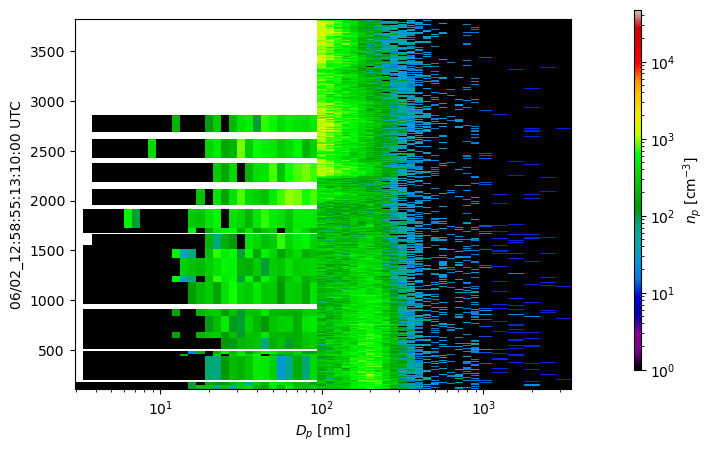

In [302]:
fig,ax = plt.subplots()
cmap = plt.colormaps['nipy_spectral']
    
c = ax.pcolormesh(mid, Altitude22a, value22a.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c = ax.pcolormesh(mid1, Altitude22, value22.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
ax.set_xscale('log')
ax.set_xscale('log')
ax.set_ylabel("06/02_12:58:55:13:10:00 UTC")
ax.set_xlabel('$D_p$ [nm]')
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
plt.show()

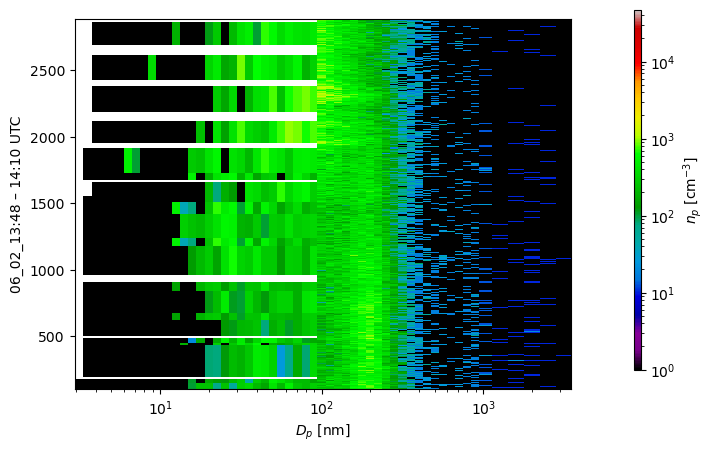

In [303]:
fig,ax = plt.subplots()
cmap = plt.colormaps['nipy_spectral']
    
c = ax.pcolormesh(mid, Altitude, value.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c = ax.pcolormesh(mid1, Altitude, value2.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
ax.set_xscale('log')
ax.set_xscale('log')
ax.set_ylabel("06_02_13:48 – 14:10 UTC")
ax.set_xlabel('$D_p$ [nm]')
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
plt.show()

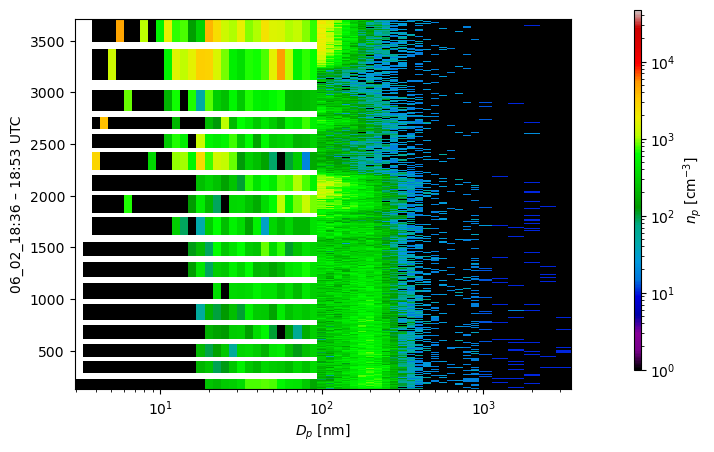

In [304]:
fig,ax = plt.subplots()
cmap = plt.colormaps['nipy_spectral']
    
c = ax.pcolormesh(mid, Altitude2b, value2b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c = ax.pcolormesh(mid1, Altitude20b, value20b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
ax.set_xscale('log')
ax.set_xscale('log')
ax.set_ylabel("06_02_18:36 – 18:53 UTC")
ax.set_xlabel('$D_p$ [nm]')
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
plt.show()

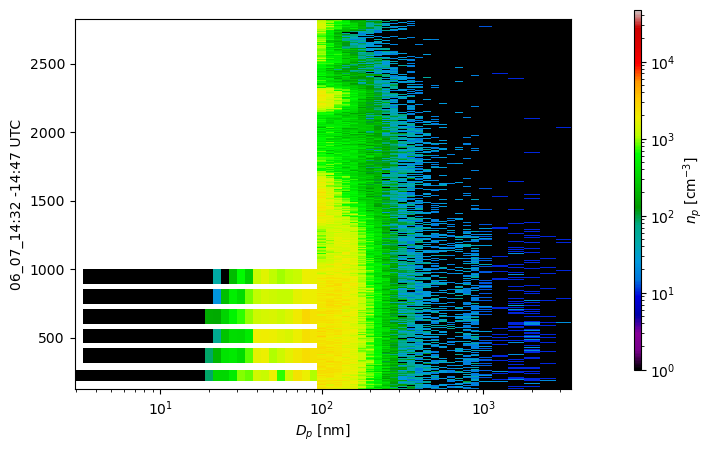

In [305]:

fig,ax = plt.subplots()
cmap = plt.colormaps['nipy_spectral']
c = ax.pcolormesh(mid, Altitude7, value7.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c = ax.pcolormesh(mid1, Altitude70, value70.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])

ax.set_xscale('log')
ax.set_xscale('log')
ax.set_ylabel("06_07_14:32 -14:47 UTC")
ax.set_xlabel('$D_p$ [nm]')
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
plt.show()

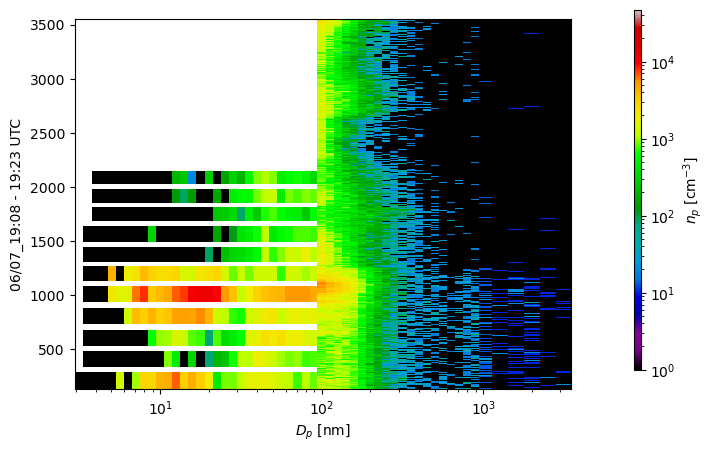

In [306]:

fig,ax = plt.subplots()
cmap = plt.colormaps['nipy_spectral']
c = ax.pcolormesh(mid, Altitude7b, value7b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c = ax.pcolormesh(mid1, Altitude70b, value70b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])

ax.set_xscale('log')
ax.set_xscale('log')
ax.set_ylabel("06/07_19:08 - 19:23 UTC")
ax.set_xlabel('$D_p$ [nm]')
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
plt.show()

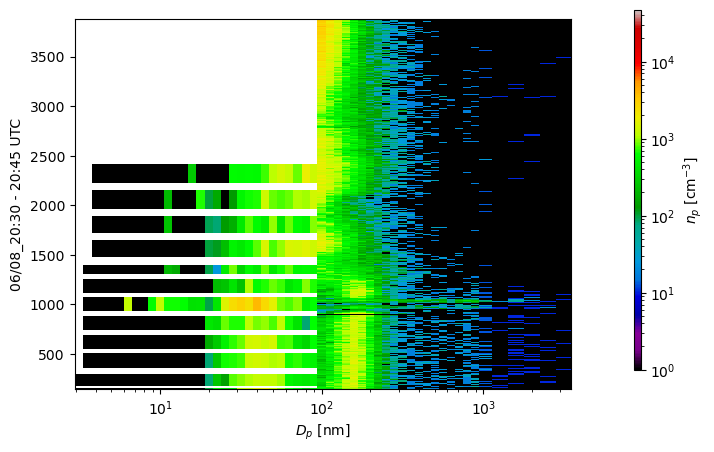

In [307]:

fig,ax = plt.subplots()
cmap = plt.colormaps['nipy_spectral']
c = ax.pcolormesh(mid, Altitude8, value8.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c = ax.pcolormesh(mid1, Altitude80, value80.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])

ax.set_xscale('log')
ax.set_xscale('log')
ax.set_ylabel("06/08_20:30 - 20:45 UTC")
ax.set_xlabel('$D_p$ [nm]')
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
plt.show()

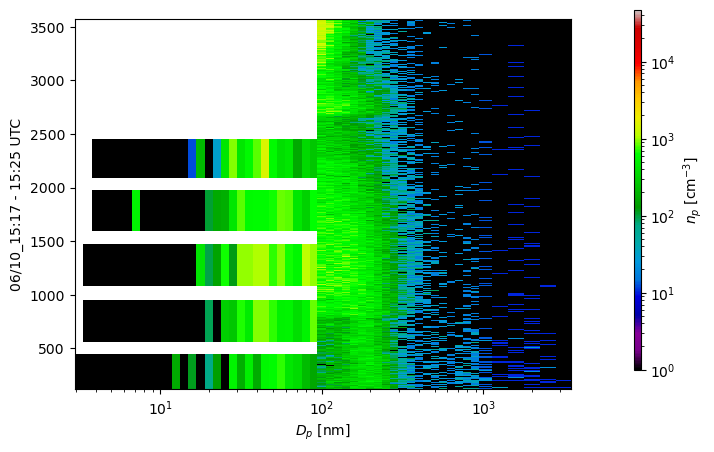

In [313]:

fig,ax = plt.subplots()
cmap = plt.colormaps['nipy_spectral']
c = ax.pcolormesh(mid, Altitude10, value10.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c = ax.pcolormesh(mid1, Altitude100, value100.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])

ax.set_xscale('log')
ax.set_xscale('log')
ax.set_ylabel("06/10_15:17 - 15:25 UTC")
ax.set_xlabel('$D_p$ [nm]')
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
plt.show()

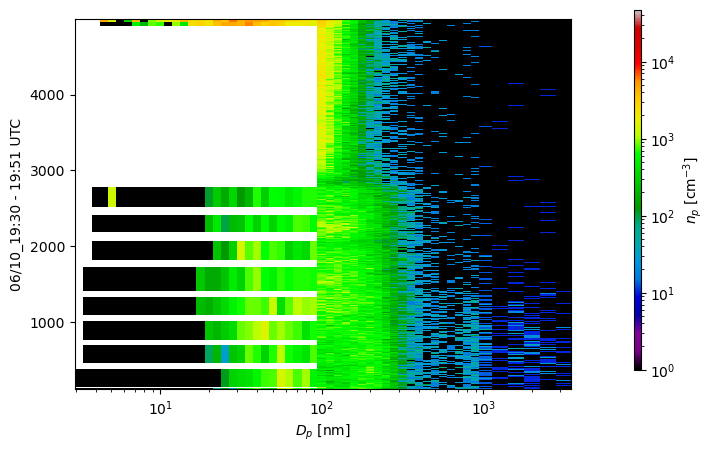

In [311]:

fig,ax = plt.subplots()
cmap = plt.colormaps['nipy_spectral']
c = ax.pcolormesh(mid, Altitude1110b, value1110b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c = ax.pcolormesh(mid1, Altitude1110bb, value1110bb.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])

ax.set_xscale('log')
ax.set_xscale('log')
ax.set_ylabel("06/10_19:30 - 19:51 UTC")
ax.set_xlabel('$D_p$ [nm]')
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
plt.show()

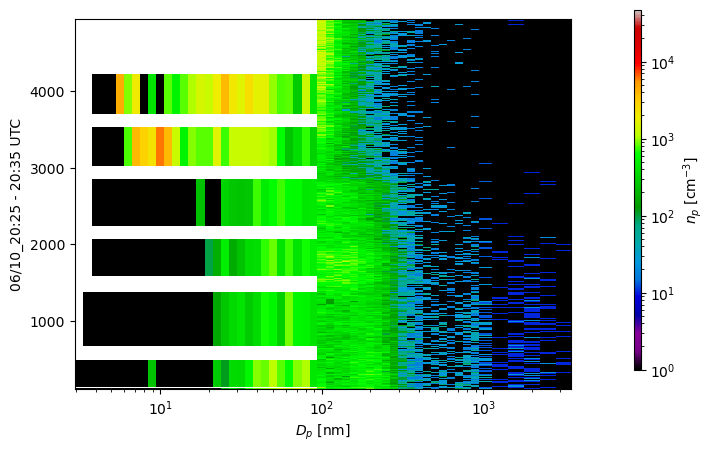

In [314]:

fig,ax = plt.subplots()
cmap = plt.colormaps['nipy_spectral']
c = ax.pcolormesh(mid, Altitude10b, value10b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c = ax.pcolormesh(mid1, Altitude100b, value100b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])

ax.set_xscale('log')
ax.set_xscale('log')
ax.set_ylabel("06/10_20:25 - 20:35 UTC")
ax.set_xlabel('$D_p$ [nm]')
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
plt.show()

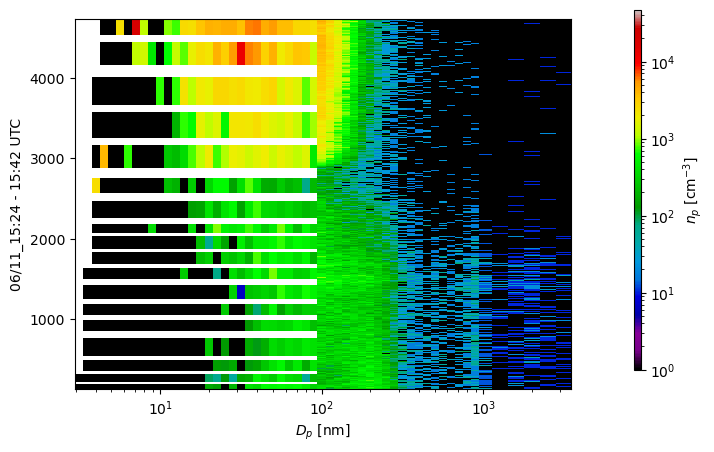

In [315]:

fig,ax = plt.subplots()
cmap = plt.colormaps['nipy_spectral']
c =ax.pcolormesh(mid, Altitude11, value11.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c =ax.pcolormesh(mid1, Altitude110, value110.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])

ax.set_xscale('log')
ax.set_xscale('log')
ax.set_ylabel("06/11_15:24 - 15:42 UTC")
ax.set_xlabel('$D_p$ [nm]')
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
plt.show()

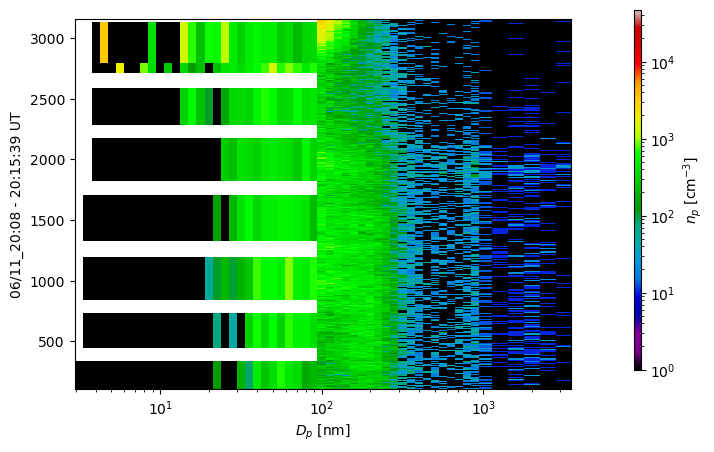

In [316]:

fig,ax = plt.subplots()
cmap = plt.colormaps['nipy_spectral']
c = ax.pcolormesh(mid, Altitude11b, value11b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c = ax.pcolormesh(mid1, Altitude110b, value110b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])

ax.set_xscale('log')
ax.set_xscale('log')
ax.set_ylabel("06/11_20:08 - 20:15:39 UT")
ax.set_xlabel('$D_p$ [nm]')
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
plt.show()

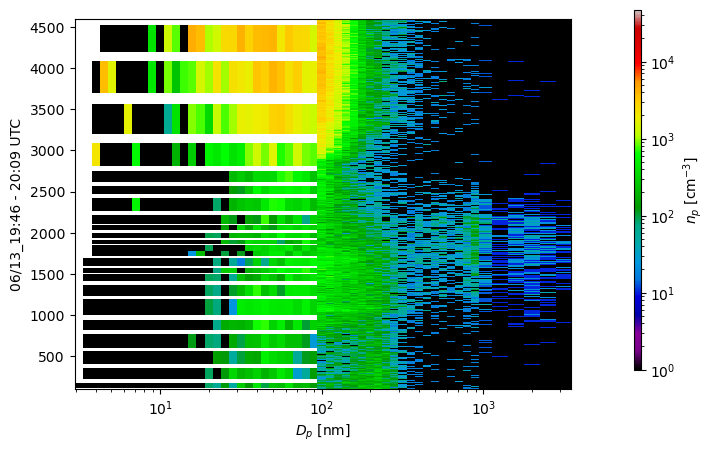

In [329]:

fig,ax = plt.subplots()
cmap = plt.colormaps['nipy_spectral']
c = ax.pcolormesh(mid, Altitude13, value13.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c = ax.pcolormesh(mid1, Altitude13, value130.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])

ax.set_xscale('log')
ax.set_xscale('log')
ax.set_ylabel("06/13_19:46 - 20:09 UTC")
ax.set_xlabel('$D_p$ [nm]')
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
plt.show()

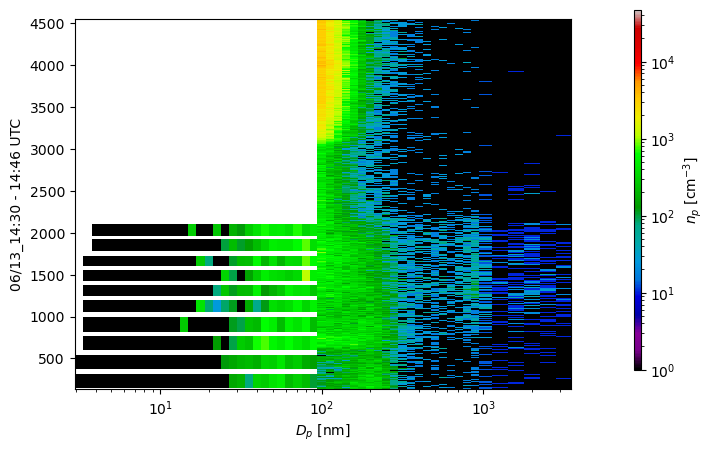

In [328]:

fig,ax = plt.subplots()
cmap = plt.colormaps['nipy_spectral']
c = ax.pcolormesh(mid, Altitude13b, value13b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c = ax.pcolormesh(mid1, Altitude130b, value130b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])

ax.set_xscale('log')
ax.set_xscale('log')
ax.set_ylabel("06/13_14:30 - 14:46 UTC")
ax.set_xlabel('$D_p$ [nm]')
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
plt.show()

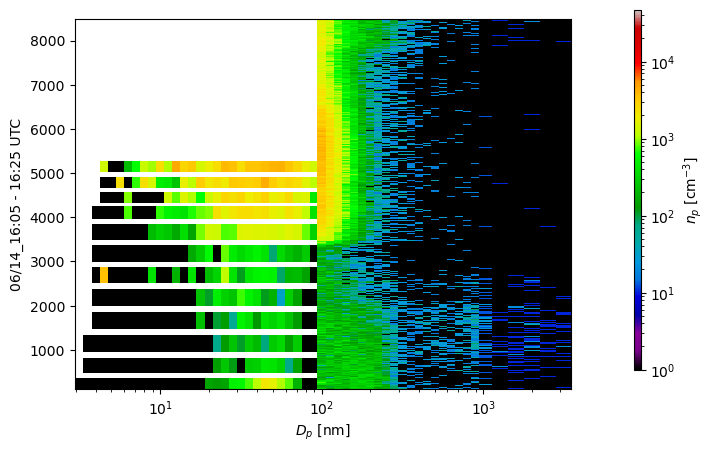

In [330]:

fig,ax = plt.subplots()
cmap = plt.colormaps['nipy_spectral']
c = ax.pcolormesh(mid, Altitude14, value14.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c = ax.pcolormesh(mid1, Altitude140, value140.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])

ax.set_xscale('log')
ax.set_xscale('log')
ax.set_ylabel("06/14_16:05 - 16:25 UTC")
ax.set_xlabel('$D_p$ [nm]')
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
plt.show()

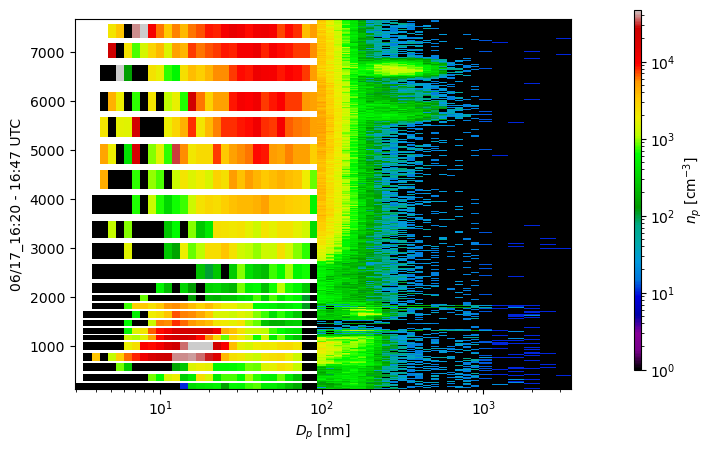

In [331]:

fig,ax = plt.subplots()
cmap = plt.colormaps['nipy_spectral']
c = ax.pcolormesh(mid, Altitude17, value17.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c = ax.pcolormesh(mid1, Altitude170, value170.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])

ax.set_xscale('log')
ax.set_xscale('log')
ax.set_ylabel("06/17_16:20 - 16:47 UTC")
ax.set_xlabel('$D_p$ [nm]')
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
plt.show()

In [ ]:
fig,ax = plt.subplots(5, 3, figsize=(15, 15), sharex = 'all')
cmap = plt.colormaps['nipy_spectral']
    
c = ax.pcolormesh(mid, Altitude, value.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c = ax.pcolormesh(mid1, Altitude, value2.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c2 = ax.pcolormesh(mid, Altitude13, value13.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c2 = ax.pcolormesh(mid1, Altitude13, value130.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])

c4 = ax.pcolormesh(mid, Altitude18, value18.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c4 = ax.pcolormesh(mid1, Altitude180, value180.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c5 = ax.pcolormesh(mid, Altitude17, value17.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c5 = ax.pcolormesh(mid1, Altitude170, value170.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c6 = ax.pcolormesh(mid, Altitude17b, value17b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c6 = ax.pcolormesh(mid1, Altitude170b, value170b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c7 =ax.pcolormesh(mid, Altitude11, value11.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c7 =ax.pcolormesh(mid1, Altitude110, value110.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])

c9 = ax.pcolormesh(mid, Altitude10, value10.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c9 = ax.pcolormesh(mid1, Altitude100, value100.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])




c14 = ax.pcolormesh(mid, Altitude3, value3.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c14 = ax.pcolormesh(mid1, Altitude30, value30.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])

#plt.title("sample plot title", size=24)
ax.set_xscale('log')
ax.set_xscale('log')
ax.set_xscale('log')
ax.set_ylabel("2022-06-02")
ax.set_ylabel("2022-06-13")
ax.set_ylabel("2022-06-14")
ax.set_ylabel("2022-06-18")
ax.set_ylabel("2022-06-17")
ax.set_ylabel("2022-05-17")
ax.set_ylabel("2022-06-11")
ax.set_ylabel("2022-06-11 (Night)")
ax.set_ylabel("2022-06-10")
ax.set_ylabel("2022-06-10 (Night)")
ax.set_ylabel("2022-06-08")
ax.set_ylabel("2022-06-07")
ax.set_ylabel("2022-06-07 (Night)")
ax.set_ylabel("2022-06-03")
ax.set_ylabel("2022-06-02 (Night)")
    #ax.set_ylabel(path1[acc:acc+4]+'-'+path1[acc+4:acc+6]+'-'+path1[acc+6:acc+8])
    #I am guessing the weird name you have here is to change the date, the easier thing to do is to index it backwards
ax.set_xlabel('$D_p$ [nm]')
ax.set_xlabel('$D_p$ [nm]')
ax.set_xlabel('$D_p$ [nm]')
ax.set_xlabel('$D_p$ [nm]')
ax.set_xlabel('$D_p$ [nm]')
ax.set_xlabel('$D_p$ [nm]')
ax.set_xlabel('$D_p$ [nm]')
ax.set_xlabel('$D_p$ [nm]')
ax.set_xlabel('$D_p$ [nm]')
ax.set_xlabel('$D_p$ [nm]')
ax.set_xlabel('$D_p$ [nm]')
ax.set_xlabel('$D_p$ [nm]')
ax.set_xlabel('$D_p$ [nm]')
ax.set_xlabel('$D_p$ [nm]')
ax.set_xlabel('$D_p$ [nm]')
#cb = plt.colorbar(c, orientation="vertical", pad=0.06, aspect=25, shrink=1)
#cb = plt.colorbar(c2, orientation="vertical", pad=0.06, aspect=25, shrink=1)
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
fig.tight_layout()
plt.show()
plt.savefig('SMPS_LAS.png', bbox_inches="tight", dpi=500)

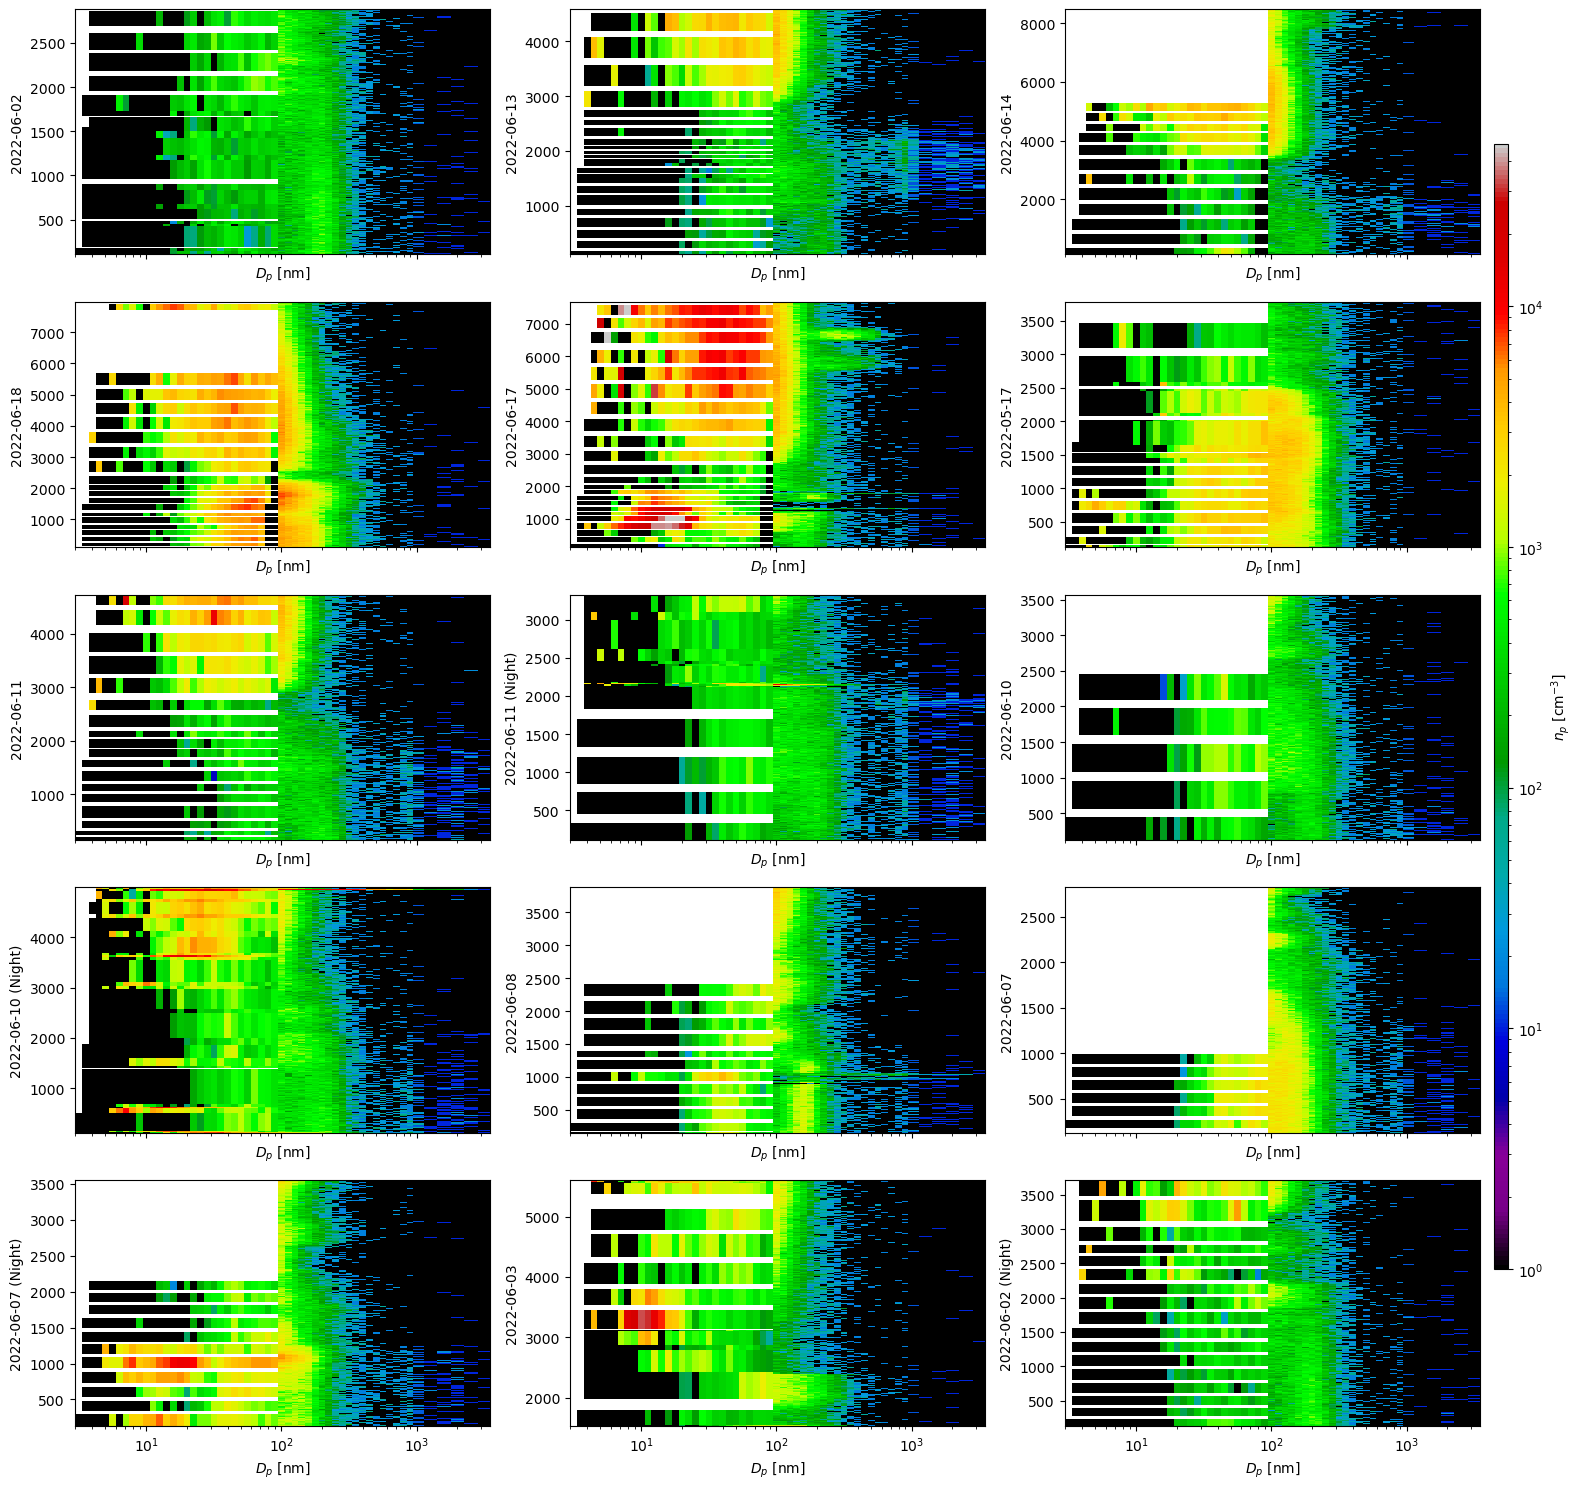

<Figure size 640x480 with 0 Axes>

In [ ]:
fig,ax = plt.subplots(5, 3, figsize=(15, 15), sharex = 'all')
cmap = plt.colormaps['nipy_spectral']
    
c = ax[0][0].pcolormesh(mid, Altitude, value.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c = ax[0][0].pcolormesh(mid1, Altitude, value2.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c2 = ax[0][1].pcolormesh(mid, Altitude13, value13.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c2 = ax[0][1].pcolormesh(mid1, Altitude13, value130.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c3 = ax[0][2].pcolormesh(mid, Altitude14, value14.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c3 = ax[0][2].pcolormesh(mid1, Altitude140, value140.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c4 = ax[1][0].pcolormesh(mid, Altitude18, value18.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c4 = ax[1][0].pcolormesh(mid1, Altitude180, value180.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c5 = ax[1][1].pcolormesh(mid, Altitude17, value17.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c5 = ax[1][1].pcolormesh(mid1, Altitude170, value170.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c6 = ax[1][2].pcolormesh(mid, Altitude17b, value17b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c6 = ax[1][2].pcolormesh(mid1, Altitude170b, value170b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c7 = ax[2][0].pcolormesh(mid, Altitude11, value11.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c7 = ax[2][0].pcolormesh(mid1, Altitude110, value110.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c8 = ax[2][1].pcolormesh(mid, Altitude11b, value11b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c8 = ax[2][1].pcolormesh(mid1, Altitude110b, value110b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c9 = ax[2][2].pcolormesh(mid, Altitude10, value10.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c9 = ax[2][2].pcolormesh(mid1, Altitude100, value100.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c10 = ax[3][0].pcolormesh(mid, Altitude10b, value10b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c10 = ax[3][0].pcolormesh(mid1, Altitude100b, value100b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c11 = ax[3][1].pcolormesh(mid, Altitude8, value8.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c11 = ax[3][1].pcolormesh(mid1, Altitude80, value80.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c12 = ax[3][2].pcolormesh(mid, Altitude7, value7.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c12 = ax[3][2].pcolormesh(mid1, Altitude70, value70.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c13 = ax[4][0].pcolormesh(mid, Altitude7b, value7b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c13 = ax[4][0].pcolormesh(mid1, Altitude70b, value70b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c14 = ax[4][1].pcolormesh(mid, Altitude3, value3.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c14 = ax[4][1].pcolormesh(mid1, Altitude30, value30.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c15 = ax[4][2].pcolormesh(mid, Altitude2b, value2b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c15 = ax[4][2].pcolormesh(mid1, Altitude20b, value20b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])

#plt.title("sample plot title", size=24)
ax[0][0].set_xscale('log')
ax[0][1].set_xscale('log')
ax[0][2].set_xscale('log')
ax[0][0].set_ylabel("2022-06-02")
ax[0][1].set_ylabel("2022-06-13")
ax[0][2].set_ylabel("2022-06-14")
ax[1][0].set_ylabel("2022-06-18")
ax[1][1].set_ylabel("2022-06-17")
ax[1][2].set_ylabel("2022-05-17")
ax[2][0].set_ylabel("2022-06-11")
ax[2][1].set_ylabel("2022-06-11 (Night)")
ax[2][2].set_ylabel("2022-06-10")
ax[3][0].set_ylabel("2022-06-10 (Night)")
ax[3][1].set_ylabel("2022-06-08")
ax[3][2].set_ylabel("2022-06-07")
ax[4][0].set_ylabel("2022-06-07 (Night)")
ax[4][1].set_ylabel("2022-06-03")
ax[4][2].set_ylabel("2022-06-02 (Night)")
    #ax.set_ylabel(path1[acc:acc+4]+'-'+path1[acc+4:acc+6]+'-'+path1[acc+6:acc+8])
    #I am guessing the weird name you have here is to change the date, the easier thing to do is to index it backwards
ax[0][0].set_xlabel('$D_p$ [nm]')
ax[0][1].set_xlabel('$D_p$ [nm]')
ax[0][2].set_xlabel('$D_p$ [nm]')
ax[1][0].set_xlabel('$D_p$ [nm]')
ax[1][1].set_xlabel('$D_p$ [nm]')
ax[1][2].set_xlabel('$D_p$ [nm]')
ax[2][0].set_xlabel('$D_p$ [nm]')
ax[2][1].set_xlabel('$D_p$ [nm]')
ax[2][2].set_xlabel('$D_p$ [nm]')
ax[3][0].set_xlabel('$D_p$ [nm]')
ax[3][1].set_xlabel('$D_p$ [nm]')
ax[3][2].set_xlabel('$D_p$ [nm]')
ax[4][0].set_xlabel('$D_p$ [nm]')
ax[4][1].set_xlabel('$D_p$ [nm]')
ax[4][2].set_xlabel('$D_p$ [nm]')
#cb = plt.colorbar(c, orientation="vertical", pad=0.06, aspect=25, shrink=1)
#cb = plt.colorbar(c2, orientation="vertical", pad=0.06, aspect=25, shrink=1)
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
fig.tight_layout()
plt.show()
plt.savefig('SMPS_LAS.png', bbox_inches="tight", dpi=500)

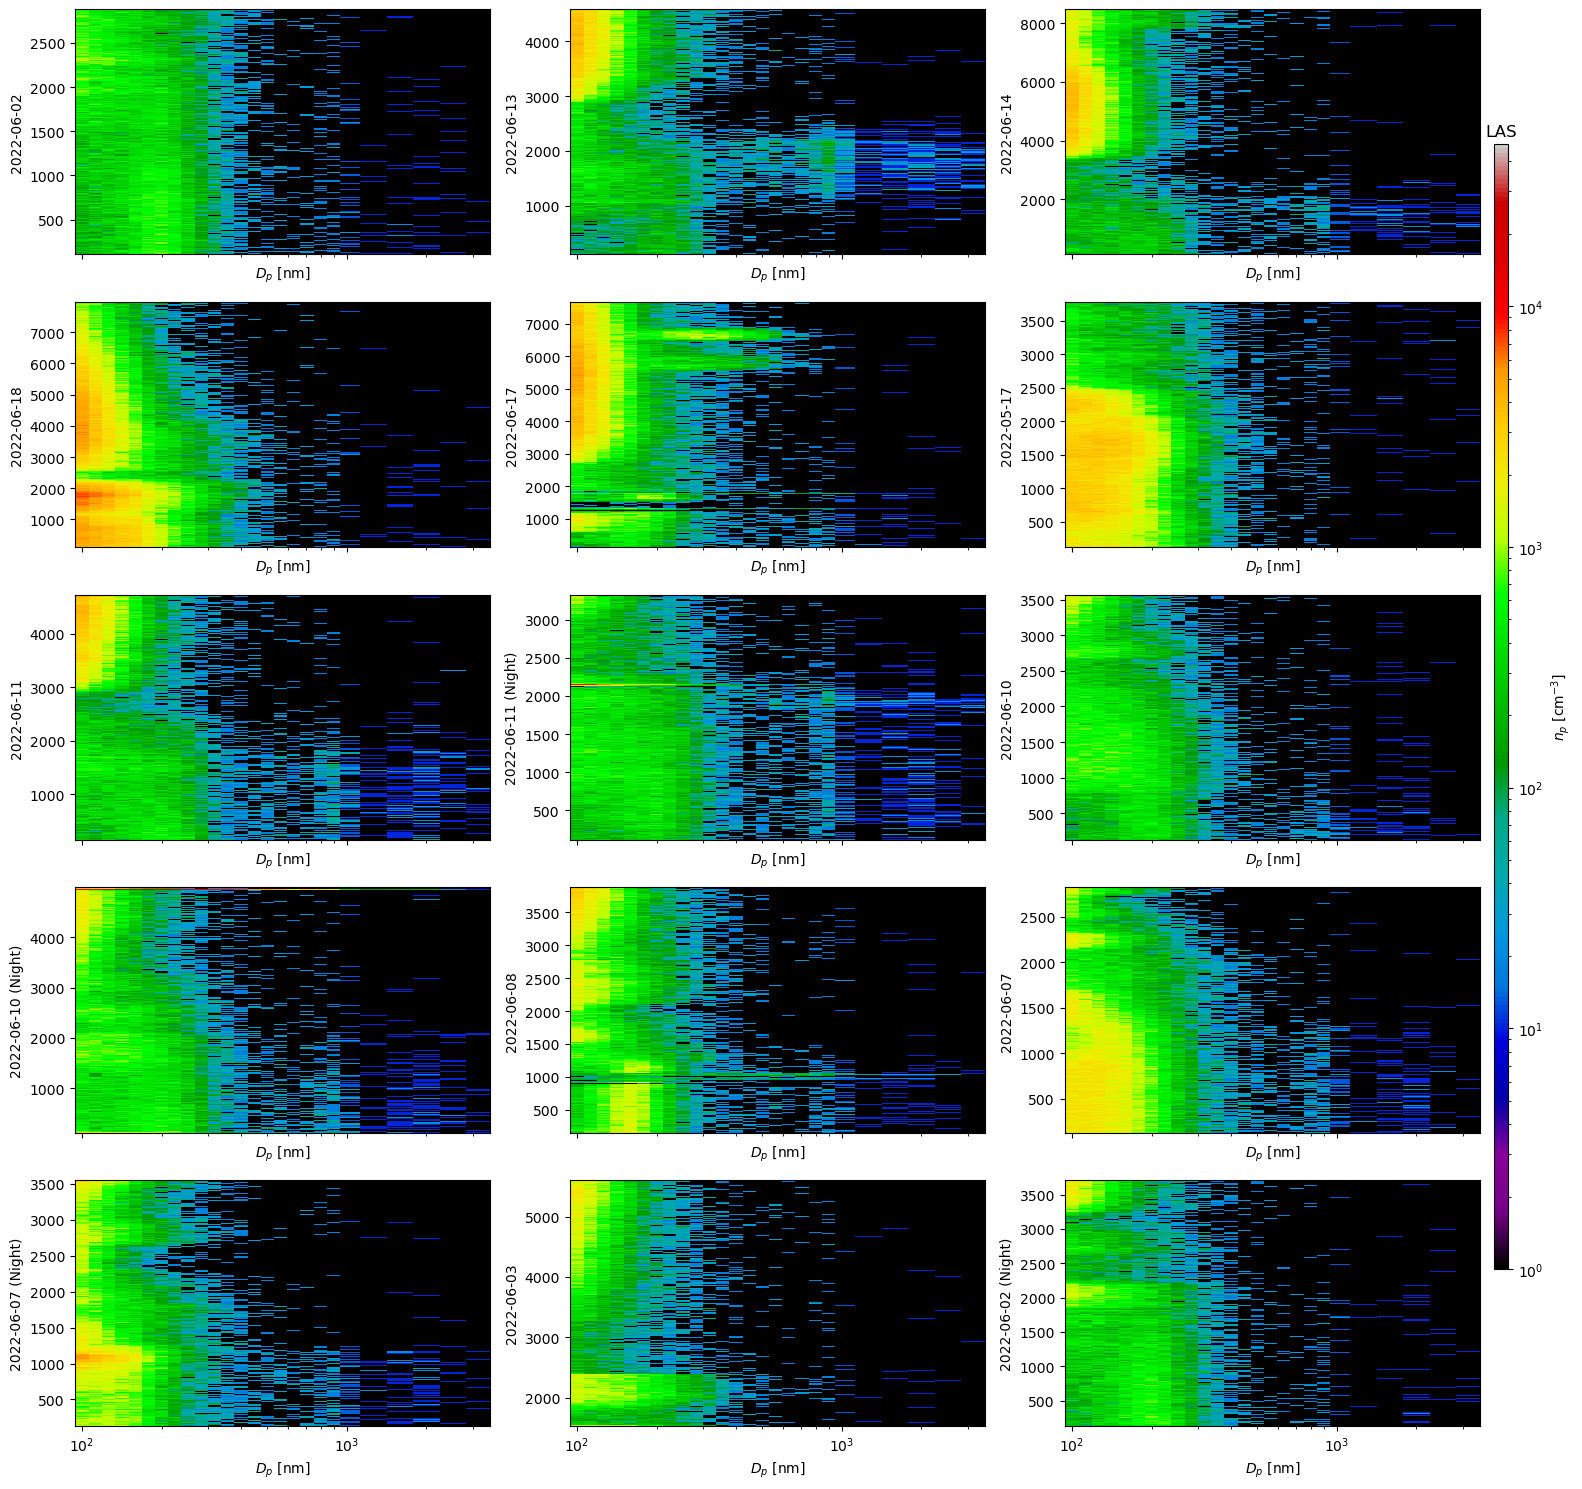

<Figure size 640x480 with 0 Axes>

In [ ]:
fig,ax = plt.subplots(5, 3, figsize=(15, 15), sharex = 'all')
cmap = plt.colormaps['nipy_spectral']
    
c = ax[0][0].pcolormesh(mid, Altitude, value.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c2 = ax[0][1].pcolormesh(mid, Altitude13, value13.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c3 = ax[0][2].pcolormesh(mid, Altitude14, value14.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c4 = ax[1][0].pcolormesh(mid, Altitude18, value18.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c5 = ax[1][1].pcolormesh(mid, Altitude17, value17.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c6 = ax[1][2].pcolormesh(mid, Altitude17b, value17b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c7 = ax[2][0].pcolormesh(mid, Altitude11, value11.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c8 = ax[2][1].pcolormesh(mid, Altitude11b, value11b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c9 = ax[2][2].pcolormesh(mid, Altitude10, value10.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c10 = ax[3][0].pcolormesh(mid, Altitude10b, value10b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c11 = ax[3][1].pcolormesh(mid, Altitude8, value8.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c12 = ax[3][2].pcolormesh(mid, Altitude7, value7.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c13 = ax[4][0].pcolormesh(mid, Altitude7b, value7b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c14 = ax[4][1].pcolormesh(mid, Altitude3, value3.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c15 = ax[4][2].pcolormesh(mid, Altitude2b, value2b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
#plt.title("sample plot title", size=24)
ax[0][0].set_xscale('log')
ax[0][1].set_xscale('log')
ax[0][2].set_xscale('log')
ax[0][0].set_ylabel("2022-06-02")
ax[0][1].set_ylabel("2022-06-13")
ax[0][2].set_ylabel("2022-06-14")
ax[1][0].set_ylabel("2022-06-18")
ax[1][1].set_ylabel("2022-06-17")
ax[1][2].set_ylabel("2022-05-17")
ax[2][0].set_ylabel("2022-06-11")
ax[2][1].set_ylabel("2022-06-11 (Night)")
ax[2][2].set_ylabel("2022-06-10")
ax[3][0].set_ylabel("2022-06-10 (Night)")
ax[3][1].set_ylabel("2022-06-08")
ax[3][2].set_ylabel("2022-06-07")
ax[4][0].set_ylabel("2022-06-07 (Night)")
ax[4][1].set_ylabel("2022-06-03")
ax[4][2].set_ylabel("2022-06-02 (Night)")
    #ax.set_ylabel(path1[acc:acc+4]+'-'+path1[acc+4:acc+6]+'-'+path1[acc+6:acc+8])
    #I am guessing the weird name you have here is to change the date, the easier thing to do is to index it backwards
ax[0][0].set_xlabel('$D_p$ [nm]')
ax[0][1].set_xlabel('$D_p$ [nm]')
ax[0][2].set_xlabel('$D_p$ [nm]')
ax[1][0].set_xlabel('$D_p$ [nm]')
ax[1][1].set_xlabel('$D_p$ [nm]')
ax[1][2].set_xlabel('$D_p$ [nm]')
ax[2][0].set_xlabel('$D_p$ [nm]')
ax[2][1].set_xlabel('$D_p$ [nm]')
ax[2][2].set_xlabel('$D_p$ [nm]')
ax[3][0].set_xlabel('$D_p$ [nm]')
ax[3][1].set_xlabel('$D_p$ [nm]')
ax[3][2].set_xlabel('$D_p$ [nm]')
ax[4][0].set_xlabel('$D_p$ [nm]')
ax[4][1].set_xlabel('$D_p$ [nm]')
ax[4][2].set_xlabel('$D_p$ [nm]')
#cb = plt.colorbar(c, orientation="vertical", pad=0.06, aspect=25, shrink=1)
#cb = plt.colorbar(c2, orientation="vertical", pad=0.06, aspect=25, shrink=1)
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
plt.title("LAS")
fig.tight_layout()
plt.show()
plt.savefig('LAS.png', bbox_inches="tight", dpi=500)

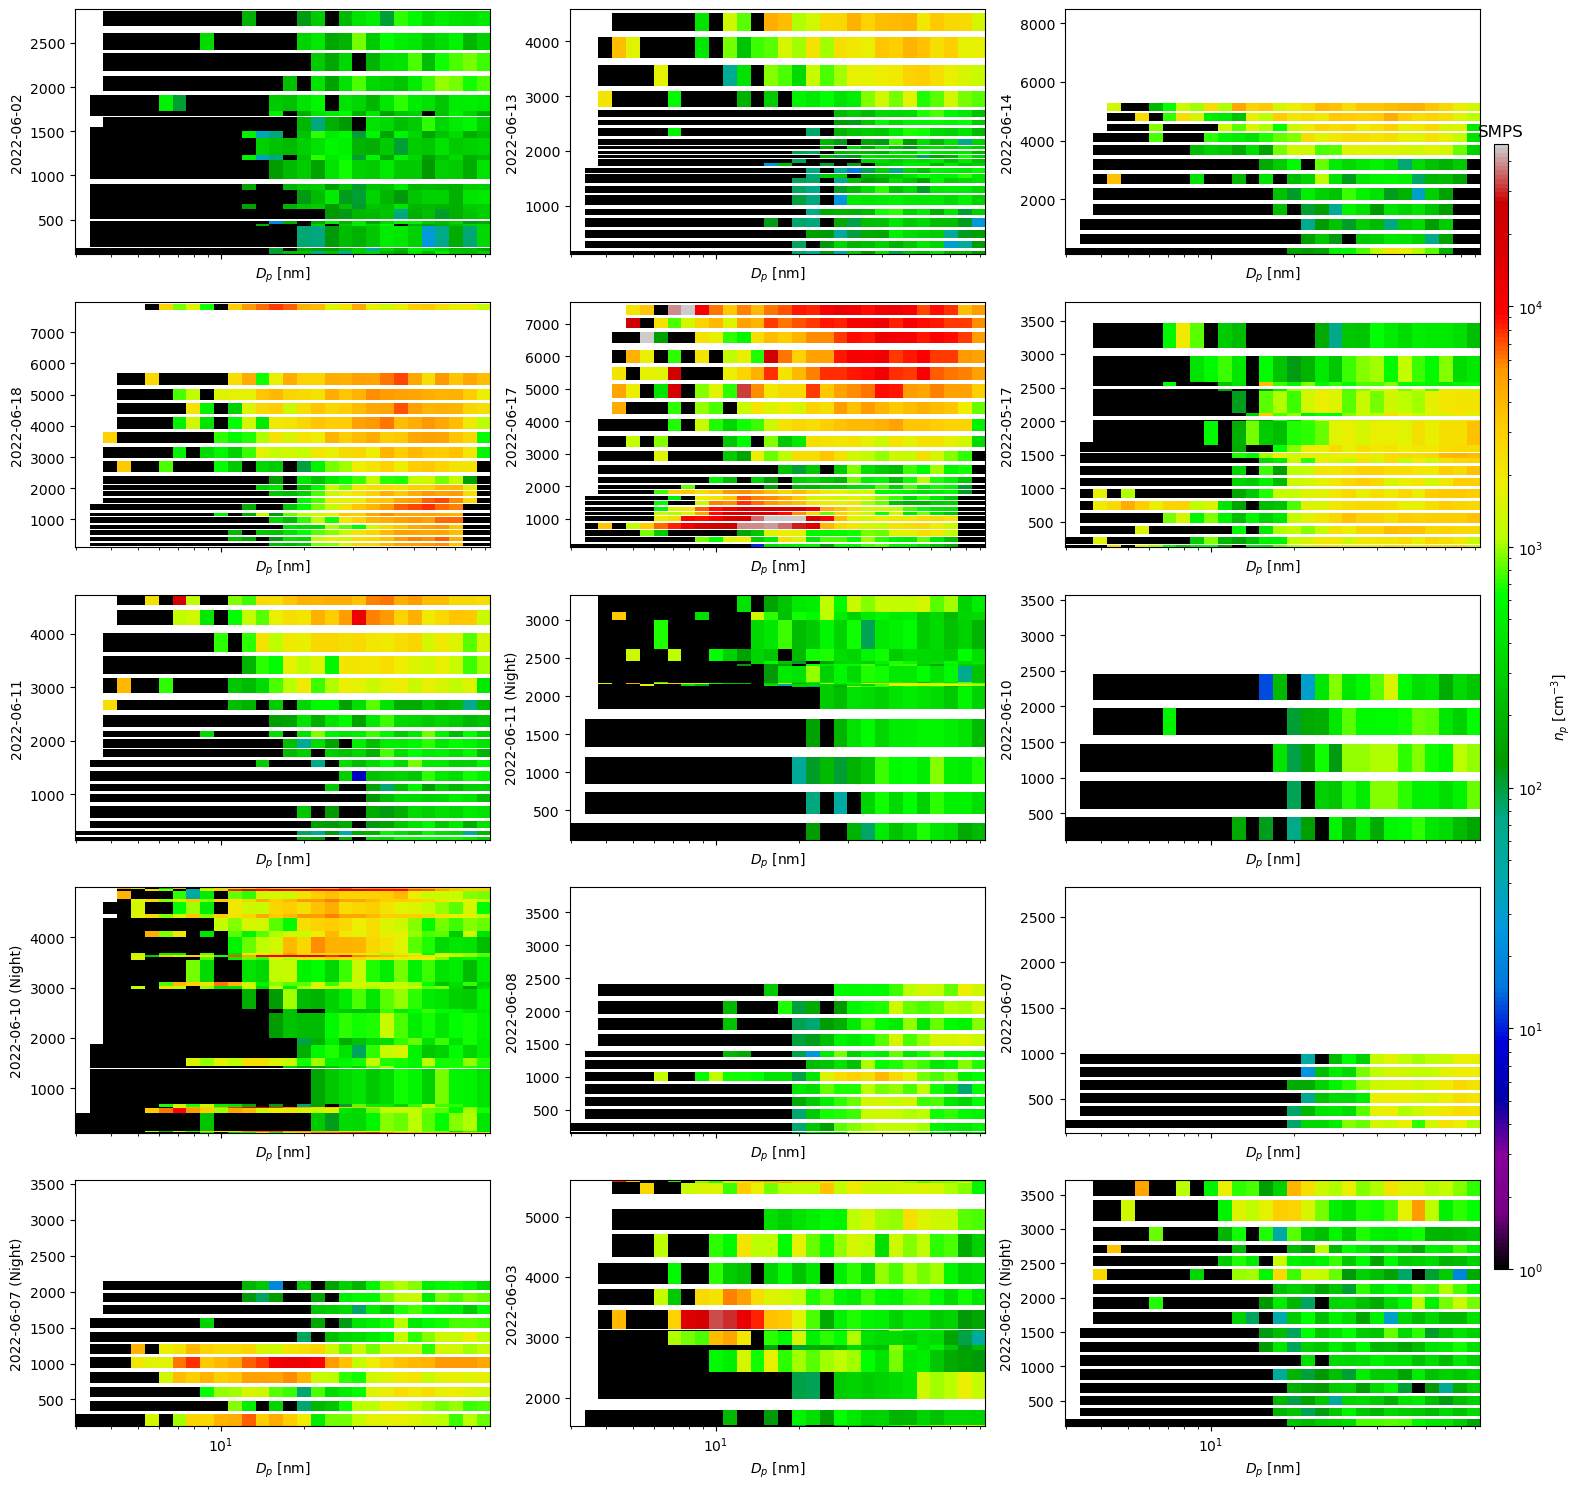

<Figure size 640x480 with 0 Axes>

In [ ]:
fig,ax = plt.subplots(5, 3, figsize=(15, 15), sharex = 'all')
cmap = plt.colormaps['nipy_spectral']
    
c = ax[0][0].pcolormesh(mid1, Altitude, value2.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c2 = ax[0][1].pcolormesh(mid1, Altitude13, value130.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c3 = ax[0][2].pcolormesh(mid1, Altitude140, value140.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c4 = ax[1][0].pcolormesh(mid1, Altitude180, value180.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c5 = ax[1][1].pcolormesh(mid1, Altitude170, value170.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c6 = ax[1][2].pcolormesh(mid1, Altitude170b, value170b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c7 = ax[2][0].pcolormesh(mid1, Altitude110, value110.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c8 = ax[2][1].pcolormesh(mid1, Altitude110b, value110b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c9 = ax[2][2].pcolormesh(mid1, Altitude100, value100.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c10 = ax[3][0].pcolormesh(mid1, Altitude100b, value100b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c11 = ax[3][1].pcolormesh(mid1, Altitude80, value80.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c12 = ax[3][2].pcolormesh(mid1, Altitude70, value70.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c13 = ax[4][0].pcolormesh(mid1, Altitude70b, value70b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c14 = ax[4][1].pcolormesh(mid1, Altitude30, value30.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])
c15 = ax[4][2].pcolormesh(mid1, Altitude20b, value20b.T, norm=LogNorm(vmin=1, vmax=47256.35), cmap = plt.colormaps['nipy_spectral'])

#plt.title("sample plot title", size=24)
ax[0][0].set_xscale('log')
ax[0][1].set_xscale('log')
ax[0][2].set_xscale('log')
ax[0][0].set_ylabel("2022-06-02")
ax[0][1].set_ylabel("2022-06-13")
ax[0][2].set_ylabel("2022-06-14")
ax[1][0].set_ylabel("2022-06-18")
ax[1][1].set_ylabel("2022-06-17")
ax[1][2].set_ylabel("2022-05-17")
ax[2][0].set_ylabel("2022-06-11")
ax[2][1].set_ylabel("2022-06-11 (Night)")
ax[2][2].set_ylabel("2022-06-10")
ax[3][0].set_ylabel("2022-06-10 (Night)")
ax[3][1].set_ylabel("2022-06-08")
ax[3][2].set_ylabel("2022-06-07")
ax[4][0].set_ylabel("2022-06-07 (Night)")
ax[4][1].set_ylabel("2022-06-03")
ax[4][2].set_ylabel("2022-06-02 (Night)")
    #ax.set_ylabel(path1[acc:acc+4]+'-'+path1[acc+4:acc+6]+'-'+path1[acc+6:acc+8])
    #I am guessing the weird name you have here is to change the date, the easier thing to do is to index it backwards
ax[0][0].set_xlabel('$D_p$ [nm]')
ax[0][1].set_xlabel('$D_p$ [nm]')
ax[0][2].set_xlabel('$D_p$ [nm]')
ax[1][0].set_xlabel('$D_p$ [nm]')
ax[1][1].set_xlabel('$D_p$ [nm]')
ax[1][2].set_xlabel('$D_p$ [nm]')
ax[2][0].set_xlabel('$D_p$ [nm]')
ax[2][1].set_xlabel('$D_p$ [nm]')
ax[2][2].set_xlabel('$D_p$ [nm]')
ax[3][0].set_xlabel('$D_p$ [nm]')
ax[3][1].set_xlabel('$D_p$ [nm]')
ax[3][2].set_xlabel('$D_p$ [nm]')
ax[4][0].set_xlabel('$D_p$ [nm]')
ax[4][1].set_xlabel('$D_p$ [nm]')
ax[4][2].set_xlabel('$D_p$ [nm]')
#cb = plt.colorbar(c, orientation="vertical", pad=0.06, aspect=25, shrink=1)
#cb = plt.colorbar(c2, orientation="vertical", pad=0.06, aspect=25, shrink=1)
cb_ax = fig.add_axes([0.999, 0.15, 0.01, 0.75])
cb = fig.colorbar(c, label='$dn_p/d\log D_p$ [cm$^{-3}$]', cax=cb_ax)
cb.set_label('$n_p$ [cm$^{-3}$]')
plt.title("SMPS")
fig.tight_layout()
plt.show()
plt.savefig('SMPS.png', bbox_inches="tight", dpi=500)

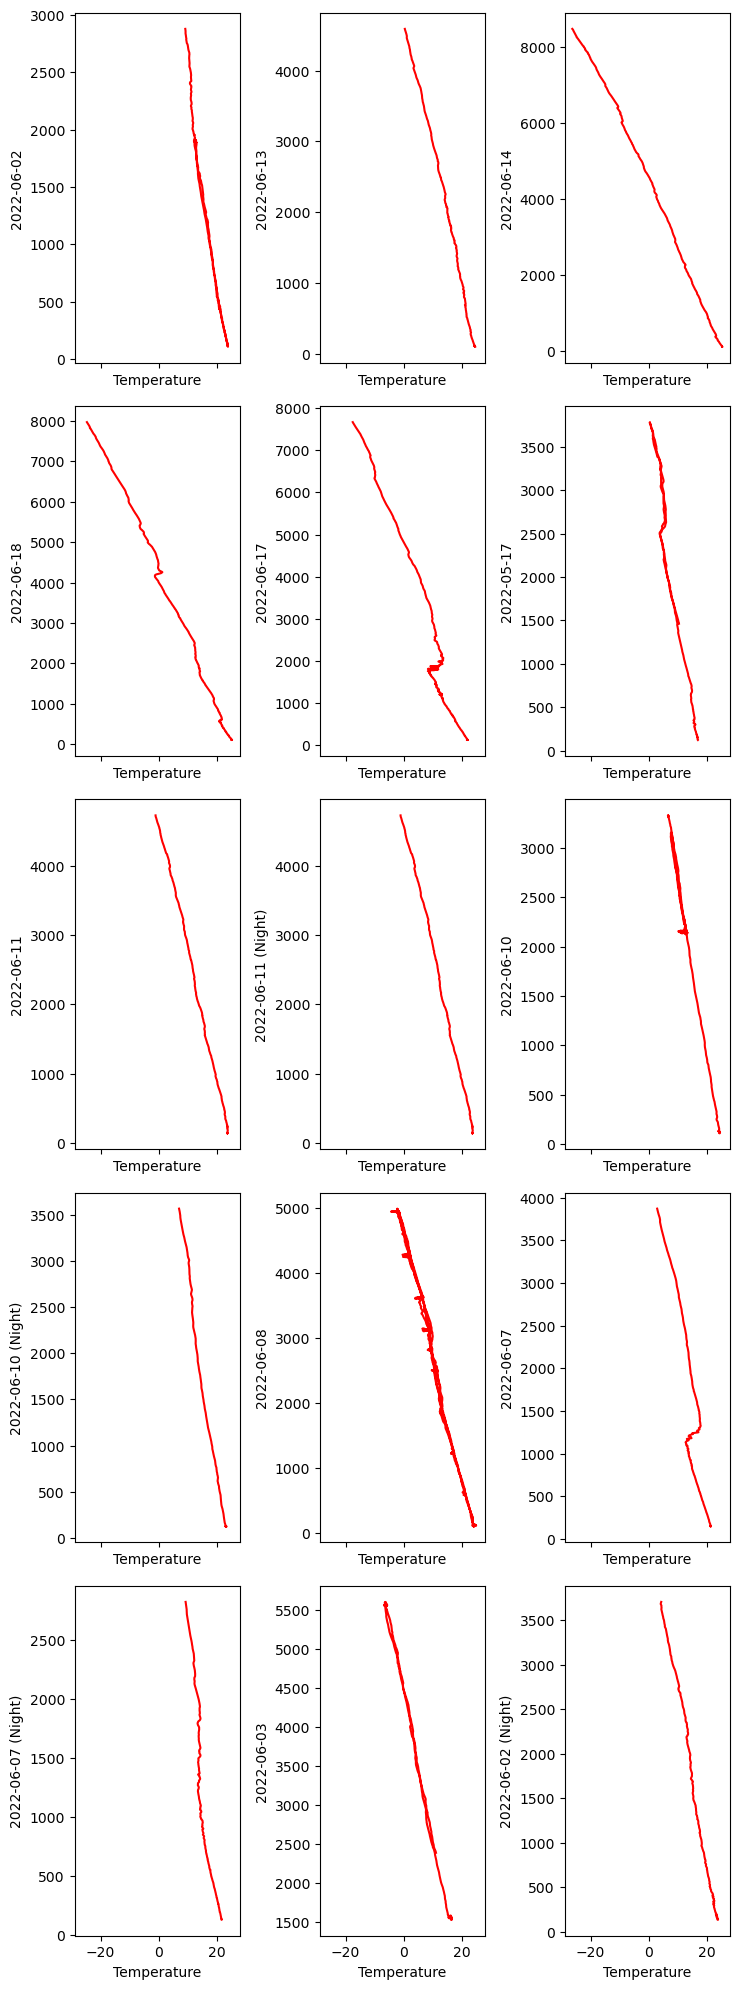

In [ ]:
fig,ax = plt.subplots(5, 3, figsize=(7.5, 20), sharex = 'all')
ax[0][0].plot(Micro_subset[' Static_Air_Temp_THORNHILL'], Micro_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[0][1].plot(Micro13_subset[' Static_Air_Temp_THORNHILL'], Micro13_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[0][2].plot(Micro14_subset[' Static_Air_Temp_THORNHILL'], Micro14_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[1][0].plot(Micro18_subset[' Static_Air_Temp_THORNHILL'], Micro18_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[1][1].plot(Micro17_subset[' Static_Air_Temp_THORNHILL'], Micro17_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[1][2].plot(Micro17b_subset[' Static_Air_Temp_THORNHILL'], Micro17b_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[2][0].plot(Micro11_subset[' Static_Air_Temp_THORNHILL'], Micro11_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[2][1].plot(Micro11_subset[' Static_Air_Temp_THORNHILL'], Micro11_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[2][2].plot(Micro11b_subset[' Static_Air_Temp_THORNHILL'], Micro11b_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[3][0].plot(Micro10_subset[' Static_Air_Temp_THORNHILL'], Micro10_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[3][1].plot(Micro10b_subset[' Static_Air_Temp_THORNHILL'], Micro10b_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[3][2].plot(Micro8_subset[' Static_Air_Temp_THORNHILL'], Micro8_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[4][0].plot(Micro7_subset[' Static_Air_Temp_THORNHILL'], Micro7_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[4][1].plot(Micro3_subset[' Static_Air_Temp_THORNHILL'], Micro3_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[4][2].plot(Micro2b_subset[' Static_Air_Temp_THORNHILL'], Micro2b_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[0][0].set_ylabel("2022-06-02")
ax[0][1].set_ylabel("2022-06-13")
ax[0][2].set_ylabel("2022-06-14")
ax[1][0].set_ylabel("2022-06-18")
ax[1][1].set_ylabel("2022-06-17")
ax[1][2].set_ylabel("2022-05-17")
ax[2][0].set_ylabel("2022-06-11")
ax[2][1].set_ylabel("2022-06-11 (Night)")
ax[2][2].set_ylabel("2022-06-10")
ax[3][0].set_ylabel("2022-06-10 (Night)")
ax[3][1].set_ylabel("2022-06-08")
ax[3][2].set_ylabel("2022-06-07")
ax[4][0].set_ylabel("2022-06-07 (Night)")
ax[4][1].set_ylabel("2022-06-03")
ax[4][2].set_ylabel("2022-06-02 (Night)")

ax[0][0].set_xlabel('Temperature')
ax[0][1].set_xlabel('Temperature')
ax[0][2].set_xlabel('Temperature')
ax[1][0].set_xlabel('Temperature')
ax[1][1].set_xlabel('Temperature')
ax[1][2].set_xlabel('Temperature')
ax[2][0].set_xlabel('Temperature')
ax[2][1].set_xlabel('Temperature')
ax[2][2].set_xlabel('Temperature')
ax[3][0].set_xlabel('Temperature')
ax[3][1].set_xlabel('Temperature')
ax[3][2].set_xlabel('Temperature')
ax[4][0].set_xlabel('Temperature')
ax[4][1].set_xlabel('Temperature')
ax[4][2].set_xlabel('Temperature')

fig.tight_layout()

In [ ]:
CO2 = (Micro_subset[' CO_ppm_DISKIN'])*1000
CO2

8926    NaN
8927    NaN
8928    NaN
8929    NaN
8930    NaN
         ..
10241   NaN
10242   NaN
10243   NaN
10244   NaN
10245   NaN
Name:  CO_ppm_DISKIN, Length: 1320, dtype: float64

In [ ]:
CO13 = (Micro13_subset[' CO_ppm_DISKIN'])*1000
CO13

10610      NaN
10611     73.9
10612     73.9
10613     73.3
10614     73.3
         ...  
11985      NaN
11986      NaN
11987    118.1
11988    118.1
11989      NaN
Name:  CO_ppm_DISKIN, Length: 1380, dtype: float64

In [ ]:
CO14 = (Micro14_subset[' CO_ppm_DISKIN'])*1000
CO14

9363     77.0
9364     77.0
9365      NaN
9366     76.4
9367     76.4
         ... 
10558    95.1
10559    99.1
10560    99.1
10561     NaN
10562    90.2
Name:  CO_ppm_DISKIN, Length: 1200, dtype: float64

In [ ]:
CO18 = (Micro18_subset[' CO_ppm_DISKIN'])*1000
CO18

7425      NaN
7426    116.8
7427      NaN
7428    115.2
7429    115.2
        ...  
8860      NaN
8861      NaN
8862      NaN
8863      NaN
8864      NaN
Name:  CO_ppm_DISKIN, Length: 1440, dtype: float64

In [ ]:
CO17 = (Micro17_subset[' CO_ppm_DISKIN'])*1000
CO17

10469    91.5
10470     NaN
10471    90.3
10472    90.3
10473     NaN
         ... 
12084     NaN
12085    92.4
12086    92.4
12087    91.1
12088    91.1
Name:  CO_ppm_DISKIN, Length: 1620, dtype: float64

In [ ]:
CO17b = (Micro17b_subset[' CO_ppm_DISKIN'])*1000
CO17b

5688    124.2
5689    121.9
5690    121.9
5691      NaN
5692    123.5
        ...  
7158    125.5
7159    125.3
7160    125.3
7161      NaN
7162    123.1
Name:  CO_ppm_DISKIN, Length: 1475, dtype: float64

In [ ]:
CO11 = (Micro11_subset[' CO_ppm_DISKIN'])*1000
CO11

10800    82.7
10801     NaN
10802    80.3
10803    80.3
10804    80.8
         ... 
11875    84.7
11876     NaN
11877    84.4
11878     NaN
11879    82.6
Name:  CO_ppm_DISKIN, Length: 1080, dtype: float64

In [ ]:
CO11b = (Micro11b_subset[' CO_ppm_DISKIN'])*1000
CO11b

9350     81.4
9351     81.4
9352      NaN
9353     86.6
9354     86.6
         ... 
11145    71.1
11146    71.1
11147    74.3
11148    74.3
11149     NaN
Name:  CO_ppm_DISKIN, Length: 1800, dtype: float64

In [ ]:
CO10 = (Micro10_subset[' CO_ppm_DISKIN'])*1000
CO10

10616     NaN
10617    83.8
10618    83.8
10619    83.7
10620    83.7
         ... 
11091    81.8
11092     NaN
11093    74.9
11094    74.9
11095    84.5
Name:  CO_ppm_DISKIN, Length: 480, dtype: float64

In [ ]:
CO10b = (Micro10b_subset[' CO_ppm_DISKIN'])*1000
CO10b

7182     84.9
7183      NaN
7184     84.1
7185     84.1
7186     84.4
         ... 
11677    83.2
11678     NaN
11679    84.1
11680     NaN
11681    81.8
Name:  CO_ppm_DISKIN, Length: 4500, dtype: float64

In [ ]:
CO8 = (Micro8_subset[' CO_ppm_DISKIN'])*1000
CO8

10668     98.8
10669      NaN
10670    101.3
10671    101.3
10672      NaN
         ...  
11563     75.9
11564     75.9
11565      NaN
11566     78.1
11567     78.1
Name:  CO_ppm_DISKIN, Length: 900, dtype: float64

In [ ]:
CO7 = (Micro7_subset[' CO_ppm_DISKIN'])*1000
CO7

10397    110.2
10398    110.2
10399      NaN
10400    109.7
10401    109.7
         ...  
11292     89.6
11293     89.6
11294      NaN
11295     93.8
11296      NaN
Name:  CO_ppm_DISKIN, Length: 900, dtype: float64

In [ ]:
CO7b = (Micro7b_subset[' CO_ppm_DISKIN'])*1000
CO7b

10420    103.5
10421    103.5
10422      NaN
10423    100.1
10424      NaN
         ...  
11315     83.7
11316     83.7
11317      NaN
11318     83.0
11319      NaN
Name:  CO_ppm_DISKIN, Length: 900, dtype: float64

In [ ]:
CO3 = (Micro3_subset[' CO_ppm_DISKIN'])*1000
CO3

6067    93.6
6068     NaN
6069    95.1
6070    95.1
6071    91.6
        ... 
7862    77.9
7863    72.8
7864    72.8
7865     NaN
7866    75.8
Name:  CO_ppm_DISKIN, Length: 1800, dtype: float64

In [ ]:
CO2b = (Micro2b_subset[' CO_ppm_DISKIN'])*1000
CO2b

9180     87.6
9181     87.6
9182     90.2
9183     90.2
9184      NaN
         ... 
10195     NaN
10196    77.7
10197    77.7
10198    78.2
10199    78.2
Name:  CO_ppm_DISKIN, Length: 1020, dtype: float64

In [ ]:
'''fig,ax = plt.subplots(1, 4, figsize=(10, 6), sharey = 'all')
#plt.xscale("log")
ax[0].plot(Micro_subset[' CNgt3nm_ZIEMBA'], Micro_subset[' GPS_Altitude_THORNHILL'], color = "gold", label="Fine+Nucleation")
ax[0].plot(Micro_subset[' CNgt10nm_ZIEMBA'], Micro_subset[' GPS_Altitude_THORNHILL'], color = "aqua", label = 'Fine')
ax[0].plot(Micro_subset[' CNgt10nm_nonvol_ZIEMBA'], Micro_subset[' GPS_Altitude_THORNHILL'], color = "red", label = 'Non-Volatile Fine')
ax[0].set_ylabel('Altitude [2022-06-02]')
ax[0].set_xlabel('Particle Number Concentration (cm$^{-3}$)')
ax[0].set_xscale('log')
leg = ax[0].legend(loc='upper right', fontsize=8)

ax2= ax[1].twiny()
ax[1].plot(CO2, Micro_subset[' GPS_Altitude_THORNHILL'], color = 'black')
ax[1].set_xlim([0, 80])
ax[1].set_xlabel('CO (ppb)')
#Merge[' CO_ppm_DISKIN']
ax2.plot(Micro_subset[' O3_ppbv_DISKIN'], Micro_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax2.set_xlim([0, 80])
ax2.set_xlabel('O3 (ppbv)', color = "red")

ax3 = ax[2].twiny()
ax[2].plot(Micro_subset[' Sc450_submicron_ZIEMBA'], Micro_subset[' GPS_Altitude_THORNHILL'], color = 'blue', label = '80-90%RH')
ax[2].plot(Micro_subset[' Sc550_submicron_ZIEMBA'], Micro_subset[' GPS_Altitude_THORNHILL'], color = 'green', label = 'Dry RH')
ax3.plot(Micro_subset[' Abs532_total_ZIEMBA'], Micro_subset[' GPS_Altitude_THORNHILL'], color = 'yellow')
ax[2].legend()
ax[2].set_xlabel('Scattering (Mm$^{-1}$)')
ax[2].set_xlim([0, 40])
ax3.set_xlabel('Absorption (Mm$^{-1}$)')
ax3.set_xlim([0, 40])
ax[3].plot(Micro_subset[' Static_Air_Temp_THORNHILL'], Micro_subset[' GPS_Altitude_THORNHILL'], color = 'red')


fig.tight_layout()

#ax[3].plot(Merge[' RHw_DLH_DISKIN'], Merge[ ' Pressure_Altitude_THORNHILL'])
#ax[3].plot(Merge[' Static_Air'''

'fig,ax = plt.subplots(1, 4, figsize=(10, 6), sharey = \'all\')\n#plt.xscale("log")\nax[0].plot(Micro_subset[\' CNgt3nm_ZIEMBA\'], Micro_subset[\' GPS_Altitude_THORNHILL\'], color = "gold", label="Fine+Nucleation")\nax[0].plot(Micro_subset[\' CNgt10nm_ZIEMBA\'], Micro_subset[\' GPS_Altitude_THORNHILL\'], color = "aqua", label = \'Fine\')\nax[0].plot(Micro_subset[\' CNgt10nm_nonvol_ZIEMBA\'], Micro_subset[\' GPS_Altitude_THORNHILL\'], color = "red", label = \'Non-Volatile Fine\')\nax[0].set_ylabel(\'Altitude [2022-06-02]\')\nax[0].set_xlabel(\'Particle Number Concentration (cm$^{-3}$)\')\nax[0].set_xscale(\'log\')\nleg = ax[0].legend(loc=\'upper right\', fontsize=8)\n\nax2= ax[1].twiny()\nax[1].plot(CO2, Micro_subset[\' GPS_Altitude_THORNHILL\'], color = \'black\')\nax[1].set_xlim([0, 80])\nax[1].set_xlabel(\'CO (ppb)\')\n#Merge[\' CO_ppm_DISKIN\']\nax2.plot(Micro_subset[\' O3_ppbv_DISKIN\'], Micro_subset[\' GPS_Altitude_THORNHILL\'], color = \'red\')\nax2.set_xlim([0, 80])\nax2.set_xla

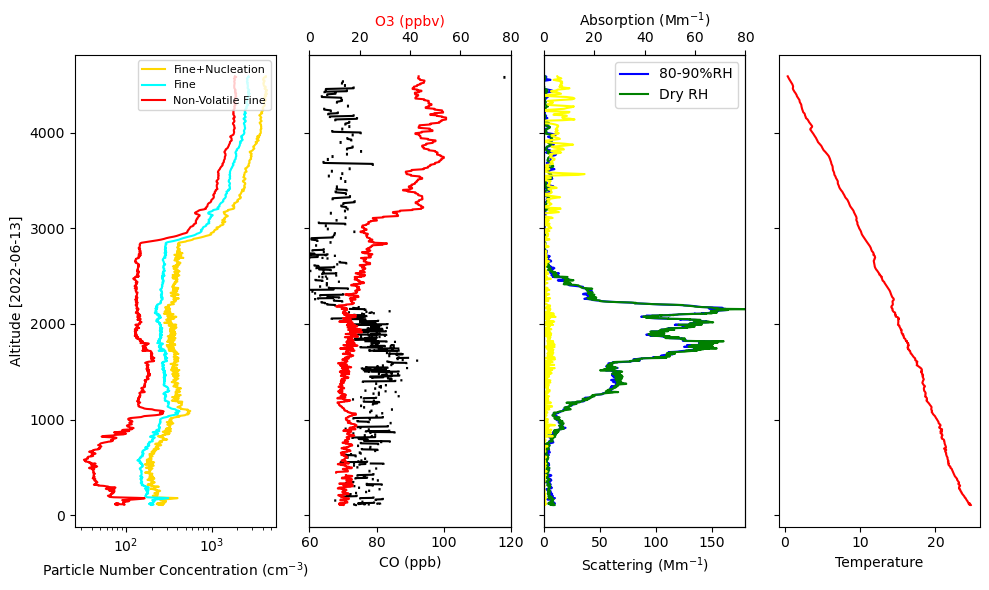

In [ ]:
fig,ax = plt.subplots(1, 4, figsize=(10, 6), sharey = 'all')
#plt.xscale("log")
ax[0].plot(Micro13_subset[' CNgt3nm_ZIEMBA'], Micro13_subset[' GPS_Altitude_THORNHILL'], color = "gold", label="Fine+Nucleation")
ax[0].plot(Micro13_subset[' CNgt10nm_ZIEMBA'], Micro13_subset[' GPS_Altitude_THORNHILL'], color = "aqua", label = 'Fine')
ax[0].plot(Micro13_subset[' CNgt10nm_nonvol_ZIEMBA'], Micro13_subset[' GPS_Altitude_THORNHILL'], color = "red", label = 'Non-Volatile Fine')
ax[0].set_ylabel('Altitude [2022-06-13]')
ax[0].set_xlabel('Particle Number Concentration (cm$^{-3}$)')
ax[0].set_xscale('log')
leg = ax[0].legend(loc='upper right', fontsize=8)

ax2= ax[1].twiny()
ax[1].plot(CO13, Micro13_subset[' GPS_Altitude_THORNHILL'], color = 'black')
ax[1].set_xlim([60, 120])
ax[1].set_xlabel('CO (ppb)')
#Merge[' CO_ppm_DISKIN']
ax2.plot(Micro13_subset[' O3_ppbv_DISKIN'], Micro13_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax2.set_xlim([0, 80])
ax2.set_xlabel('O3 (ppbv)', color = "red")

ax3 = ax[2].twiny()
ax[2].plot(Micro13_subset[' Sc450_submicron_ZIEMBA'], Micro13_subset[' GPS_Altitude_THORNHILL'], color = 'blue', label = '80-90%RH')
ax[2].plot(Micro13_subset[' Sc550_submicron_ZIEMBA'], Micro13_subset[' GPS_Altitude_THORNHILL'], color = 'green', label = 'Dry RH')
ax3.plot(Micro13_subset[' Abs532_total_ZIEMBA'], Micro13_subset[' GPS_Altitude_THORNHILL'], color = 'yellow')
ax[2].legend()
ax[2].set_xlabel('Scattering (Mm$^{-1}$)')
ax[2].set_xlim([0, 180])
ax3.set_xlabel('Absorption (Mm$^{-1}$)')
ax3.set_xlim([0, 80])
ax[3].plot(Micro13_subset[' Static_Air_Temp_THORNHILL'], Micro13_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[3].set_xlabel('Temperature')

fig.tight_layout()


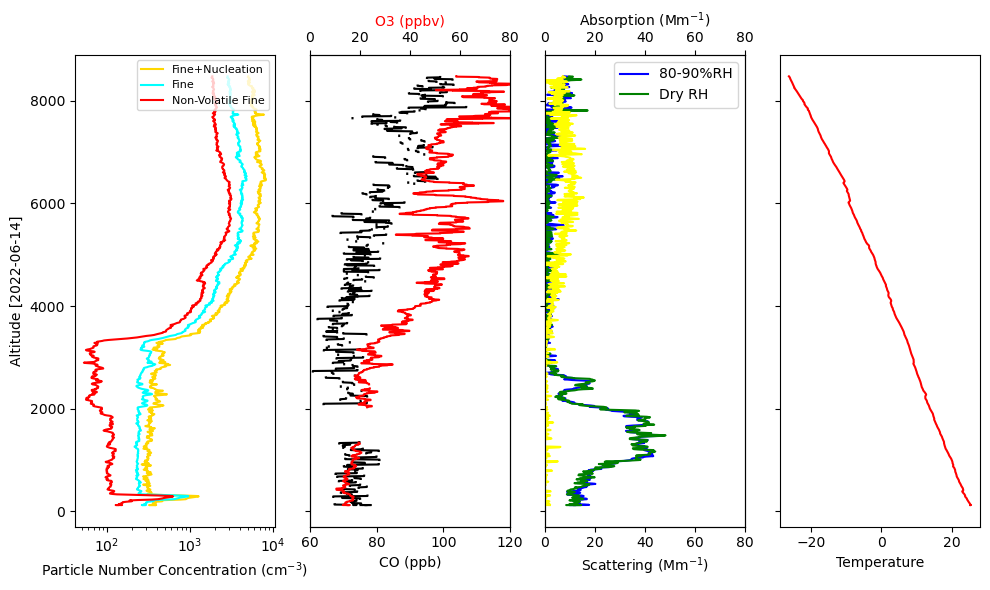

In [ ]:
fig,ax = plt.subplots(1, 4, figsize=(10, 6), sharey = 'all')
#plt.xscale("log")
ax[0].plot(Micro14_subset[' CNgt3nm_ZIEMBA'], Micro14_subset[' GPS_Altitude_THORNHILL'], color = "gold", label="Fine+Nucleation")
ax[0].plot(Micro14_subset[' CNgt10nm_ZIEMBA'], Micro14_subset[' GPS_Altitude_THORNHILL'], color = "aqua", label = 'Fine')
ax[0].plot(Micro14_subset[' CNgt10nm_nonvol_ZIEMBA'], Micro14_subset[' GPS_Altitude_THORNHILL'], color = "red", label = 'Non-Volatile Fine')
ax[0].set_ylabel('Altitude [2022-06-14]')
ax[0].set_xlabel('Particle Number Concentration (cm$^{-3}$)')
ax[0].set_xscale('log')
leg = ax[0].legend(loc='upper right', fontsize=8)

ax2= ax[1].twiny()
ax[1].plot(CO14, Micro14_subset[' GPS_Altitude_THORNHILL'], color = 'black')
ax[1].set_xlim([60, 120])
ax[1].set_xlabel('CO (ppb)')
#Merge[' CO_ppm_DISKIN']
ax2.plot(Micro14_subset[' O3_ppbv_DISKIN'], Micro14_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax2.set_xlim([0, 80])
ax2.set_xlabel('O3 (ppbv)', color = "red")

ax3 = ax[2].twiny()
ax[2].plot(Micro14_subset[' Sc450_submicron_ZIEMBA'], Micro14_subset[' GPS_Altitude_THORNHILL'], color = 'blue', label = '80-90%RH')
ax[2].plot(Micro14_subset[' Sc550_submicron_ZIEMBA'], Micro14_subset[' GPS_Altitude_THORNHILL'], color = 'green', label = 'Dry RH')
ax3.plot(Micro14_subset[' Abs532_total_ZIEMBA'], Micro14_subset[' GPS_Altitude_THORNHILL'], color = 'yellow')
ax[2].legend()
ax[2].set_xlabel('Scattering (Mm$^{-1}$)')
ax[2].set_xlim([0, 80])
ax3.set_xlabel('Absorption (Mm$^{-1}$)')
ax3.set_xlim([0, 80])
ax[3].plot(Micro14_subset[' Static_Air_Temp_THORNHILL'], Micro14_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[3].set_xlabel('Temperature')

fig.tight_layout()


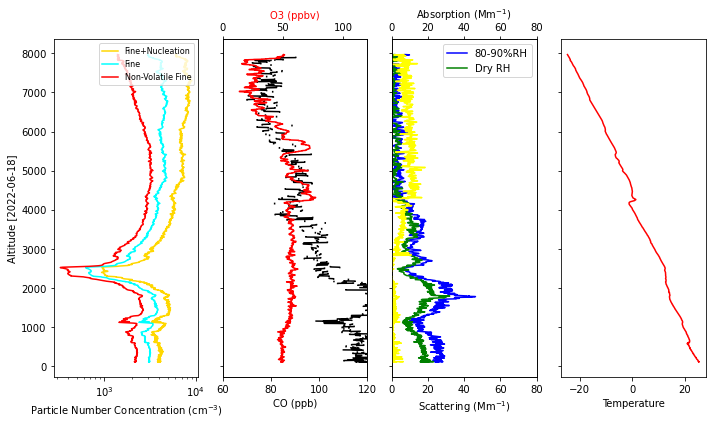

In [ ]:
fig,ax = plt.subplots(1, 4, figsize=(10, 6), sharey = 'all')
#plt.xscale("log")
ax[0].plot(Micro18_subset[' CNgt3nm_ZIEMBA'], Micro18_subset[' GPS_Altitude_THORNHILL'], color = "gold", label="Fine+Nucleation")
ax[0].plot(Micro18_subset[' CNgt10nm_ZIEMBA'], Micro18_subset[' GPS_Altitude_THORNHILL'], color = "aqua", label = 'Fine')
ax[0].plot(Micro18_subset[' CNgt10nm_nonvol_ZIEMBA'], Micro18_subset[' GPS_Altitude_THORNHILL'], color = "red", label = 'Non-Volatile Fine')
ax[0].set_ylabel('Altitude [2022-06-18]')
ax[0].set_xlabel('Particle Number Concentration (cm$^{-3}$)')
ax[0].set_xscale('log')
leg = ax[0].legend(loc='upper right', fontsize=8)

ax2= ax[1].twiny()
ax[1].plot(CO18, Micro18_subset[' GPS_Altitude_THORNHILL'], color = 'black')
ax[1].set_xlim([60, 120])
ax[1].set_xlabel('CO (ppb)')
#Merge[' CO_ppm_DISKIN']
ax2.plot(Micro18_subset[' O3_ppbv_DISKIN'], Micro18_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax2.set_xlim([0, 120])
ax2.set_xlabel('O3 (ppbv)', color = "red")

ax3 = ax[2].twiny()
ax[2].plot(Micro18_subset[' Sc450_submicron_ZIEMBA'], Micro18_subset[' GPS_Altitude_THORNHILL'], color = 'blue', label = '80-90%RH')
ax[2].plot(Micro18_subset[' Sc550_submicron_ZIEMBA'], Micro18_subset[' GPS_Altitude_THORNHILL'], color = 'green', label = 'Dry RH')
ax3.plot(Micro18_subset[' Abs532_total_ZIEMBA'], Micro18_subset[' GPS_Altitude_THORNHILL'], color = 'yellow')
ax[2].legend()
ax[2].set_xlabel('Scattering (Mm$^{-1}$)')
ax[2].set_xlim([0, 80])
ax3.set_xlabel('Absorption (Mm$^{-1}$)')
ax3.set_xlim([0, 80])
ax[3].plot(Micro18_subset[' Static_Air_Temp_THORNHILL'], Micro18_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[3].set_xlabel('Temperature')

fig.tight_layout()


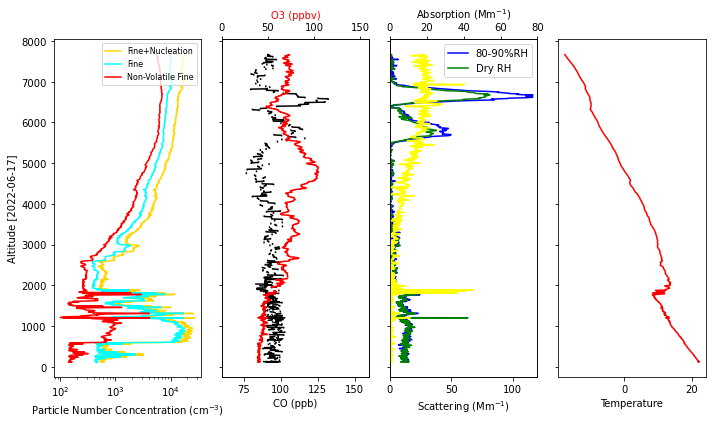

In [ ]:
fig,ax = plt.subplots(1, 4, figsize=(10, 6), sharey = 'all')
#plt.xscale("log")
ax[0].plot(Micro17_subset[' CNgt3nm_ZIEMBA'], Micro17_subset[' GPS_Altitude_THORNHILL'], color = "gold", label="Fine+Nucleation")
ax[0].plot(Micro17_subset[' CNgt10nm_ZIEMBA'], Micro17_subset[' GPS_Altitude_THORNHILL'], color = "aqua", label = 'Fine')
ax[0].plot(Micro17_subset[' CNgt10nm_nonvol_ZIEMBA'], Micro17_subset[' GPS_Altitude_THORNHILL'], color = "red", label = 'Non-Volatile Fine')
ax[0].set_ylabel('Altitude [2022-06-17]')
ax[0].set_xlabel('Particle Number Concentration (cm$^{-3}$)')
ax[0].set_xscale('log')
leg = ax[0].legend(loc='upper right', fontsize=8)

ax2= ax[1].twiny()
ax[1].plot(CO17, Micro17_subset[' GPS_Altitude_THORNHILL'], color = 'black')
ax[1].set_xlim([60, 160])
ax[1].set_xlabel('CO (ppb)')
#Merge[' CO_ppm_DISKIN']
ax2.plot(Micro17_subset[' O3_ppbv_DISKIN'], Micro17_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax2.set_xlim([0, 160])
ax2.set_xlabel('O3 (ppbv)', color = "red")

ax3 = ax[2].twiny()
ax[2].plot(Micro17_subset[' Sc450_submicron_ZIEMBA'], Micro17_subset[' GPS_Altitude_THORNHILL'], color = 'blue', label = '80-90%RH')
ax[2].plot(Micro17_subset[' Sc550_submicron_ZIEMBA'], Micro17_subset[' GPS_Altitude_THORNHILL'], color = 'green', label = 'Dry RH')
ax3.plot(Micro17_subset[' Abs532_total_ZIEMBA'], Micro17_subset[' GPS_Altitude_THORNHILL'], color = 'yellow')
ax[2].legend()
ax[2].set_xlabel('Scattering (Mm$^{-1}$)')
ax[2].set_xlim([0, 120])
ax3.set_xlabel('Absorption (Mm$^{-1}$)')
ax3.set_xlim([0, 80])
ax[3].plot(Micro17_subset[' Static_Air_Temp_THORNHILL'], Micro17_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[3].set_xlabel('Temperature')

fig.tight_layout()


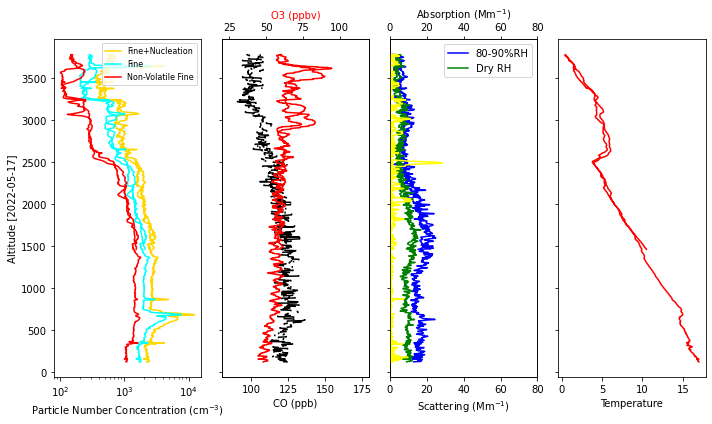

In [ ]:
fig,ax = plt.subplots(1, 4, figsize=(10, 6), sharey = 'all')
#plt.xscale("log")
ax[0].plot(Micro17b_subset[' CNgt3nm_ZIEMBA'], Micro17b_subset[' GPS_Altitude_THORNHILL'], color = "gold", label="Fine+Nucleation")
ax[0].plot(Micro17b_subset[' CNgt10nm_ZIEMBA'], Micro17b_subset[' GPS_Altitude_THORNHILL'], color = "aqua", label = 'Fine')
ax[0].plot(Micro17b_subset[' CNgt10nm_nonvol_ZIEMBA'], Micro17b_subset[' GPS_Altitude_THORNHILL'], color = "red", label = 'Non-Volatile Fine')
ax[0].set_ylabel('Altitude [2022-05-17]')
ax[0].set_xlabel('Particle Number Concentration (cm$^{-3}$)')
ax[0].set_xscale('log')
leg = ax[0].legend(loc='upper right', fontsize=8)

ax2= ax[1].twiny()
ax[1].plot(CO17b, Micro17b_subset[' GPS_Altitude_THORNHILL'], color = 'black')
ax[1].set_xlim([80, 180])
ax[1].set_xlabel('CO (ppb)')
#Merge[' CO_ppm_DISKIN']
ax2.plot(Micro17b_subset[' O3_ppbv_DISKIN'], Micro17b_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax2.set_xlim([20, 120])
ax2.set_xlabel('O3 (ppbv)', color = "red")

ax3 = ax[2].twiny()
ax[2].plot(Micro17b_subset[' Sc450_submicron_ZIEMBA'], Micro17b_subset[' GPS_Altitude_THORNHILL'], color = 'blue', label = '80-90%RH')
ax[2].plot(Micro17b_subset[' Sc550_submicron_ZIEMBA'], Micro17b_subset[' GPS_Altitude_THORNHILL'], color = 'green', label = 'Dry RH')
ax3.plot(Micro17b_subset[' Abs532_total_ZIEMBA'], Micro17b_subset[' GPS_Altitude_THORNHILL'], color = 'yellow')
ax[2].legend()
ax[2].set_xlabel('Scattering (Mm$^{-1}$)')
ax[2].set_xlim([0, 80])
ax3.set_xlabel('Absorption (Mm$^{-1}$)')
ax3.set_xlim([0, 80])
ax[3].plot(Micro17b_subset[' Static_Air_Temp_THORNHILL'], Micro17b_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[3].set_xlabel('Temperature')

fig.tight_layout()


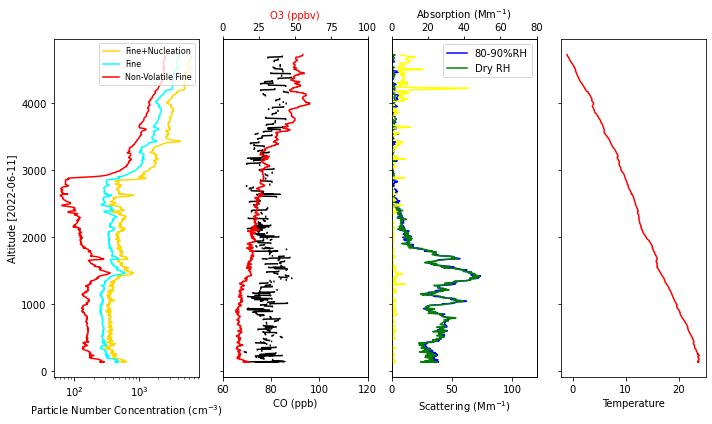

In [ ]:
fig,ax = plt.subplots(1, 4, figsize=(10, 6), sharey = 'all')
#plt.xscale("log")
ax[0].plot(Micro11_subset[' CNgt3nm_ZIEMBA'], Micro11_subset[' GPS_Altitude_THORNHILL'], color = "gold", label="Fine+Nucleation")
ax[0].plot(Micro11_subset[' CNgt10nm_ZIEMBA'], Micro11_subset[' GPS_Altitude_THORNHILL'], color = "aqua", label = 'Fine')
ax[0].plot(Micro11_subset[' CNgt10nm_nonvol_ZIEMBA'], Micro11_subset[' GPS_Altitude_THORNHILL'], color = "red", label = 'Non-Volatile Fine')
ax[0].set_ylabel('Altitude [2022-06-11]')
ax[0].set_xlabel('Particle Number Concentration (cm$^{-3}$)')
ax[0].set_xscale('log')
leg = ax[0].legend(loc='upper right', fontsize=8)

ax2= ax[1].twiny()
ax[1].plot(CO11, Micro11_subset[' GPS_Altitude_THORNHILL'], color = 'black')
ax[1].set_xlim([60, 120])
ax[1].set_xlabel('CO (ppb)')
#Merge[' CO_ppm_DISKIN']
ax2.plot(Micro11_subset[' O3_ppbv_DISKIN'], Micro11_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax2.set_xlim([0, 100])
ax2.set_xlabel('O3 (ppbv)', color = "red")

ax3 = ax[2].twiny()
ax[2].plot(Micro11_subset[' Sc450_submicron_ZIEMBA'], Micro11_subset[' GPS_Altitude_THORNHILL'], color = 'blue', label = '80-90%RH')
ax[2].plot(Micro11_subset[' Sc550_submicron_ZIEMBA'], Micro11_subset[' GPS_Altitude_THORNHILL'], color = 'green', label = 'Dry RH')
ax3.plot(Micro11_subset[' Abs532_total_ZIEMBA'], Micro11_subset[' GPS_Altitude_THORNHILL'], color = 'yellow')
ax[2].legend()
ax[2].set_xlabel('Scattering (Mm$^{-1}$)')
ax[2].set_xlim([0, 120])
ax3.set_xlabel('Absorption (Mm$^{-1}$)')
ax3.set_xlim([0, 80])
ax[3].plot(Micro11_subset[' Static_Air_Temp_THORNHILL'], Micro11_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[3].set_xlabel('Temperature')

fig.tight_layout()


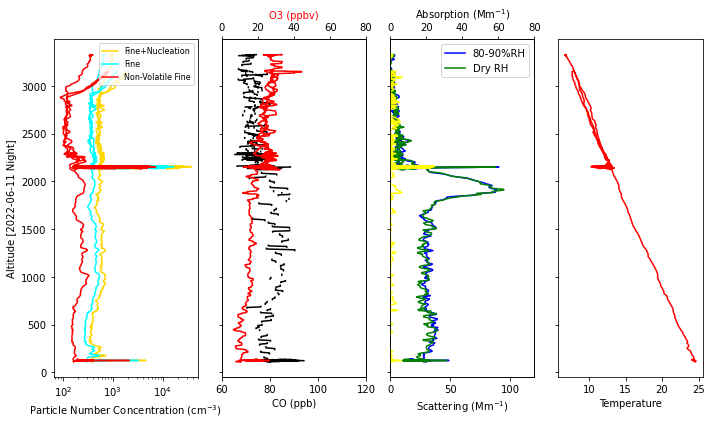

In [ ]:
fig,ax = plt.subplots(1, 4, figsize=(10, 6), sharey = 'all')
#plt.xscale("log")
ax[0].plot(Micro11b_subset[' CNgt3nm_ZIEMBA'], Micro11b_subset[' GPS_Altitude_THORNHILL'], color = "gold", label="Fine+Nucleation")
ax[0].plot(Micro11b_subset[' CNgt10nm_ZIEMBA'], Micro11b_subset[' GPS_Altitude_THORNHILL'], color = "aqua", label = 'Fine')
ax[0].plot(Micro11b_subset[' CNgt10nm_nonvol_ZIEMBA'], Micro11b_subset[' GPS_Altitude_THORNHILL'], color = "red", label = 'Non-Volatile Fine')
ax[0].set_ylabel('Altitude [2022-06-11 Night]')
ax[0].set_xlabel('Particle Number Concentration (cm$^{-3}$)')
ax[0].set_xscale('log')
leg = ax[0].legend(loc='upper right', fontsize=8)

ax2= ax[1].twiny()
ax[1].plot(CO11b, Micro11b_subset[' GPS_Altitude_THORNHILL'], color = 'black')
ax[1].set_xlim([60, 120])
ax[1].set_xlabel('CO (ppb)')
#Merge[' CO_ppm_DISKIN']
ax2.plot(Micro11b_subset[' O3_ppbv_DISKIN'], Micro11b_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax2.set_xlim([0, 80])
ax2.set_xlabel('O3 (ppbv)', color = "red")

ax3 = ax[2].twiny()
ax[2].plot(Micro11b_subset[' Sc450_submicron_ZIEMBA'], Micro11b_subset[' GPS_Altitude_THORNHILL'], color = 'blue', label = '80-90%RH')
ax[2].plot(Micro11b_subset[' Sc550_submicron_ZIEMBA'], Micro11b_subset[' GPS_Altitude_THORNHILL'], color = 'green', label = 'Dry RH')
ax3.plot(Micro11b_subset[' Abs532_total_ZIEMBA'], Micro11b_subset[' GPS_Altitude_THORNHILL'], color = 'yellow')
ax[2].legend()
ax[2].set_xlabel('Scattering (Mm$^{-1}$)')
ax[2].set_xlim([0, 120])
ax3.set_xlabel('Absorption (Mm$^{-1}$)')
ax3.set_xlim([0, 80])
ax[3].plot(Micro11b_subset[' Static_Air_Temp_THORNHILL'], Micro11b_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[3].set_xlabel('Temperature')

fig.tight_layout()


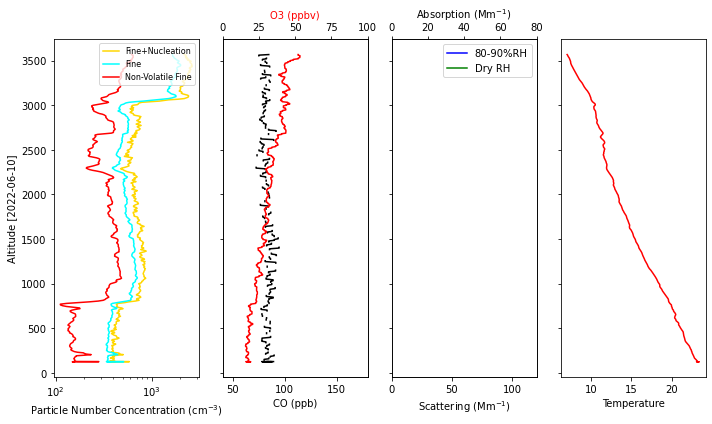

In [ ]:
fig,ax = plt.subplots(1, 4, figsize=(10, 6), sharey = 'all')
#plt.xscale("log")
ax[0].plot(Micro10_subset[' CNgt3nm_ZIEMBA'], Micro10_subset[' GPS_Altitude_THORNHILL'], color = "gold", label="Fine+Nucleation")
ax[0].plot(Micro10_subset[' CNgt10nm_ZIEMBA'], Micro10_subset[' GPS_Altitude_THORNHILL'], color = "aqua", label = 'Fine')
ax[0].plot(Micro10_subset[' CNgt10nm_nonvol_ZIEMBA'], Micro10_subset[' GPS_Altitude_THORNHILL'], color = "red", label = 'Non-Volatile Fine')
ax[0].set_ylabel('Altitude [2022-06-10]')
ax[0].set_xlabel('Particle Number Concentration (cm$^{-3}$)')
ax[0].set_xscale('log')
leg = ax[0].legend(loc='upper right', fontsize=8)

ax2= ax[1].twiny()
ax[1].plot(CO10, Micro10_subset[' GPS_Altitude_THORNHILL'], color = 'black')
ax[1].set_xlim([40, 180])
ax[1].set_xlabel('CO (ppb)')
#Merge[' CO_ppm_DISKIN']
ax2.plot(Micro10_subset[' O3_ppbv_DISKIN'], Micro10_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax2.set_xlim([0, 100])
ax2.set_xlabel('O3 (ppbv)', color = "red")

ax3 = ax[2].twiny()
ax[2].plot(Micro10_subset[' Sc450_submicron_ZIEMBA'], Micro10_subset[' GPS_Altitude_THORNHILL'], color = 'blue', label = '80-90%RH')
ax[2].plot(Micro10_subset[' Sc550_submicron_ZIEMBA'], Micro10_subset[' GPS_Altitude_THORNHILL'], color = 'green', label = 'Dry RH')
ax3.plot(Micro10_subset[' Abs532_total_ZIEMBA'], Micro10_subset[' GPS_Altitude_THORNHILL'], color = 'yellow')
ax[2].legend()
ax[2].set_xlabel('Scattering (Mm$^{-1}$)')
ax[2].set_xlim([0, 120])
ax3.set_xlabel('Absorption (Mm$^{-1}$)')
ax3.set_xlim([0, 80])
ax[3].plot(Micro10_subset[' Static_Air_Temp_THORNHILL'], Micro10_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[3].set_xlabel('Temperature')

fig.tight_layout()


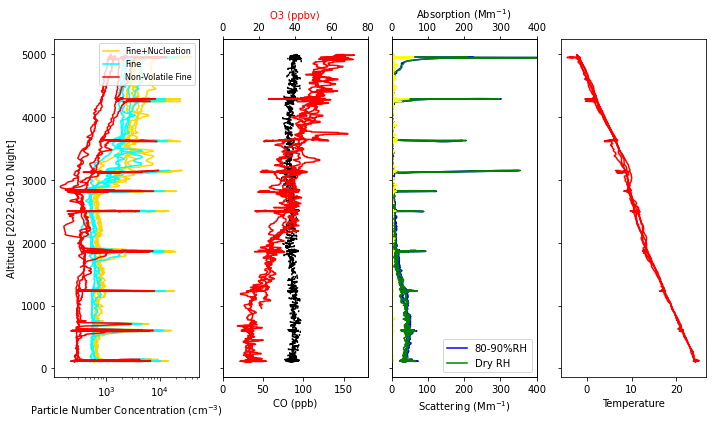

In [ ]:
fig,ax = plt.subplots(1, 4, figsize=(10, 6), sharey = 'all')
#plt.xscale("log")
ax[0].plot(Micro10b_subset[' CNgt3nm_ZIEMBA'], Micro10b_subset[' GPS_Altitude_THORNHILL'], color = "gold", label="Fine+Nucleation")
ax[0].plot(Micro10b_subset[' CNgt10nm_ZIEMBA'], Micro10b_subset[' GPS_Altitude_THORNHILL'], color = "aqua", label = 'Fine')
ax[0].plot(Micro10b_subset[' CNgt10nm_nonvol_ZIEMBA'], Micro10b_subset[' GPS_Altitude_THORNHILL'], color = "red", label = 'Non-Volatile Fine')
ax[0].set_ylabel('Altitude [2022-06-10 Night]')
ax[0].set_xlabel('Particle Number Concentration (cm$^{-3}$)')
ax[0].set_xscale('log')
leg = ax[0].legend(loc='upper right', fontsize=8)

ax2= ax[1].twiny()
ax[1].plot(CO10b, Micro10b_subset[' GPS_Altitude_THORNHILL'], color = 'black')
ax[1].set_xlim([0, 180])
ax[1].set_xlabel('CO (ppb)')
#Merge[' CO_ppm_DISKIN']
ax2.plot(Micro10b_subset[' O3_ppbv_DISKIN'], Micro10b_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax2.set_xlim([0, 80])
ax2.set_xlabel('O3 (ppbv)', color = "red")

ax3 = ax[2].twiny()
ax[2].plot(Micro10b_subset[' Sc450_submicron_ZIEMBA'], Micro10b_subset[' GPS_Altitude_THORNHILL'], color = 'blue', label = '80-90%RH')
ax[2].plot(Micro10b_subset[' Sc550_submicron_ZIEMBA'], Micro10b_subset[' GPS_Altitude_THORNHILL'], color = 'green', label = 'Dry RH')
ax3.plot(Micro10b_subset[' Abs532_total_ZIEMBA'], Micro10b_subset[' GPS_Altitude_THORNHILL'], color = 'yellow')
ax[2].legend()
ax[2].set_xlabel('Scattering (Mm$^{-1}$)')
ax[2].set_xlim([0,400])
ax3.set_xlabel('Absorption (Mm$^{-1}$)')
ax3.set_xlim([0,400])
ax[3].plot(Micro10b_subset[' Static_Air_Temp_THORNHILL'], Micro10b_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[3].set_xlabel('Temperature')

fig.tight_layout()


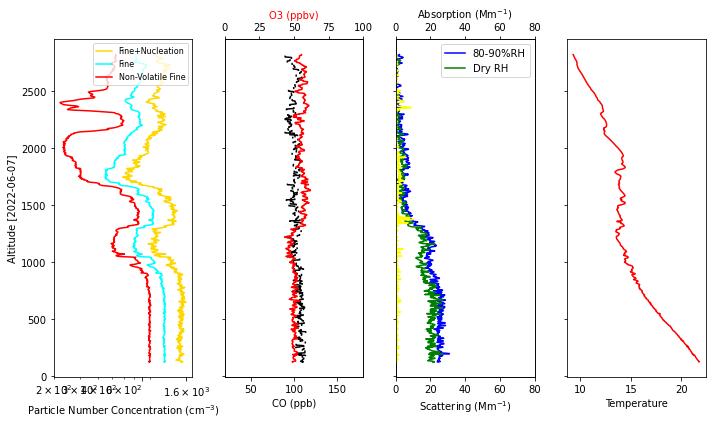

In [ ]:
fig,ax = plt.subplots(1, 4, figsize=(10, 6), sharey = 'all')
#plt.xscale("log")
ax[0].plot(Micro7_subset[' CNgt3nm_ZIEMBA'], Micro7_subset[' GPS_Altitude_THORNHILL'], color = "gold", label="Fine+Nucleation")
ax[0].plot(Micro7_subset[' CNgt10nm_ZIEMBA'], Micro7_subset[' GPS_Altitude_THORNHILL'], color = "aqua", label = 'Fine')
ax[0].plot(Micro7_subset[' CNgt10nm_nonvol_ZIEMBA'], Micro7_subset[' GPS_Altitude_THORNHILL'], color = "red", label = 'Non-Volatile Fine')
ax[0].set_ylabel('Altitude [2022-06-07]')
ax[0].set_xlabel('Particle Number Concentration (cm$^{-3}$)')
ax[0].set_xscale('log')
ax[0].xaxis.set_major_locator(plt.MaxNLocator(2))
leg = ax[0].legend(loc='upper right', fontsize=8)

ax2= ax[1].twiny()
ax[1].plot(CO7, Micro7_subset[' GPS_Altitude_THORNHILL'], color = 'black')
ax[1].set_xlim([20, 180])
ax[1].set_xlabel('CO (ppb)')
#Merge[' CO_ppm_DISKIN']
ax2.plot(Micro7_subset[' O3_ppbv_DISKIN'], Micro7_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax2.set_xlim([0, 100])
ax2.set_xlabel('O3 (ppbv)', color = "red")

ax3 = ax[2].twiny()
ax[2].plot(Micro7_subset[' Sc450_submicron_ZIEMBA'], Micro7_subset[' GPS_Altitude_THORNHILL'], color = 'blue', label = '80-90%RH')
ax[2].plot(Micro7_subset[' Sc550_submicron_ZIEMBA'], Micro7_subset[' GPS_Altitude_THORNHILL'], color = 'green', label = 'Dry RH')
ax3.plot(Micro7_subset[' Abs532_total_ZIEMBA'], Micro7_subset[' GPS_Altitude_THORNHILL'], color = 'yellow')
ax[2].legend()
ax[2].set_xlabel('Scattering (Mm$^{-1}$)')
ax[2].set_xlim([0, 80])
ax3.set_xlabel('Absorption (Mm$^{-1}$)')
ax3.set_xlim([0, 80])
ax[3].plot(Micro7_subset[' Static_Air_Temp_THORNHILL'], Micro7_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[3].set_xlabel('Temperature')

fig.tight_layout()


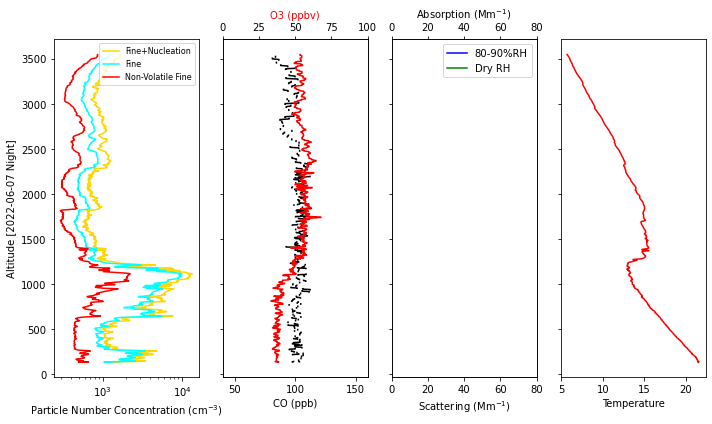

In [ ]:
fig,ax = plt.subplots(1, 4, figsize=(10, 6), sharey = 'all')
#plt.xscale("log")
ax[0].plot(Micro7b_subset[' CNgt3nm_ZIEMBA'], Micro7b_subset[' GPS_Altitude_THORNHILL'], color = "gold", label="Fine+Nucleation")
ax[0].plot(Micro7b_subset[' CNgt10nm_ZIEMBA'], Micro7b_subset[' GPS_Altitude_THORNHILL'], color = "aqua", label = 'Fine')
ax[0].plot(Micro7b_subset[' CNgt10nm_nonvol_ZIEMBA'], Micro7b_subset[' GPS_Altitude_THORNHILL'], color = "red", label = 'Non-Volatile Fine')
ax[0].set_ylabel('Altitude [2022-06-07 Night]')
ax[0].set_xlabel('Particle Number Concentration (cm$^{-3}$)')
ax[0].set_xscale('log')
leg = ax[0].legend(loc='upper right', fontsize=8)

ax2= ax[1].twiny()
ax[1].plot(CO7b, Micro7b_subset[' GPS_Altitude_THORNHILL'], color = 'black')
ax[1].set_xlim([40, 160])
ax[1].set_xlabel('CO (ppb)')
#Merge[' CO_ppm_DISKIN']
ax2.plot(Micro7b_subset[' O3_ppbv_DISKIN'], Micro7b_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax2.set_xlim([0, 100])
ax2.set_xlabel('O3 (ppbv)', color = "red")

ax3 = ax[2].twiny()
ax[2].plot(Micro7b_subset[' Sc450_submicron_ZIEMBA'], Micro7b_subset[' GPS_Altitude_THORNHILL'], color = 'blue', label = '80-90%RH')
ax[2].plot(Micro7b_subset[' Sc550_submicron_ZIEMBA'], Micro7b_subset[' GPS_Altitude_THORNHILL'], color = 'green', label = 'Dry RH')
ax3.plot(Micro7b_subset[' Abs532_total_ZIEMBA'], Micro7b_subset[' GPS_Altitude_THORNHILL'], color = 'yellow')
ax[2].legend()
ax[2].set_xlabel('Scattering (Mm$^{-1}$)')
ax[2].set_xlim([0, 80])
ax3.set_xlabel('Absorption (Mm$^{-1}$)')
ax3.set_xlim([0, 80])
ax[3].plot(Micro7b_subset[' Static_Air_Temp_THORNHILL'], Micro7b_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[3].set_xlabel('Temperature')

fig.tight_layout()


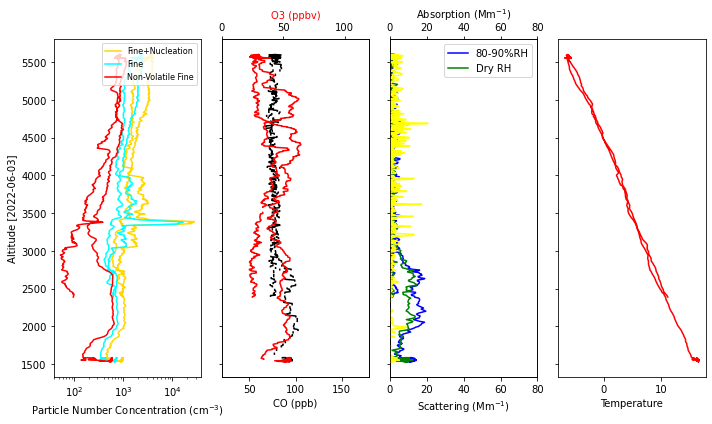

In [ ]:
fig,ax = plt.subplots(1, 4, figsize=(10, 6), sharey = 'all')
#plt.xscale("log")
ax[0].plot(Micro3_subset[' CNgt3nm_ZIEMBA'], Micro3_subset[' GPS_Altitude_THORNHILL'], color = "gold", label="Fine+Nucleation")
ax[0].plot(Micro3_subset[' CNgt10nm_ZIEMBA'], Micro3_subset[' GPS_Altitude_THORNHILL'], color = "aqua", label = 'Fine')
ax[0].plot(Micro3_subset[' CNgt10nm_nonvol_ZIEMBA'], Micro3_subset[' GPS_Altitude_THORNHILL'], color = "red", label = 'Non-Volatile Fine')
ax[0].set_ylabel('Altitude [2022-06-03]')
ax[0].set_xlabel('Particle Number Concentration (cm$^{-3}$)')
ax[0].set_xscale('log')
leg = ax[0].legend(loc='upper right', fontsize=8)

ax2= ax[1].twiny()
ax[1].plot(CO3, Micro3_subset[' GPS_Altitude_THORNHILL'], color = 'black')
ax[1].set_xlim([20, 180])
ax[1].set_xlabel('CO (ppb)')
#Merge[' CO_ppm_DISKIN']
ax2.plot(Micro3_subset[' O3_ppbv_DISKIN'], Micro3_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax2.set_xlim([0, 120])
ax2.set_xlabel('O3 (ppbv)', color = "red")

ax3 = ax[2].twiny()
ax[2].plot(Micro3_subset[' Sc450_submicron_ZIEMBA'], Micro3_subset[' GPS_Altitude_THORNHILL'], color = 'blue', label = '80-90%RH')
ax[2].plot(Micro3_subset[' Sc550_submicron_ZIEMBA'], Micro3_subset[' GPS_Altitude_THORNHILL'], color = 'green', label = 'Dry RH')
ax3.plot(Micro3_subset[' Abs532_total_ZIEMBA'], Micro3_subset[' GPS_Altitude_THORNHILL'], color = 'yellow')
ax[2].legend()
ax[2].set_xlabel('Scattering (Mm$^{-1}$)')
ax[2].set_xlim([0, 80])
ax3.set_xlabel('Absorption (Mm$^{-1}$)')
ax3.set_xlim([0, 80])
ax[3].plot(Micro3_subset[' Static_Air_Temp_THORNHILL'], Micro3_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[3].set_xlabel('Temperature')

fig.tight_layout()


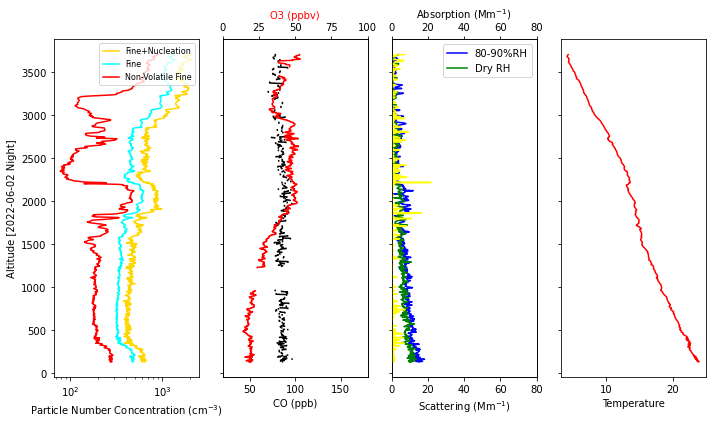

In [ ]:
fig,ax = plt.subplots(1, 4, figsize=(10, 6), sharey = 'all')
#plt.xscale("log")
ax[0].plot(Micro2b_subset[' CNgt3nm_ZIEMBA'], Micro2b_subset[' GPS_Altitude_THORNHILL'], color = "gold", label="Fine+Nucleation")
ax[0].plot(Micro2b_subset[' CNgt10nm_ZIEMBA'], Micro2b_subset[' GPS_Altitude_THORNHILL'], color = "aqua", label = 'Fine')
ax[0].plot(Micro2b_subset[' CNgt10nm_nonvol_ZIEMBA'], Micro2b_subset[' GPS_Altitude_THORNHILL'], color = "red", label = 'Non-Volatile Fine')
ax[0].set_ylabel('Altitude [2022-06-02 Night]')
ax[0].set_xlabel('Particle Number Concentration (cm$^{-3}$)')
ax[0].set_xscale('log')
leg = ax[0].legend(loc='upper right', fontsize=8)

ax2= ax[1].twiny()
ax[1].plot(CO2b, Micro2b_subset[' GPS_Altitude_THORNHILL'], color = 'black')
ax[1].set_xlim([20, 180])
ax[1].set_xlabel('CO (ppb)')
#Merge[' CO_ppm_DISKIN']
ax2.plot(Micro2b_subset[' O3_ppbv_DISKIN'], Micro2b_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax2.set_xlim([0, 100])
ax2.set_xlabel('O3 (ppbv)', color = "red")

ax3 = ax[2].twiny()
ax[2].plot(Micro2b_subset[' Sc450_submicron_ZIEMBA'], Micro2b_subset[' GPS_Altitude_THORNHILL'], color = 'blue', label = '80-90%RH')
ax[2].plot(Micro2b_subset[' Sc550_submicron_ZIEMBA'], Micro2b_subset[' GPS_Altitude_THORNHILL'], color = 'green', label = 'Dry RH')
ax3.plot(Micro2b_subset[' Abs532_total_ZIEMBA'], Micro2b_subset[' GPS_Altitude_THORNHILL'], color = 'yellow')
ax[2].legend()
ax[2].set_xlabel('Scattering (Mm$^{-1}$)')
ax[2].set_xlim([0, 80])
ax3.set_xlabel('Absorption (Mm$^{-1}$)')
ax3.set_xlim([0, 80])
ax[3].plot(Micro2b_subset[' Static_Air_Temp_THORNHILL'], Micro2b_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[3].set_xlabel('Temperature')

fig.tight_layout()


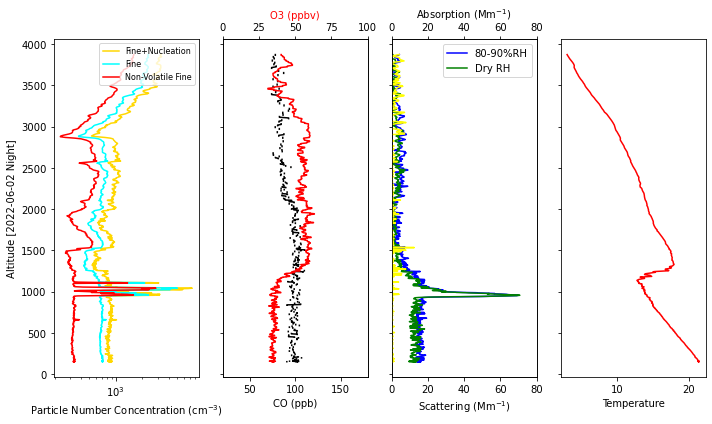

In [ ]:
fig,ax = plt.subplots(1, 4, figsize=(10, 6), sharey = 'all')
#plt.xscale("log")
ax[0].plot(Micro8_subset[' CNgt3nm_ZIEMBA'], Micro8_subset[' GPS_Altitude_THORNHILL'], color = "gold", label="Fine+Nucleation")
ax[0].plot(Micro8_subset[' CNgt10nm_ZIEMBA'], Micro8_subset[' GPS_Altitude_THORNHILL'], color = "aqua", label = 'Fine')
ax[0].plot(Micro8_subset[' CNgt10nm_nonvol_ZIEMBA'], Micro8_subset[' GPS_Altitude_THORNHILL'], color = "red", label = 'Non-Volatile Fine')
ax[0].set_ylabel('Altitude [2022-06-08 Night]')
ax[0].set_xlabel('Particle Number Concentration (cm$^{-3}$)')
ax[0].set_xscale('log')
leg = ax[0].legend(loc='upper right', fontsize=8)

ax2= ax[1].twiny()
ax[1].plot(CO8, Micro8_subset[' GPS_Altitude_THORNHILL'], color = 'black')
ax[1].set_xlim([20, 180])
ax[1].set_xlabel('CO (ppb)')
#Merge[' CO_ppm_DISKIN']
ax2.plot(Micro8_subset[' O3_ppbv_DISKIN'], Micro8_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax2.set_xlim([0, 100])
ax2.set_xlabel('O3 (ppbv)', color = "red")

ax3 = ax[2].twiny()
ax[2].plot(Micro8_subset[' Sc450_submicron_ZIEMBA'], Micro8_subset[' GPS_Altitude_THORNHILL'], color = 'blue', label = '80-90%RH')
ax[2].plot(Micro8_subset[' Sc550_submicron_ZIEMBA'], Micro8_subset[' GPS_Altitude_THORNHILL'], color = 'green', label = 'Dry RH')
ax3.plot(Micro8_subset[' Abs532_total_ZIEMBA'], Micro8_subset[' GPS_Altitude_THORNHILL'], color = 'yellow')
ax[2].legend()
ax[2].set_xlabel('Scattering (Mm$^{-1}$)')
ax[2].set_xlim([0, 80])
ax3.set_xlabel('Absorption (Mm$^{-1}$)')
ax3.set_xlim([0, 80])
ax[3].plot(Micro8_subset[' Static_Air_Temp_THORNHILL'], Micro8_subset[' GPS_Altitude_THORNHILL'], color = 'red')
ax[3].set_xlabel('Temperature')

fig.tight_layout()


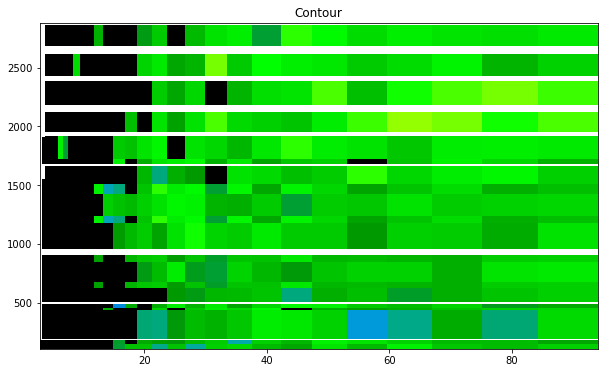

In [ ]:
fig,ax = plt.subplots(figsize=(10, 6), sharey = 'all')
cmap = plt.colormaps['nipy_spectral']
ax.set_title('Contour')
ax.pcolormesh(mid1, Altitude, value2.T, norm=LogNorm(vmin=1, vmax=47256.35), shading='auto', cmap=plt.colormaps['nipy_spectral'])
#ax.contour((mid1, Altitude, value2.T)



ValueError: x and y must have same first dimension, but have shapes (26,) and (1320, 26)

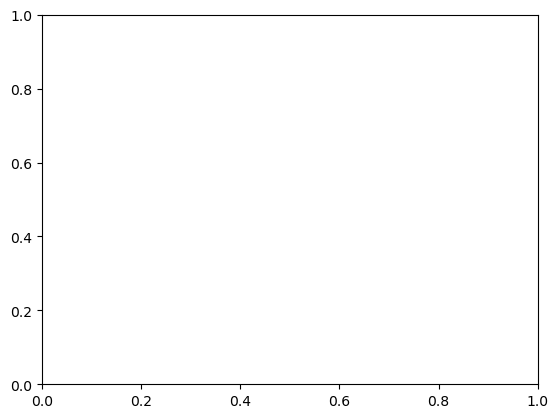

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  # Import LogNorm for logarithmic color scale

# Assuming you have data for mid, Altitude, value, mid1, Altitude, value2

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the first line plot
ax.plot(mid, value.T, label='Data 1', color='b')

# Plot the second line plot
ax.plot(mid1, value2.T, label='Data 2', color='r')

# Customize the plot
ax.set_xlabel('Mid')
ax.set_ylabel('Value')
ax.set_title('Line Plots')
ax.set_yscale('log')  # Set log scale for y-axis
ax.legend()

# Show the plot
plt.show()
